# Data Preparation

![HR Analytics](../Images/Data_Preperation.png)

---

**_The key to success in any organization lies in its ability to attract and retain top talent. As part of the Unified Mentor program, I undertook the IBM HR Analytics Employee Attrition & Performance project to analyze critical factors influencing employee turnover._**

**_This analysis is designed to support HR Analysts in identifying the underlying reasons why employees choose to stay or leave an organization. By leveraging data-driven insights, the project highlights patterns related to job satisfaction, work-life balance, compensation, and other key variables impacting attrition._**

**_Understanding these factors empowers HR teams to implement proactive strategies aimed at improving employee retention, enhancing workplace satisfaction, and ultimately reducing the costly cycle of hiring and training new staff. The predictive models and visual insights developed in this project serve as valuable tools to help organizations retain their top performers and foster a stable, productive workforce._**

---
# <span style="background-color:#393be5; color:white; padding:10px;border-radius:15px; text-align:center;">OUTLINE</span>

1. **Import Libraries**  
   Load the necessary Python tools to work with data and perform analysis.

2. **Load the Data**  
   Open the dataset and get it ready for analysis.

3. **Explore and Clean the Data (Data Wrangling)**  
   - Understanding Dataset Dimensions  
   - Exploring Dataset Structure  
   - Attribute Summary  
   - Feature Classification  
   - Decoding Encoded Features  
   - Look for any missing or empty data.  
   - Summarize the numeric data to spot trends (like average salary, age range).  
   - Remove columns that aren’t useful for analysis.  
   - Review category-based columns to understand common values (e.g., most common job role).  
   - Check how many unique values exist in each category column.

4. **Save the Cleaned Data**  
   Store the cleaned dataset in a new file for future use.

---

# <span style="background-color:#258683; color:white; padding:10px;border-radius:15px; text-align:center;">IMPORTING VARIOUS MODULES</span>


In [1]:
# Library for Data Manipulation
import numpy as np
import pandas as pd
import io
# Library for Statistical Modelling
from sklearn.preprocessing import LabelEncoder
# Library for Ignore the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

---
# <span style="background-color:#258683; color:white; padding:10px;border-radius:15px; text-align:center;">PROVIDED DATASET</span>

In [2]:
# Load the dataset
employee_data = '../WA_Fn-UseC_-HR-Employee-Attrition.csv'
df = pd.read_csv(employee_data)

# Display the first 5 rows
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [3]:
df.tail()

Age Attrition     BusinessTravel  DailyRate              Department  \
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9                  6   
1469               4               4                  3   

      YearsSinceLastPromotion  YearsWithCurrManager  
1465                        0                     3  
1466                        1                     7  
1467                        0                     3  
1468                        0                     8  
1469                        1                     2  

[5 rows x 35 columns]

---
# <span style="background-color:#258683; color:white; padding:10px;border-radius:15px; text-align:center;">Understanding Dataset Dimensions</span>

In [4]:
# Checking the shape of the dataset
rows, columns = df.shape

rows, columns

(1470, 35)

---
# <span style="background-color:#258683; color:white; padding:10px;border-radius:15px; text-align:center;">Exploring Dataset Structure</span>

In [5]:
# Listing all columns in the dataset
df.columns.tolist()


['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

---
# <span style="background-color:#258683; color:white; padding:10px;border-radius:15px; text-align:center;">Attribute Summary</span>

**We’ll generate basic info:**
- Data types
- Non-null counts
- Memory usage

In [6]:
# Generating basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

***Attribute Summary:***
- Total Entries: 1470
- Total Features: 35

**Data Types:**
- 26 Numerical (int64)
- 9 Categorical (object)

**No missing values detected so far (all columns show 1470 non-null).**


---
# <span style="background-color:#258683; color:white; padding:10px;border-radius:15px; text-align:center;">Feature Classification</span>
- List all Numerical Features.

- List all Categorical Features.

In [7]:
# Identifying Numerical and Categorical Features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

numerical_features, categorical_features

(['Age',
  'DailyRate',
  'DistanceFromHome',
  'Education',
  'EmployeeCount',
  'EmployeeNumber',
  'EnvironmentSatisfaction',
  'HourlyRate',
  'JobInvolvement',
  'JobLevel',
  'JobSatisfaction',
  'MonthlyIncome',
  'MonthlyRate',
  'NumCompaniesWorked',
  'PercentSalaryHike',
  'PerformanceRating',
  'RelationshipSatisfaction',
  'StandardHours',
  'StockOptionLevel',
  'TotalWorkingYears',
  'TrainingTimesLastYear',
  'WorkLifeBalance',
  'YearsAtCompany',
  'YearsInCurrentRole',
  'YearsSinceLastPromotion',
  'YearsWithCurrManager'],
 ['Attrition',
  'BusinessTravel',
  'Department',
  'EducationField',
  'Gender',
  'JobRole',
  'MaritalStatus',
  'Over18',
  'OverTime'])

***Numerical Features (26):***

- **Here are the key numerical columns:** ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

***Categorical Features (9):***

- **Here are the key categorical columns:** ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

---
# <span style="background-color:#258683; color:white; padding:10px;border-radius:15px; text-align:center;">Decoding Encoded Features</span>

**Mappings to Apply:**
- Education {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
- EnvironmentSatisfaction, JobInvolvement, JobSatisfaction, RelationshipSatisfaction {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
- PerformanceRating {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}
- WorkLifeBalance {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}

In [8]:
# Defining the mappings
education_map = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
satisfaction_map = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
performance_map = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}
worklife_map = {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}

# Applying mappings
df['Education'] = df['Education'].map(education_map)
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].map(satisfaction_map)
df['JobInvolvement'] = df['JobInvolvement'].map(satisfaction_map)
df['JobSatisfaction'] = df['JobSatisfaction'].map(satisfaction_map)
df['RelationshipSatisfaction'] = df['RelationshipSatisfaction'].map(satisfaction_map)
df['PerformanceRating'] = df['PerformanceRating'].map(performance_map)
df['WorkLifeBalance'] = df['WorkLifeBalance'].map(worklife_map)

# Checking if mapping is successful
df[['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 
    'RelationshipSatisfaction', 'PerformanceRating', 'WorkLifeBalance']].head()


Education EnvironmentSatisfaction JobInvolvement JobSatisfaction  \
0        College                  Medium           High       Very High   
1  Below College                    High         Medium          Medium   
2        College               Very High         Medium            High   
3         Master               Very High           High            High   
4  Below College                     Low           High          Medium   

  RelationshipSatisfaction PerformanceRating WorkLifeBalance  
0                      Low         Excellent             Bad  
1                Very High       Outstanding          Better  
2                   Medium         Excellent          Better  
3                     High         Excellent          Better  
4                Very High         Excellent          Better

---
# <span style="background-color:#258683; color:white; padding:10px;border-radius:15px; text-align:center;">Validating Data Completeness</span>

- Next, let's check for any missing values across the dataset.

In [9]:
# Checking for missing values
missing_values = df.isnull().sum()

# Filtering columns with missing values
missing_values = missing_values[missing_values > 0]

missing_values

Series([], dtype: int64)

- All columns are complete—no null values in the dataset.

---
# <span style="background-color:#258683; color:white; padding:10px;border-radius:15px; text-align:center;">Statistical Summary of Numerical Data</span>

**We’ll run describe() to get:**

- Count
- Mean
- Std deviation
- Min & Max
- Percentiles

In [10]:
# Descriptive statistics for numerical features
numerical_df = df.select_dtypes(include=['int64', 'float64'])
numerical_df.describe()


Age    DailyRate  DistanceFromHome  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000         1470.0   
mean     36.923810   802.485714          9.192517            1.0   
std       9.135373   403.509100          8.106864            0.0   
min      18.000000   102.000000          1.000000            1.0   
25%      30.000000   465.000000          2.000000            1.0   
50%      36.000000   802.000000          7.000000            1.0   
75%      43.000000  1157.000000         14.000000            1.0   
max      60.000000  1499.000000         29.000000            1.0   

       EmployeeNumber   HourlyRate     JobLevel  MonthlyIncome   MonthlyRate  \
count     1470.000000  1470.000000  1470.000000    1470.000000   1470.000000   
mean      1024.865306    65.891156     2.063946    6502.931293  14313.103401   
std        602.024335    20.329428     1.106940    4707.956783   7117.786044   
min          1.000000    30.000000     1.000000    1009.000000   2094.000000   
25%        491.250000    48.000000     1.000000    2911.000000   8047.000000   
50%       1020.500000    66.000000     2.000000    4919.000000  14235.500000   
75%       1555.750000    83.750000     3.000000    8379.000000  20461.500000   
max       2068.000000   100.000000     5.000000   19999.000000  26999.000000   

       NumCompaniesWorked  PercentSalaryHike  StandardHours  StockOptionLevel  \
count         1470.000000        1470.000000         1470.0       1470.000000   
mean             2.693197          15.209524           80.0          0.793878   
std              2.498009           3.659938            0.0          0.852077   
min              0.000000          11.000000           80.0          0.000000   
25%              1.000000          12.000000           80.0          0.000000   
50%              2.000000          14.000000           80.0          1.000000   
75%              4.000000          18.000000           80.0          1.000000   
max              9.000000          25.000000           80.0          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
count        1470.000000            1470.000000     1470.000000   
mean           11.279592               2.799320        7.008163   
std             7.780782               1.289271        6.126525   
min             0.000000               0.000000        0.000000   
25%             6.000000               2.000000        3.000000   
50%            10.000000               3.000000        5.000000   
75%            15.000000               3.000000        9.000000   
max            40.000000               6.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         1470.000000              1470.000000           1470.000000  
mean             4.229252                 2.187755              4.123129  
std              3.623137                 3.222430              3.568136  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 0.000000              2.000000  
50%              3.000000                 1.000000              3.000000  
75%              7.000000                 3.000000              7.000000  
max             18.000000                15.000000             17.000000

***Here’s the Statistical Summary of Numerical Features directly displayed:***

**You can observe key stats like mean, std, min, max, and quartiles for each numerical column.**

 **Notice columns like:**
 - StandardHours and EmployeeCount are constants.
 - EmployeeNumber is just an ID.

---
# <span style="background-color:#258683; color:white; padding:10px;border-radius:15px; text-align:center;">Streamlining the Dataset</span>

**Remove columns that don’t add value for analysis or modeling.**

**Columns to Drop:**
- Column---------------------------------------------------Reason
- EmployeeCount------------------------Constant value (always 1)
- Over18-------------------------Constant value ('Y' for all entries)
- StandardHours------------------------Constant value (always 80)
- EmployeeNumber----Just a unique ID, no predictive importance

**Dropping these will clean up the dataset and avoid noise in further steps like EDA or Modeling.**

In [11]:
# Dropping unnecessary columns
df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1, inplace=True)

# Verifying the shape after dropping
df.shape

(1470, 31)

**We have successfully dropped unnecessary columns.**

- The dataset now contains 31 columns (down from 35).
- All remaining features are relevant for analysis.

---
# <span style="background-color:#258683; color:white; padding:10px;border-radius:15px; text-align:center;">Summary of Categorical Data</span>

**Run describe() specifically on the categorical features to understand:**
- How many unique categories each has.
- The most frequent category.
- How often that category appears.

In [12]:
# Ensuring proper selection of categorical features after mapping
categorical_columns = df.columns[df.dtypes == 'object']

# Descriptive summary for actual categorical columns
categorical_summary = df[categorical_columns].describe()

categorical_summary


Attrition BusinessTravel              Department Education  \
count       1470           1470                    1470      1470   
unique         2              3                       3         5   
top           No  Travel_Rarely  Research & Development  Bachelor   
freq        1233           1043                     961       572   

       EducationField EnvironmentSatisfaction Gender JobInvolvement  \
count            1470                    1470   1470           1470   
unique              6                       4      2              4   
top     Life Sciences                    High   Male           High   
freq              606                     453    882            868   

                JobRole JobSatisfaction MaritalStatus OverTime  \
count              1470            1470          1470     1470   
unique                9               4             3        2   
top     Sales Executive       Very High       Married       No   
freq                326             459           673     1054   

       PerformanceRating RelationshipSatisfaction WorkLifeBalance  
count               1470                     1470            1470  
unique                 2                        4               4  
top            Excellent                     High          Better  
freq                1244                      459             893

---
# <span style="background-color:#258683; color:white; padding:10px;border-radius:15px; text-align:center;">Exploring Categorical Diversity</span>

**Check unique values in each categorical feature to fully understand category distributions.**

In [13]:
# Checking unique values for each categorical attribute
unique_values = {col: df[col].unique() for col in categorical_columns}

unique_values

{'Attrition': array(['Yes', 'No'], dtype=object),
 'BusinessTravel': array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object),
 'Department': array(['Sales', 'Research & Development', 'Human Resources'], dtype=object),
 'Education': array(['College', 'Below College', 'Master', 'Bachelor', 'Doctor'],
       dtype=object),
 'EducationField': array(['Life Sciences', 'Other', 'Medical', 'Marketing',
        'Technical Degree', 'Human Resources'], dtype=object),
 'EnvironmentSatisfaction': array(['Medium', 'High', 'Very High', 'Low'], dtype=object),
 'Gender': array(['Female', 'Male'], dtype=object),
 'JobInvolvement': array(['High', 'Medium', 'Very High', 'Low'], dtype=object),
 'JobRole': array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
        'Manufacturing Director', 'Healthcare Representative', 'Manager',
        'Sales Representative', 'Research Director', 'Human Resources'],
       dtype=object),
 'JobSatisfaction': array(['Very High', 'Mediu

**Unique Values in Categorical Features:**
- Attrition: ['Yes', 'No']
- BusinessTravel: ['Travel_Rarely', 'Travel_Frequently', 'Non-Travel']
- Department: ['Sales', 'Research & Development', 'Human Resources']
- Education: ['College', 'Below College', 'Master', 'Bachelor', 'Doctor']
- EducationField: ['Life Sciences', 'Other', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources']
- EnvironmentSatisfaction: ['Medium', 'High', 'Very High', 'Low']
- Gender: ['Female', 'Male']
- JobInvolvement: ['High', 'Medium', 'Very High', 'Low']
- JobRole: ['Sales Executive', 'Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Manager', 'Sales Representative', 'Research Director', 'Human Resources']
- JobSatisfaction: ['Very High', 'Medium', 'High', 'Low']
- MaritalStatus: ['Single', 'Married', 'Divorced']
- OverTime: ['Yes', 'No']
- PerformanceRating: ['Excellent', 'Outstanding']
- RelationshipSatisfaction: ['Low', 'Very High', 'Medium', 'High']
- WorkLifeBalance: ['Bad', 'Better', 'Good', 'Best']

---
# <span style="background-color:#258683; color:white; padding:10px;border-radius:15px; text-align:center;">Saving the Refined Dataset</span>

**Save this cleaned and prepared dataset into a CSV file for future steps like EDA, Statistical Analysis, and Modeling.**

In [14]:
cleaned_data_path = '../CSV/employee_attrition_cleaned.csv'
df.to_csv(cleaned_data_path, index=False)

cleaned_data_path

'../CSV/employee_attrition_cleaned.csv'

---

# Exploratory Data Analysis (EDA)

![Exploratory Data Analysis (EDA)](../Images/EDA.png)

---

**Analytics is a powerful tool that enables HR (Human Resources) teams to effectively monitor and mitigate employee attrition. By leveraging data-driven approaches, HR professionals can uncover key insights, detect underlying causes, and predict potential turnover risks. This allows organizations to implement targeted retention strategies, improve employee satisfaction, and foster a more stable workforce. Through predictive modeling and trend analysis, HR can proactively address issues before they lead to attrition, ensuring long-term organizational success.**

---

# <span style="background-color:#393be5; color:white; padding:10px;border-radius:15px; text-align:center;">OUTLINE</span>

- **Importing Various Modules**
- **Loading Dataset**
- **Visualizing Overall Employee Attrition Rate**
  - Employee Attrition Overview
  - Employee Attrition Analysis by Gender
  - Employee Attrition Analysis by Age
  - Attrition Analysis by Business Travel
  - Attrition Analysis by Department
  - Attrition Analysis by Daily Rate
  - Employee Attrition Analysis by Education Level
  - Employee Attrition Analysis by Education Field
  - Employee Attrition Analysis by Environment Satisfaction
  - Employee Attrition Analysis by Job Role
  - Employee Attrition Analysis by Job Level
  - Employee Attrition Analysis by Job Satisfaction
  - Employee Attrition Analysis by Marital Status
  - Monthly Income & Attrition Insight
  - Work Experience (Companies Worked) & Attrition Insight
  - Overtime & Attrition Insight
  - Percent Salary Hike & Attrition Insight
  - Performance Rating & Attrition Insight
  - Relationship Satisfaction & Attrition Insight
  - Work-Life Balance & Attrition Insight
  - Total Working Experience & Attrition Insight
  - Years at Company & Attrition Insight
  - Years in Current Role & Attrition Insight
  - Years Since Last Promotion & Attrition Insight
  - Years With Current Manager & Attrition Insight



---
# <span style="background-color:#258683; color:white; padding:10px;border-radius:15px; text-align:center;">IMPORTING MODULES</span>

In [1]:
# data manipulation
import numpy as np
import pandas as pd
#Library for Data Visualization.
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white",font_scale=1.5)
sns.set(rc={"axes.facecolor":"#ffffff","figure.facecolor":"#ffffff"})
sns.set_context("poster",font_scale = .7)
# Library to Display whole Dataset.
pd.set_option("display.max.columns",None)
pd.set_option("display.max.rows",None)
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

---
# <span style="background-color:#258683; color:white; padding:10px;border-radius:15px; text-align:center;">DATASET</span>

In [2]:
employee_data = '../CSV/employee_attrition_cleaned.csv'
df = pd.read_csv(employee_data)

# Display the first 5 rows
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome      Education EducationField EnvironmentSatisfaction  \
0                 1        College  Life Sciences                  Medium   
1                 8  Below College  Life Sciences                    High   
2                 2        College          Other               Very High   
3                 3         Master  Life Sciences               Very High   
4                 2  Below College        Medical                     Low   

   Gender  HourlyRate JobInvolvement  JobLevel                JobRole  \
0  Female          94           High         2        Sales Executive   
1    Male          61         Medium         2     Research Scientist   
2    Male          92         Medium         1  Laboratory Technician   
3  Female          56           High         1     Research Scientist   
4    Male          40           High         1  Laboratory Technician   

  JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0       Very High        Single           5993        19479   
1          Medium       Married           5130        24907   
2            High        Single           2090         2396   
3            High       Married           2909        23159   
4          Medium       Married           3468        16632   

   NumCompaniesWorked OverTime  PercentSalaryHike PerformanceRating  \
0                   8      Yes                 11         Excellent   
1                   1       No                 23       Outstanding   
2                   6      Yes                 15         Excellent   
3                   1      Yes                 11         Excellent   
4                   9       No                 12         Excellent   

  RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                      Low                 0                  8   
1                Very High                 1                 10   
2                   Medium                 0                  7   
3                     High                 0                  8   
4                Very High                 1                  6   

   TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0             Bad               6                   4   
1                      3          Better              10                   7   
2                      3          Better               0                   0   
3                      3          Better               8                   7   
4                      3          Better               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [3]:
df.tail()

Age Attrition     BusinessTravel  DailyRate              Department  \
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome      Education EducationField EnvironmentSatisfaction  \
1465                23        College        Medical                    High   
1466                 6  Below College        Medical               Very High   
1467                 4       Bachelor  Life Sciences                  Medium   
1468                 2       Bachelor        Medical               Very High   
1469                 8       Bachelor        Medical                  Medium   

     Gender  HourlyRate JobInvolvement  JobLevel                    JobRole  \
1465   Male          41      Very High         2      Laboratory Technician   
1466   Male          42         Medium         3  Healthcare Representative   
1467   Male          87      Very High         2     Manufacturing Director   
1468   Male          63         Medium         2            Sales Executive   
1469   Male          82      Very High         2      Laboratory Technician   

     JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
1465       Very High       Married           2571        12290   
1466             Low       Married           9991        21457   
1467          Medium       Married           6142         5174   
1468          Medium       Married           5390        13243   
1469            High       Married           4404        10228   

      NumCompaniesWorked OverTime  PercentSalaryHike PerformanceRating  \
1465                   4       No                 17         Excellent   
1466                   4       No                 15         Excellent   
1467                   1      Yes                 20       Outstanding   
1468                   2       No                 14         Excellent   
1469                   2       No                 12         Excellent   

     RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
1465                     High                 1                 17   
1466                      Low                 1                  9   
1467                   Medium                 1                  6   
1468                Very High                 0                 17   
1469                      Low                 0                  6   

      TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
1465                      3          Better               5   
1466                      5          Better               7   
1467                      0          Better               6   
1468                      3            Good               9   
1469                      3            Best               4   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
1465                   2                        0                     3  
1466                   7                        1                     7  
1467                   2                        0                     3  
1468                   6                        0                     8  
1469                   3                        1                     2

In [4]:
rows, columns = df.shape
rows, columns

(1470, 31)

---
# <span style="background-color:#258683; color:white; padding:10px;border-radius:15px; text-align:center;">Exploratory Data Analysis(EDA)</span>

**Employee Attrition Overview**

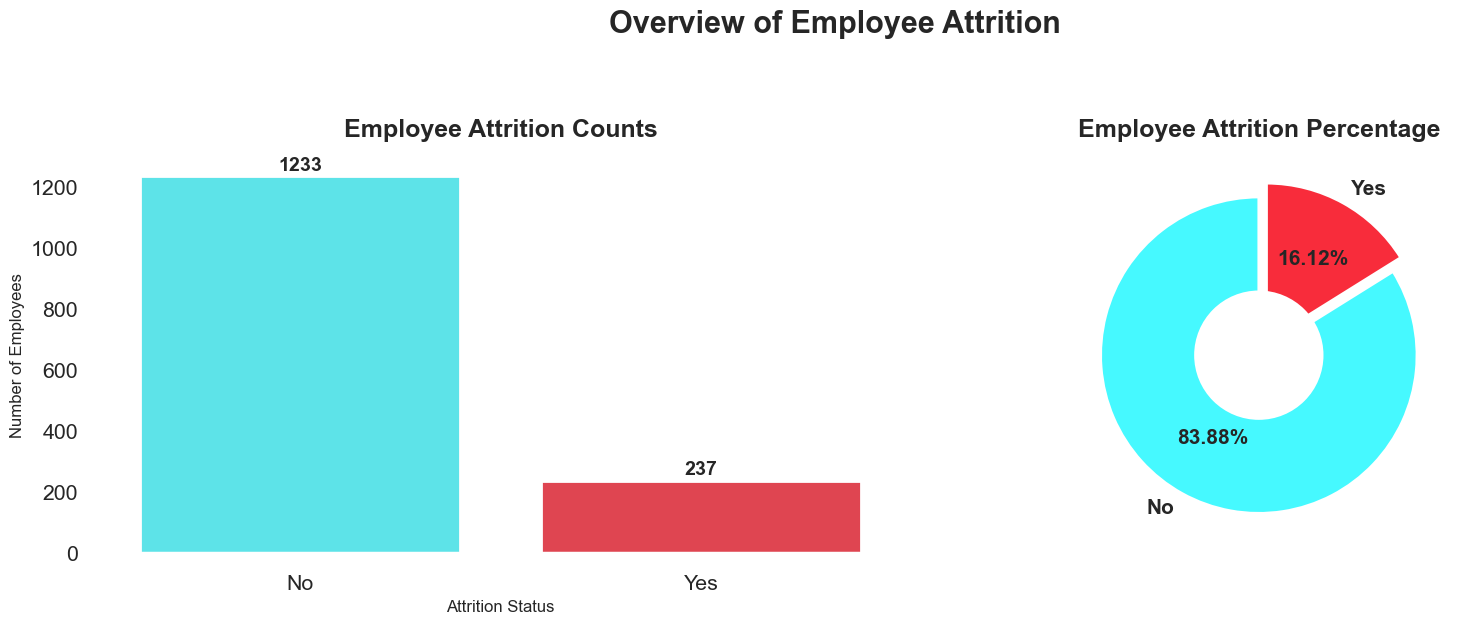

In [5]:
# Set up the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(17, 6))
fig.suptitle("Overview of Employee Attrition", fontsize=22, fontweight="bold", y=1.05)

# --- Bar Plot: Count of Attrition ---
# Calculate attrition counts
attrition_counts = df["Attrition"].value_counts()

# Plotting the bar chart
sns.barplot(x=attrition_counts.index,
            y=attrition_counts.values,
            palette=["#46f9ff", "#f82c3b"],
            ax=axes[0])

# Customize bar chart
axes[0].set_title("Employee Attrition Counts", fontsize=18, fontweight="bold", pad=15)
axes[0].set_xlabel("Attrition Status", fontsize=12)
axes[0].set_ylabel("Number of Employees", fontsize=12)

# Annotate bars with values
for i, count in enumerate(attrition_counts.values):
    axes[0].text(i, count + 20, str(count), ha="center", fontsize=14, fontweight="bold")

# --- Pie Chart: Percentage of Attrition ---
# Plotting the pie chart
colors = ["#46f9ff", "#f82c3b"]
explode = [0, 0.1]  # explode the 'Yes' slice

axes[1].pie(attrition_counts,
            labels=["No", "Yes"],
            autopct="%.2f%%",
            startangle=90,
            explode=explode,
            colors=colors,
            textprops={"fontsize":15, "fontweight":"bold"})

# Draw center circle for donut effect
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig.gca().add_artist(centre_circle)

# Customize pie chart
axes[1].set_title("Employee Attrition Percentage", fontsize=18, fontweight="bold", pad=15)

# Adjust layout
plt.tight_layout()
plt.show()


---
**Employee Attrition Analysis by Gender**

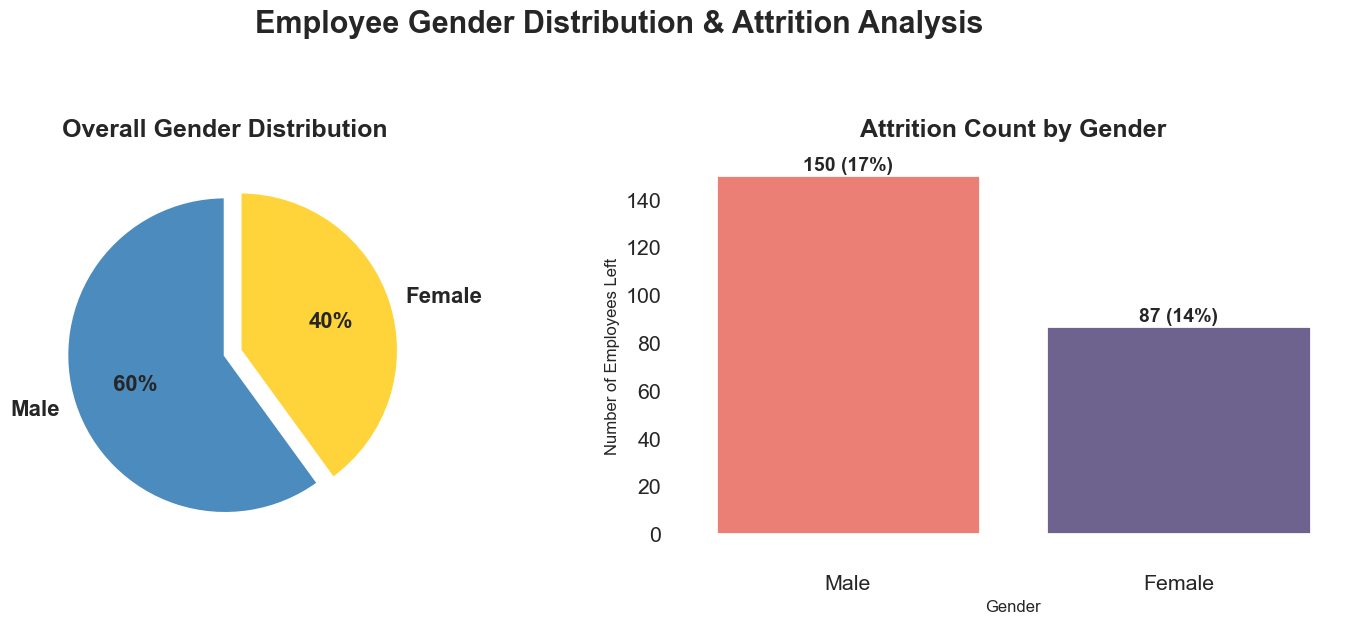

In [6]:
# Set up the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle("Employee Gender Distribution & Attrition Analysis", fontsize=22, fontweight="bold", y=1.05)

# --- Pie Chart: Overall Gender Distribution ---
gender_counts = df["Gender"].value_counts()

# Unique color palette for Gender
gender_colors = ["#4B8BBE", "#FFD43B"]  # Blue and Yellow tones
explode_gender = [0, 0.1]  # Highlight second slice

axes[0].pie(gender_counts,
            labels=gender_counts.index,
            autopct="%.0f%%",
            startangle=90,
            explode=explode_gender,
            colors=gender_colors,
            textprops={"fontsize":16, "fontweight":"bold"})

# Donut effect
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig.gca().add_artist(centre_circle)

axes[0].set_title("Overall Gender Distribution", fontsize=18, fontweight="bold", pad=15)

# --- Bar Plot: Gender-wise Attrition Count & Rate ---
# Calculate attrition counts by gender
left_employees = df[df["Attrition"]=="Yes"]
total_gender_counts = df["Gender"].value_counts()
left_gender_counts = left_employees["Gender"].value_counts()

# Calculate attrition rate percentage
gender_attrition_percent = np.floor((left_gender_counts / total_gender_counts) * 100).values

# Plot bar chart
sns.barplot(x=left_gender_counts.index, y=left_gender_counts.values, palette=["#FF6F61", "#6B5B95"], ax=axes[1])

axes[1].set_title("Attrition Count by Gender", fontsize=18, fontweight="bold", pad=15)
axes[1].set_xlabel("Gender", fontsize=12)
axes[1].set_ylabel("Number of Employees Left", fontsize=12)

# Annotate bars
for idx, val in enumerate(left_gender_counts.values):
    axes[1].text(idx, val + 2, f"{val} ({int(gender_attrition_percent[idx])}%)", ha='center', fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show()


---
**Employee Attrition Analysis by Age**

**Left Plot (Histogram + KDE):**
 - Shows that younger employees (25-35) have a higher tendency to leave.

**Right Plot (Violin Plot):**
 - Highlights that:

 - The median age of employees who left is lower.

 - Older employees (above 40) are less likely to leave.

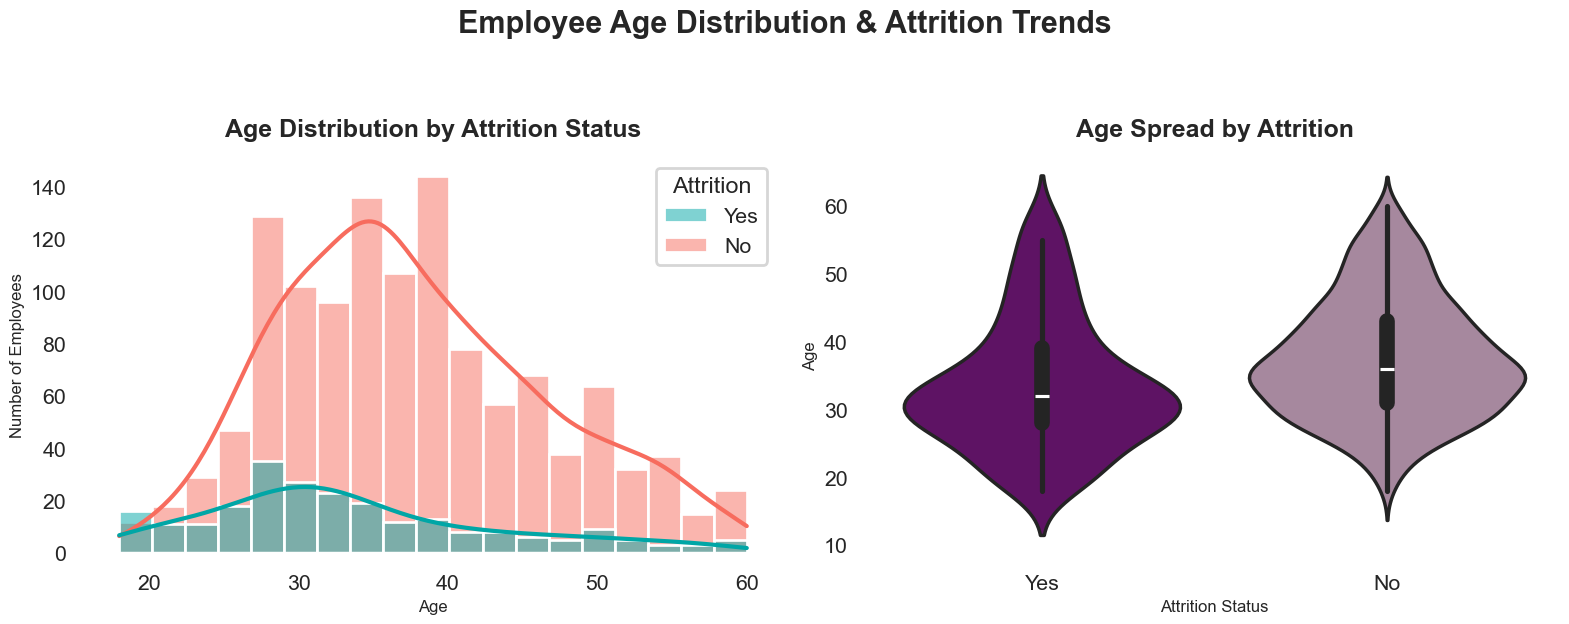

In [7]:
# Set up the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("Employee Age Distribution & Attrition Trends", fontsize=22, fontweight="bold", y=1.05)

# --- Histogram: Age Distribution by Attrition Status ---
# Unique color palette
hist_colors = ["#00A6A6", "#F76C5E"]  # Teal & Coral

sns.histplot(data=df, x="Age", hue="Attrition", kde=True, palette=hist_colors, ax=axes[0])
axes[0].set_title("Age Distribution by Attrition Status", fontsize=18, fontweight="bold", pad=15)
axes[0].set_xlabel("Age", fontsize=12)
axes[0].set_ylabel("Number of Employees", fontsize=12)

# --- Violin Plot: Age vs Attrition ---
sns.violinplot(x="Attrition", y="Age", data=df, palette=["#6A0572", "#AB83A1"], ax=axes[1])
axes[1].set_title("Age Spread by Attrition", fontsize=18, fontweight="bold", pad=15)
axes[1].set_xlabel("Attrition Status", fontsize=12)
axes[1].set_ylabel("Age", fontsize=12)

plt.tight_layout()
plt.show()


**Insight:**
- Clear trend: Attrition decreases with age.

- Younger employees are more prone to switching jobs—could be due to career growth opportunities, dissatisfaction, or external offers.

---
**Attrition Analysis by Business Travel**
- Most employees Travel Rarely.

- However, those who Travel Frequently show the highest attrition rate.

- Employees with Non-Travel roles have the lowest attrition.

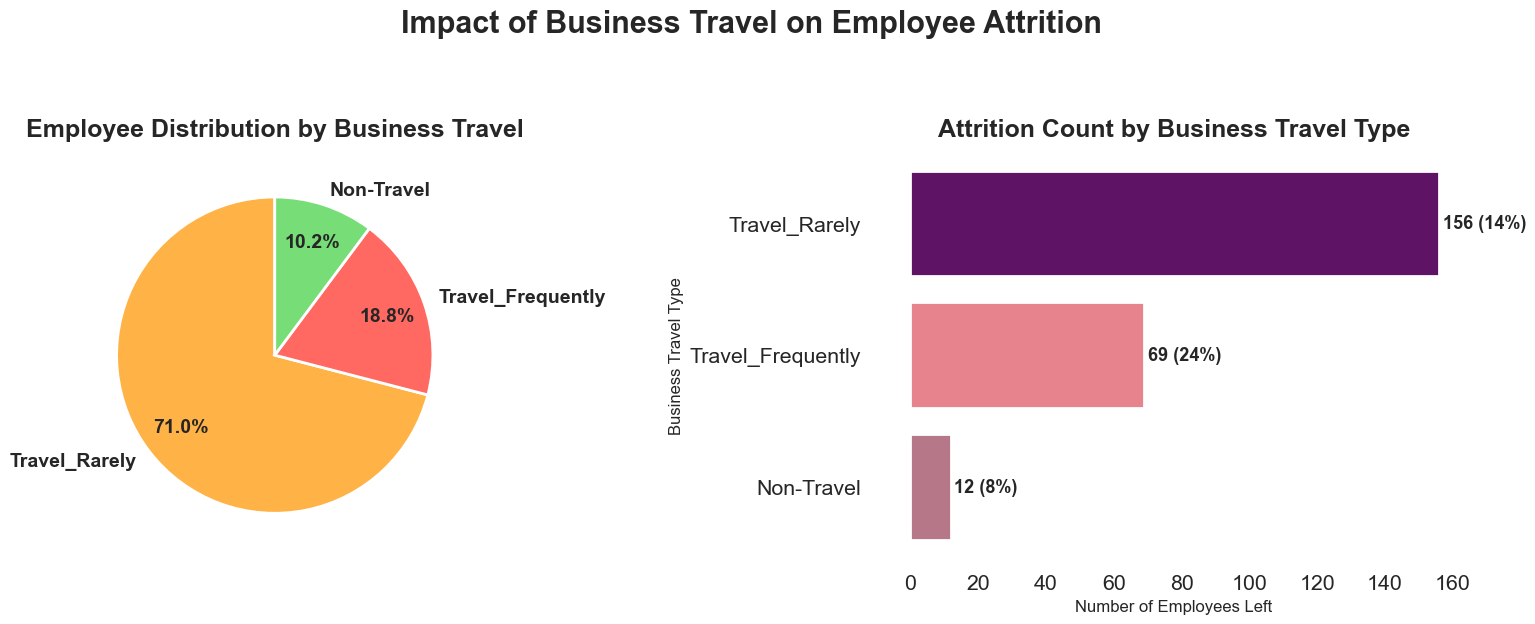

In [8]:
# Set up figure
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("Impact of Business Travel on Employee Attrition", fontsize=22, fontweight="bold", y=1.05)

# --- Pie Chart: Business Travel Distribution ---
travel_counts = df["BusinessTravel"].value_counts()

# New color palette
travel_colors = ['#FFB347', '#FF6961', '#77DD77']  # Orange, Red, Green shades

axes[0].pie(travel_counts.values,
            labels=travel_counts.index,
            autopct="%.1f%%",
            startangle=90,
            pctdistance=0.75,
            colors=travel_colors,
            textprops={"fontsize":14, "fontweight":"bold"})

# Donut effect
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig.gca().add_artist(centre_circle)

axes[0].set_title("Employee Distribution by Business Travel", fontsize=18, fontweight="bold", pad=15)

# --- Horizontal Bar Plot: Attrition by Business Travel ---
left_employees = df[df["Attrition"]=="Yes"]
left_travel_counts = left_employees["BusinessTravel"].value_counts()

# Calculate attrition rate
travel_attrition_rate = np.floor((left_travel_counts / travel_counts) * 100).values

sns.barplot(y=left_travel_counts.index, x=left_travel_counts.values, palette=['#6A0572', '#F67280', '#C06C84'], ax=axes[1])
axes[1].set_title("Attrition Count by Business Travel Type", fontsize=18, fontweight="bold", pad=15)
axes[1].set_xlabel("Number of Employees Left", fontsize=12)
axes[1].set_ylabel("Business Travel Type", fontsize=12)

# Annotate bars
for idx, val in enumerate(left_travel_counts.values):
    axes[1].text(val + 1, idx, f"{val} ({int(travel_attrition_rate[idx])}%)", va='center', fontsize=13, fontweight="bold")

plt.tight_layout()
plt.show()


---
**Attrition Analysis by Department**
- Most employees belong to Research & Development, but attrition is proportionally lower here.

- Sales Department faces the highest attrition rate.

- Though small in size, Human Resources also shows a significant attrition percentage.

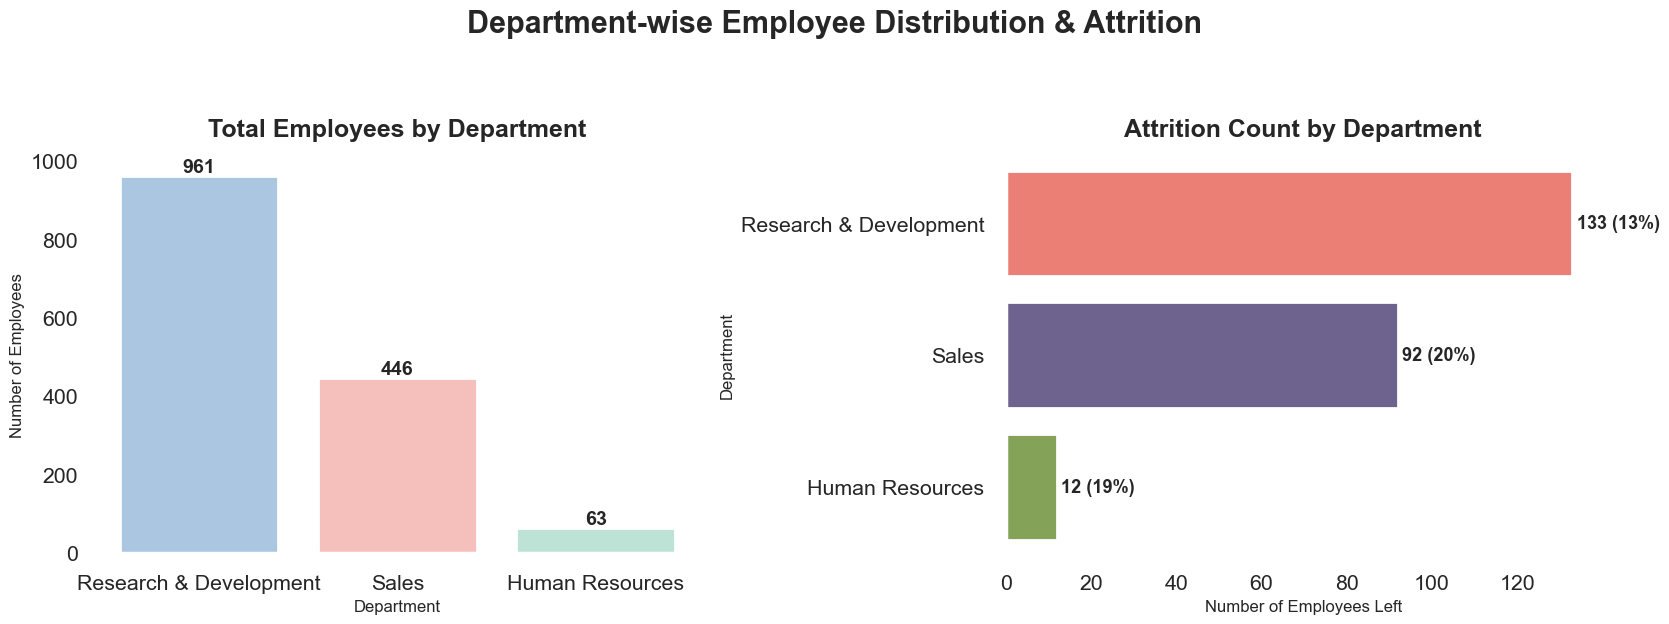

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(17, 6))
fig.suptitle("Department-wise Employee Distribution & Attrition", fontsize=22, fontweight="bold", y=1.05)

# --- Bar Plot: Total Employees by Department ---
dept_counts = df["Department"].value_counts()

# Fresh pastel color palette
dept_colors = ["#A1C6EA", "#FFB7B2", "#B5EAD7"]

sns.barplot(x=dept_counts.index, y=dept_counts.values, palette=dept_colors, ax=axes[0])
axes[0].set_title("Total Employees by Department", fontsize=18, fontweight="bold", pad=15)
axes[0].set_xlabel("Department", fontsize=12)
axes[0].set_ylabel("Number of Employees", fontsize=12)

# Annotate bars
for idx, val in enumerate(dept_counts.values):
    axes[0].text(idx, val + 10, str(val), ha='center', fontsize=14, fontweight="bold")

# --- Horizontal Bar Plot: Attrition Count by Department ---
left_dept_counts = df[df["Attrition"]=="Yes"]["Department"].value_counts()
dept_attrition_rate = np.floor((left_dept_counts / dept_counts) * 100).values

sns.barplot(y=left_dept_counts.index, x=left_dept_counts.values, palette=["#FF6F61", "#6B5B95", "#88B04B"], ax=axes[1])
axes[1].set_title("Attrition Count by Department", fontsize=18, fontweight="bold", pad=15)
axes[1].set_xlabel("Number of Employees Left", fontsize=12)
axes[1].set_ylabel("Department", fontsize=12)

# Annotate bars
for idx, val in enumerate(left_dept_counts.values):
    axes[1].text(val + 1, idx, f"{val} ({int(dept_attrition_rate[idx])}%)", va='center', fontsize=13, fontweight="bold")

plt.tight_layout()
plt.show()


- Frequent business travel likely contributes to stress or work-life imbalance, leading to higher attrition. This highlights a key area for HR to address through flexible policies or support systems.

---
**Attrition Analysis by Daily Rate**
- Most employees fall into the Average and High Daily Rate groups.

- However, attrition is highest among employees in the Average and Low Daily Rate categories.

- Those earning a High Daily Rate show significantly lower attrition.

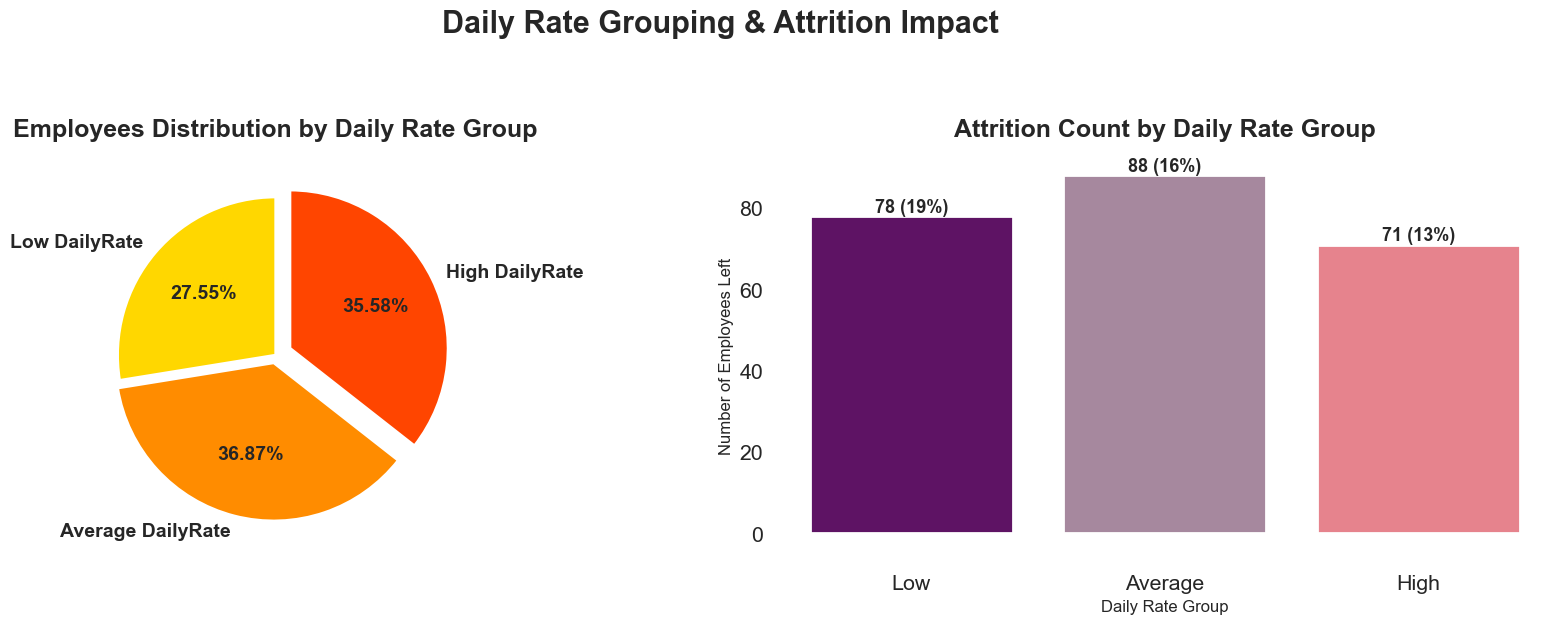

In [10]:
bins = [0, 500, 1000, 1500]
labels = ['Low', 'Average', 'High']
df['DailyRateGroup'] = pd.cut(df['DailyRate'], bins=bins, labels=labels)

# Prepare data
daily_group_counts = df['DailyRateGroup'].value_counts().sort_index()
left_daily_counts = df[df["Attrition"]=="Yes"]['DailyRateGroup'].value_counts().sort_index()
daily_attrition_rate = np.floor((left_daily_counts / daily_group_counts) * 100).values

# Define colors and labels
daily_colors = ['#FFD700', '#FF8C00', '#FF4500']
explode_daily = [0, 0.05, 0.1]
labels_daily = [str(label) + " DailyRate" for label in daily_group_counts.index]

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(17, 6))
fig.suptitle("Daily Rate Grouping & Attrition Impact", fontsize=22, fontweight="bold", y=1.05)

# Pie Chart
axes[0].pie(daily_group_counts.values,
            labels=labels_daily,
            autopct="%.2f%%",
            explode=explode_daily,
            colors=daily_colors,
            textprops={"fontsize":14, "fontweight":"bold"},
            startangle=90)
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig.gca().add_artist(centre_circle)
axes[0].set_title("Employees Distribution by Daily Rate Group", fontsize=18, fontweight="bold", pad=15)

# Bar Plot
sns.barplot(x=left_daily_counts.index, y=left_daily_counts.values, palette=['#6A0572', '#AB83A1', '#F67280'], ax=axes[1])
axes[1].set_title("Attrition Count by Daily Rate Group", fontsize=18, fontweight="bold", pad=15)
axes[1].set_xlabel("Daily Rate Group", fontsize=12)
axes[1].set_ylabel("Number of Employees Left", fontsize=12)
for idx, val in enumerate(left_daily_counts.values):
    axes[1].text(idx, val + 1, f"{val} ({int(daily_attrition_rate[idx])}%)", ha='center', fontsize=13, fontweight="bold")

plt.tight_layout()
plt.show()

- Compensation seems to play a role—employees with lower or average daily rates are more likely to leave. The organization could explore better pay structures or benefits to retain talent.


---
**Employee Attrition Analysis by Education**



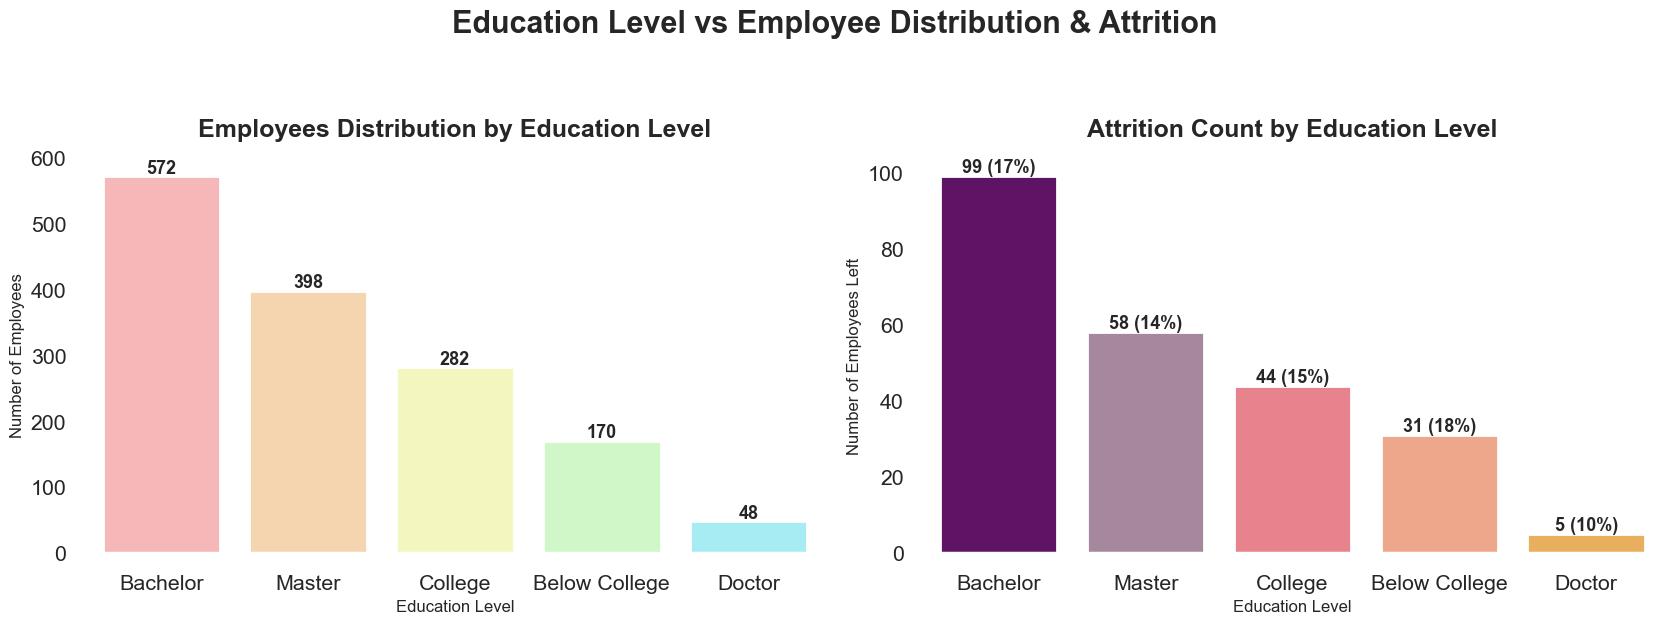

In [11]:
# Prepare data
total_education = df["Education"].value_counts()
left_education = df[df["Attrition"]=="Yes"]["Education"].value_counts()
education_attrition_rate = np.floor((left_education / total_education) * 100).values

# Set up the figure
fig, axes = plt.subplots(1, 2, figsize=(17, 6))
fig.suptitle("Education Level vs Employee Distribution & Attrition", fontsize=22, fontweight="bold", y=1.05)

# --- Bar Plot: Total Employees by Education ---
edu_colors = ["#FFADAD", "#FFD6A5", "#FDFFB6", "#CAFFBF", "#9BF6FF"]

sns.barplot(x=total_education.index, y=total_education.values, palette=edu_colors, ax=axes[0])
axes[0].set_title("Employees Distribution by Education Level", fontsize=18, fontweight="bold", pad=15)
axes[0].set_xlabel("Education Level", fontsize=12)
axes[0].set_ylabel("Number of Employees", fontsize=12)
for idx, val in enumerate(total_education.values):
    axes[0].text(idx, val + 5, str(val), ha='center', fontsize=13, fontweight="bold")

# --- Bar Plot: Attrition by Education ---
attrition_colors = ["#6A0572", "#AB83A1", "#F67280", "#FFA07A", "#FFB347"]

sns.barplot(x=left_education.index, y=left_education.values, palette=attrition_colors, ax=axes[1])
axes[1].set_title("Attrition Count by Education Level", fontsize=18, fontweight="bold", pad=15)
axes[1].set_xlabel("Education Level", fontsize=12)
axes[1].set_ylabel("Number of Employees Left", fontsize=12)
for idx, val in enumerate(left_education.values):
    axes[1].text(idx, val + 1, f"{val} ({int(education_attrition_rate[idx])}%)", ha='center', fontsize=13, fontweight="bold")

plt.tight_layout()
plt.show()


- Most employees hold a Bachelor's or Master's degree.

- Very few have a Doctorate.

- There's a noticeable trend:
As education level increases, attrition rate decreases.

---
**Employee Attrition Analysis by Education Field**

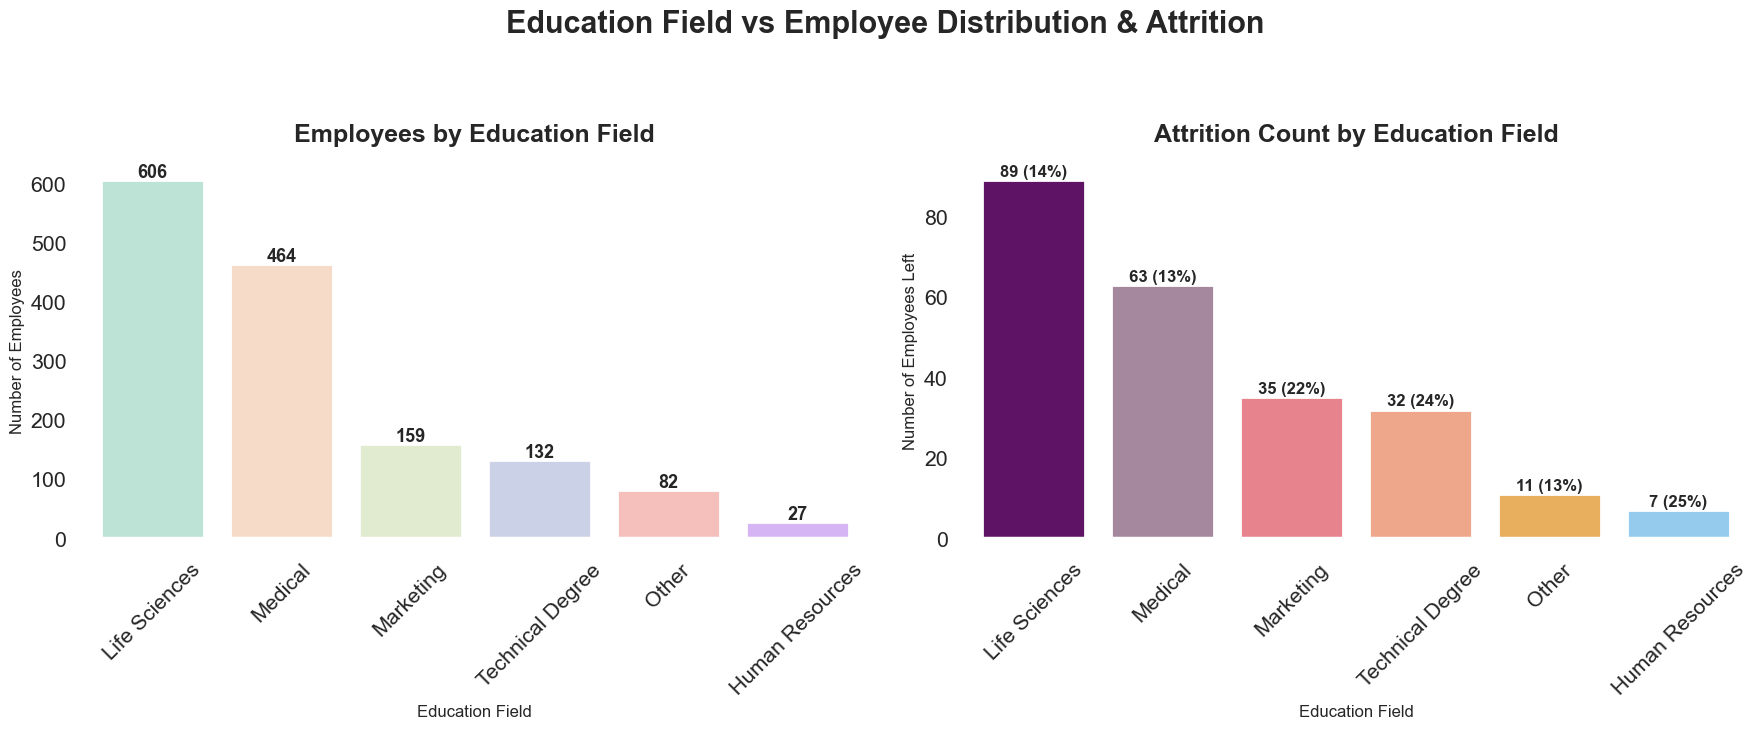

In [12]:
# Prepare data
total_edu_field = df["EducationField"].value_counts()
left_edu_field = df[df["Attrition"]=="Yes"]["EducationField"].value_counts()
edu_field_attrition_rate = np.floor((left_edu_field / total_edu_field) * 100).values

# Set up the figure
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle("Education Field vs Employee Distribution & Attrition", fontsize=22, fontweight="bold", y=1.05)

# --- Bar Plot: Total Employees by Education Field ---
edu_field_colors = ["#B5EAD7", "#FFDAC1", "#E2F0CB", "#C7CEEA", "#FFB7B2", "#D5AAFF"]

sns.barplot(x=total_edu_field.index, y=total_edu_field.values, palette=edu_field_colors, ax=axes[0])
axes[0].set_title("Employees by Education Field", fontsize=18, fontweight="bold", pad=15)
axes[0].set_xlabel("Education Field", fontsize=12)
axes[0].set_ylabel("Number of Employees", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
for idx, val in enumerate(total_edu_field.values):
    axes[0].text(idx, val + 5, str(val), ha='center', fontsize=13, fontweight="bold")

# --- Bar Plot: Attrition by Education Field ---
attr_field_colors = ["#6A0572", "#AB83A1", "#F67280", "#FFA07A", "#FFB347", "#87CEFA"]

sns.barplot(x=left_edu_field.index, y=left_edu_field.values, palette=attr_field_colors, ax=axes[1])
axes[1].set_title("Attrition Count by Education Field", fontsize=18, fontweight="bold", pad=15)
axes[1].set_xlabel("Education Field", fontsize=12)
axes[1].set_ylabel("Number of Employees Left", fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
for idx, val in enumerate(left_edu_field.values):
    axes[1].text(idx, val + 1, f"{val} ({int(edu_field_attrition_rate[idx])}%)", ha='center', fontsize=12, fontweight="bold")

plt.tight_layout()
plt.show()


- Majority of employees come from Life Sciences and Medical fields.

- Fields like Human Resources, Marketing, and Technical Degree show higher attrition rates, despite having fewer employees.

- This could indicate workload imbalance or limited career growth in these fields.

---
**Employee Attrition Analysis by Environment Satisfaction**

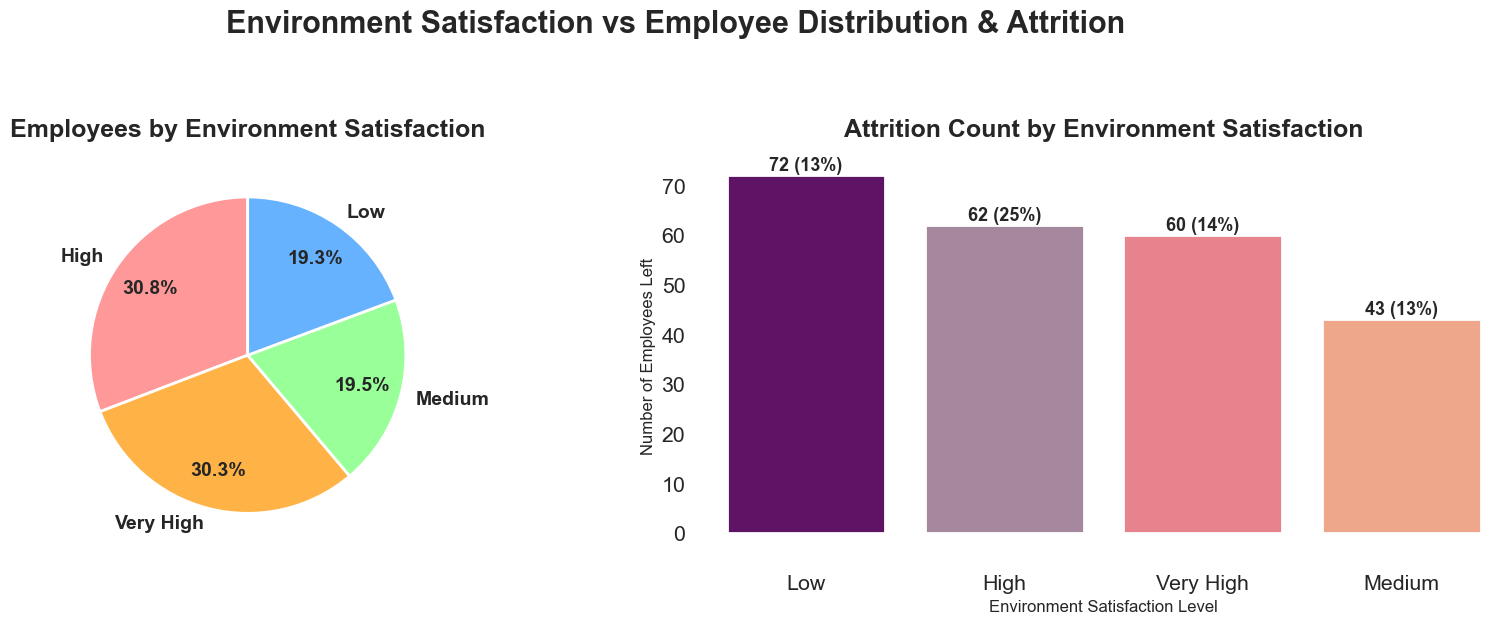

In [13]:
# Prepare data
total_env_satisfaction = df["EnvironmentSatisfaction"].value_counts()
left_env_satisfaction = df[df["Attrition"]=="Yes"]["EnvironmentSatisfaction"].value_counts()
env_attrition_rate = np.floor((left_env_satisfaction / total_env_satisfaction) * 100).values

# Set up figure
fig, axes = plt.subplots(1, 2, figsize=(17, 6))
fig.suptitle("Environment Satisfaction vs Employee Distribution & Attrition", fontsize=22, fontweight="bold", y=1.05)

# --- Pie Chart: Environment Satisfaction Distribution ---
env_colors = ['#FF9999','#FFB347','#99FF99','#66B2FF']
labels_env = total_env_satisfaction.index

axes[0].pie(total_env_satisfaction.values,
            labels=labels_env,
            autopct="%.1f%%",
            startangle=90,
            pctdistance=0.75,
            colors=env_colors,
            textprops={"fontsize":14, "fontweight":"bold"})

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig.gca().add_artist(centre_circle)
axes[0].set_title("Employees by Environment Satisfaction", fontsize=18, fontweight="bold", pad=15)

# --- Bar Plot: Attrition by Environment Satisfaction ---
attr_env_colors = ["#6A0572", "#AB83A1", "#F67280", "#FFA07A"]

sns.barplot(x=left_env_satisfaction.index, y=left_env_satisfaction.values, palette=attr_env_colors, ax=axes[1])
axes[1].set_title("Attrition Count by Environment Satisfaction", fontsize=18, fontweight="bold", pad=15)
axes[1].set_xlabel("Environment Satisfaction Level", fontsize=12)
axes[1].set_ylabel("Number of Employees Left", fontsize=12)
for idx, val in enumerate(left_env_satisfaction.values):
    axes[1].text(idx, val + 1, f"{val} ({int(env_attrition_rate[idx])}%)", ha='center', fontsize=13, fontweight="bold")

plt.tight_layout()
plt.show()


- Most employees rated their environment satisfaction as High or Very High.

- Surprisingly, even at higher satisfaction levels, attrition remains significant.

- Indicates that while environment matters, other factors (like job role, growth, pay) likely drive attrition here.

---
**Employee Attrition Analysis by Job Role**

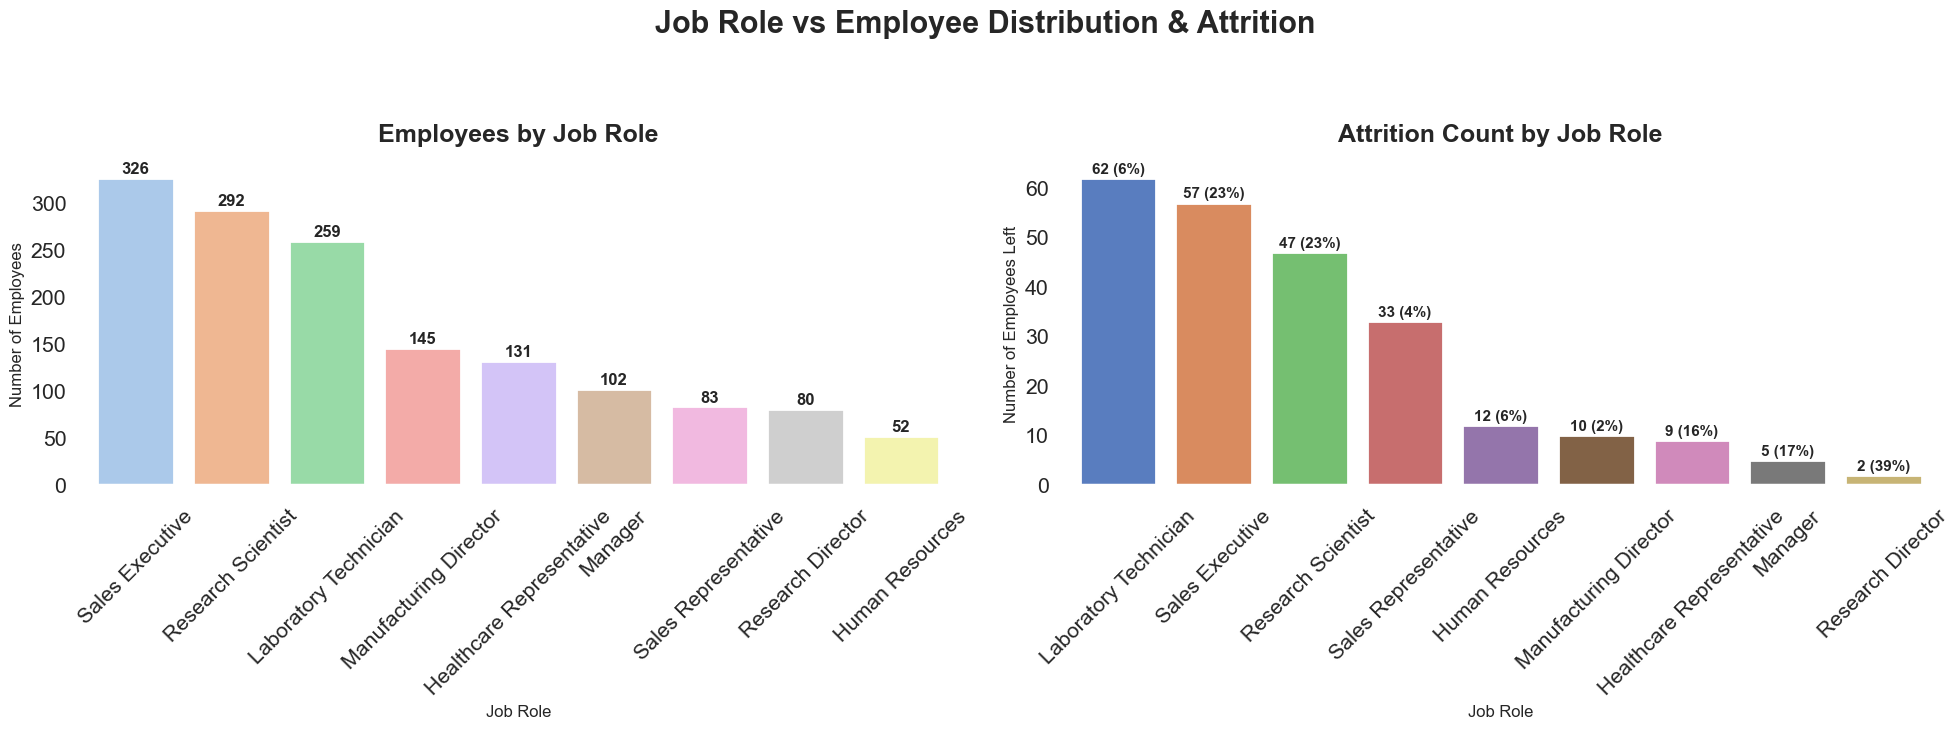

In [14]:
# Prepare data
total_job_role = df["JobRole"].value_counts()
left_job_role = df[df["Attrition"]=="Yes"]["JobRole"].value_counts()
job_role_attrition_rate = np.floor((left_job_role / total_job_role) * 100).values

# Set up figure
fig, axes = plt.subplots(1, 2, figsize=(20, 7))
fig.suptitle("Job Role vs Employee Distribution & Attrition", fontsize=22, fontweight="bold", y=1.05)

# --- Bar Plot: Total Employees by Job Role ---
job_role_colors = sns.color_palette("pastel", len(total_job_role))

sns.barplot(x=total_job_role.index, y=total_job_role.values, palette=job_role_colors, ax=axes[0])
axes[0].set_title("Employees by Job Role", fontsize=18, fontweight="bold", pad=15)
axes[0].set_xlabel("Job Role", fontsize=12)
axes[0].set_ylabel("Number of Employees", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
for idx, val in enumerate(total_job_role.values):
    axes[0].text(idx, val + 5, str(val), ha='center', fontsize=12, fontweight="bold")

# --- Bar Plot: Attrition by Job Role ---
attr_job_colors = sns.color_palette("muted", len(left_job_role))

sns.barplot(x=left_job_role.index, y=left_job_role.values, palette=attr_job_colors, ax=axes[1])
axes[1].set_title("Attrition Count by Job Role", fontsize=18, fontweight="bold", pad=15)
axes[1].set_xlabel("Job Role", fontsize=12)
axes[1].set_ylabel("Number of Employees Left", fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
for idx, val in enumerate(left_job_role.values):
    axes[1].text(idx, val + 1, f"{val} ({int(job_role_attrition_rate[idx])}%)", ha='center', fontsize=11, fontweight="bold")

plt.tight_layout()
plt.show()


- Most employees are Sales Executives, Research Scientists, or Lab Technicians.

- Highest attrition rates seen in:

  - Sales Executive

  - Research Scientist

  - Laboratory Technician

- Specialized roles like Research Director and Manager have lower attrition.

---
**Employee Attrition Analysis by Job Level**

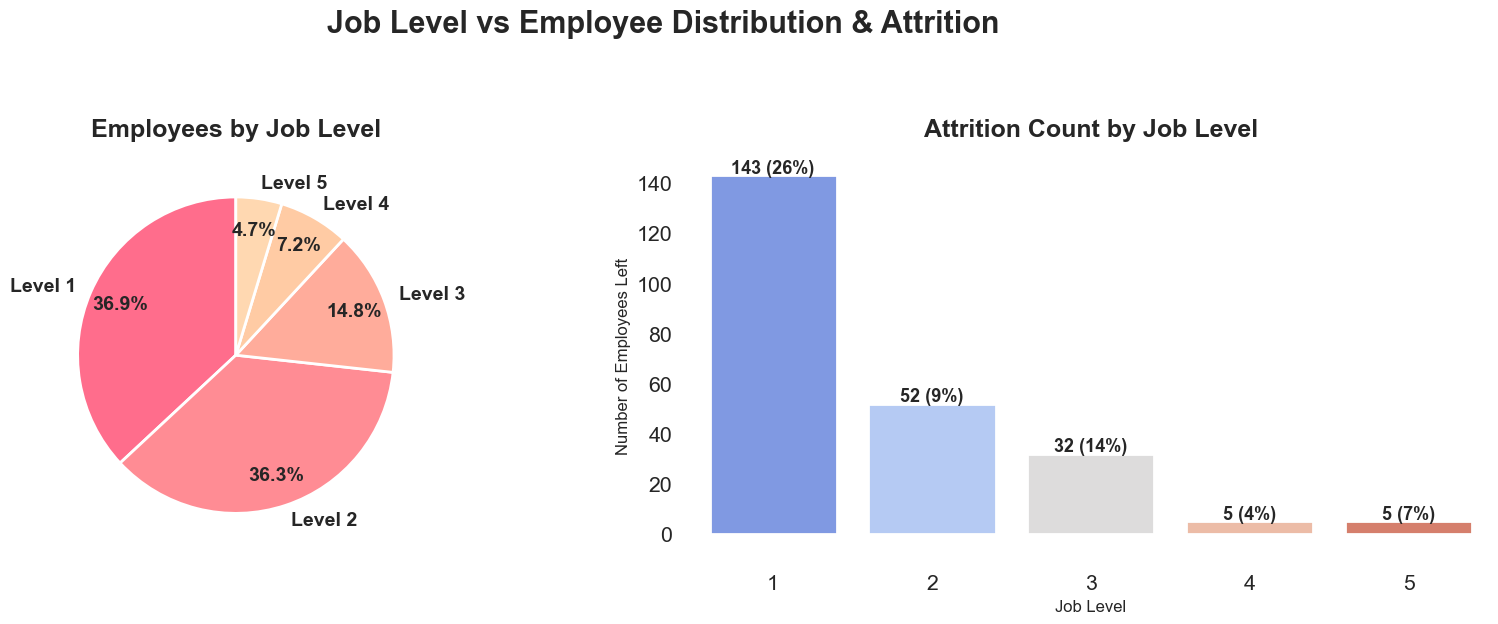

In [15]:
# Prepare data
total_job_level = df["JobLevel"].value_counts().sort_index()
left_job_level = df[df["Attrition"]=="Yes"]["JobLevel"].value_counts().sort_index()
job_level_attrition_rate = np.floor((left_job_level / total_job_level) * 100).values

# Set up figure
fig, axes = plt.subplots(1, 2, figsize=(17, 6))
fig.suptitle("Job Level vs Employee Distribution & Attrition", fontsize=22, fontweight="bold", y=1.05)

# --- Pie Chart: Total Employees by Job Level ---
job_level_colors = ['#FF6D8C', '#FF8C94', '#FFAC9B', '#FFCBA4', "#FFD8B1"]
labels_levels = [f"Level {lvl}" for lvl in total_job_level.index]

axes[0].pie(total_job_level.values,
            labels=labels_levels,
            autopct="%.1f%%",
            startangle=90,
            pctdistance=0.8,
            colors=job_level_colors,
            textprops={"fontsize":14, "fontweight":"bold"})
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig.gca().add_artist(centre_circle)
axes[0].set_title("Employees by Job Level", fontsize=18, fontweight="bold", pad=15)

# --- Bar Plot: Attrition by Job Level ---
sns.barplot(x=left_job_level.index, y=left_job_level.values, palette=sns.color_palette("coolwarm", 5), ax=axes[1])
axes[1].set_title("Attrition Count by Job Level", fontsize=18, fontweight="bold", pad=15)
axes[1].set_xlabel("Job Level", fontsize=12)
axes[1].set_ylabel("Number of Employees Left", fontsize=12)
for idx, val in enumerate(left_job_level.values):
    axes[1].text(idx, val + 1, f"{val} ({int(job_level_attrition_rate[idx])}%)", ha='center', fontsize=13, fontweight="bold")

plt.tight_layout()
plt.show()


- Majority of employees are at Entry (Level 1) and Junior (Level 2) positions.

- Highest attrition occurs at Entry Level.

- As job level increases, attrition rate decreases, likely due to better pay, stability, and job satisfaction.

---
**Employee Attrition Analysis by Job Satisfaction**

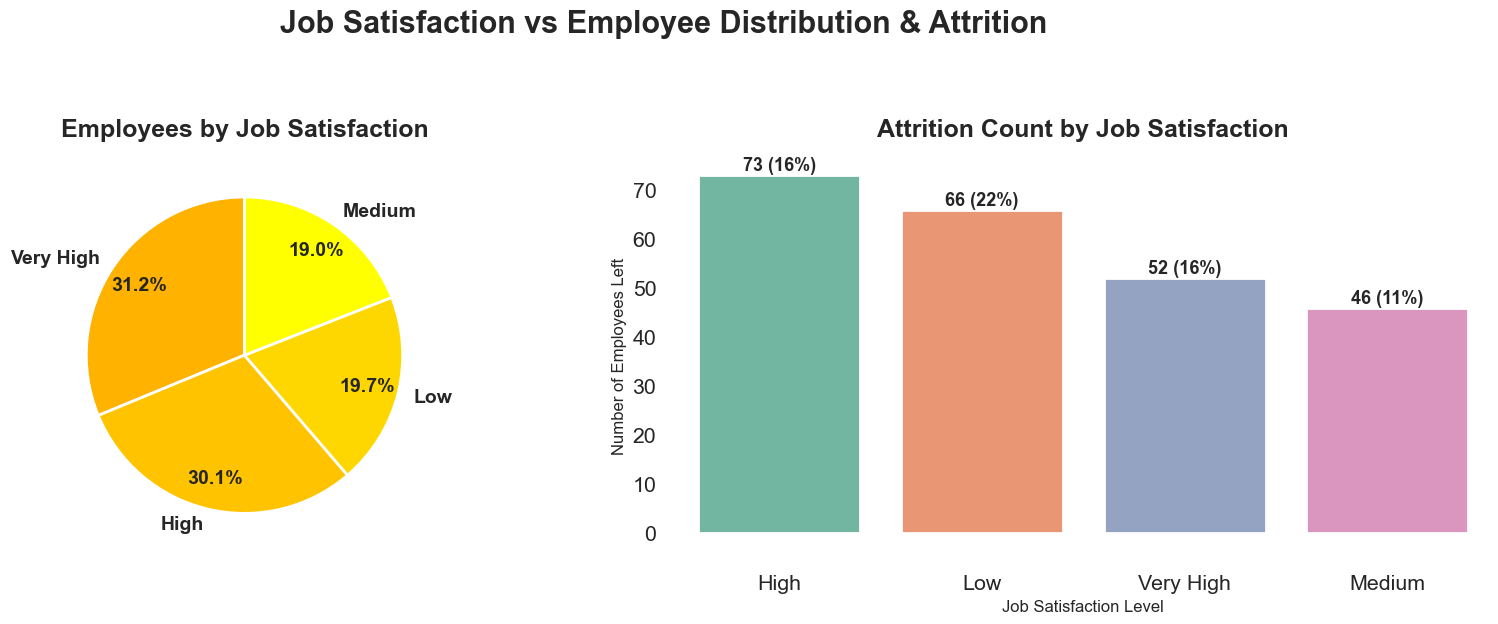

In [16]:
# Prepare data
total_job_satisfaction = df["JobSatisfaction"].value_counts()
left_job_satisfaction = df[df["Attrition"]=="Yes"]["JobSatisfaction"].value_counts()
job_satisfaction_attrition_rate = np.floor((left_job_satisfaction / total_job_satisfaction) * 100).values

# Set up figure
fig, axes = plt.subplots(1, 2, figsize=(17, 6))
fig.suptitle("Job Satisfaction vs Employee Distribution & Attrition", fontsize=22, fontweight="bold", y=1.05)

# --- Pie Chart: Total Employees by Job Satisfaction ---
satisfaction_colors = ['#FFB300', '#FFC300', '#FFD700', '#FFFF00']

axes[0].pie(total_job_satisfaction.values,
            labels=total_job_satisfaction.index,
            autopct="%.1f%%",
            startangle=90,
            pctdistance=0.8,
            colors=satisfaction_colors,
            textprops={"fontsize":14, "fontweight":"bold"})
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig.gca().add_artist(centre_circle)
axes[0].set_title("Employees by Job Satisfaction", fontsize=18, fontweight="bold", pad=15)

# --- Bar Plot: Attrition by Job Satisfaction ---
sns.barplot(x=left_job_satisfaction.index, y=left_job_satisfaction.values, palette=sns.color_palette("Set2"), ax=axes[1])
axes[1].set_title("Attrition Count by Job Satisfaction", fontsize=18, fontweight="bold", pad=15)
axes[1].set_xlabel("Job Satisfaction Level", fontsize=12)
axes[1].set_ylabel("Number of Employees Left", fontsize=12)
for idx, val in enumerate(left_job_satisfaction.values):
    axes[1].text(idx, val + 1, f"{val} ({int(job_satisfaction_attrition_rate[idx])}%)", ha='center', fontsize=13, fontweight="bold")

plt.tight_layout()
plt.show()


- Most employees report High or Very High satisfaction.

- However, those with Low satisfaction show a clear spike in attrition.

- Interestingly, even satisfied employees are leaving, suggesting external factors beyond just satisfaction.

---
**Employee Attrition Analysis by Marital Status**

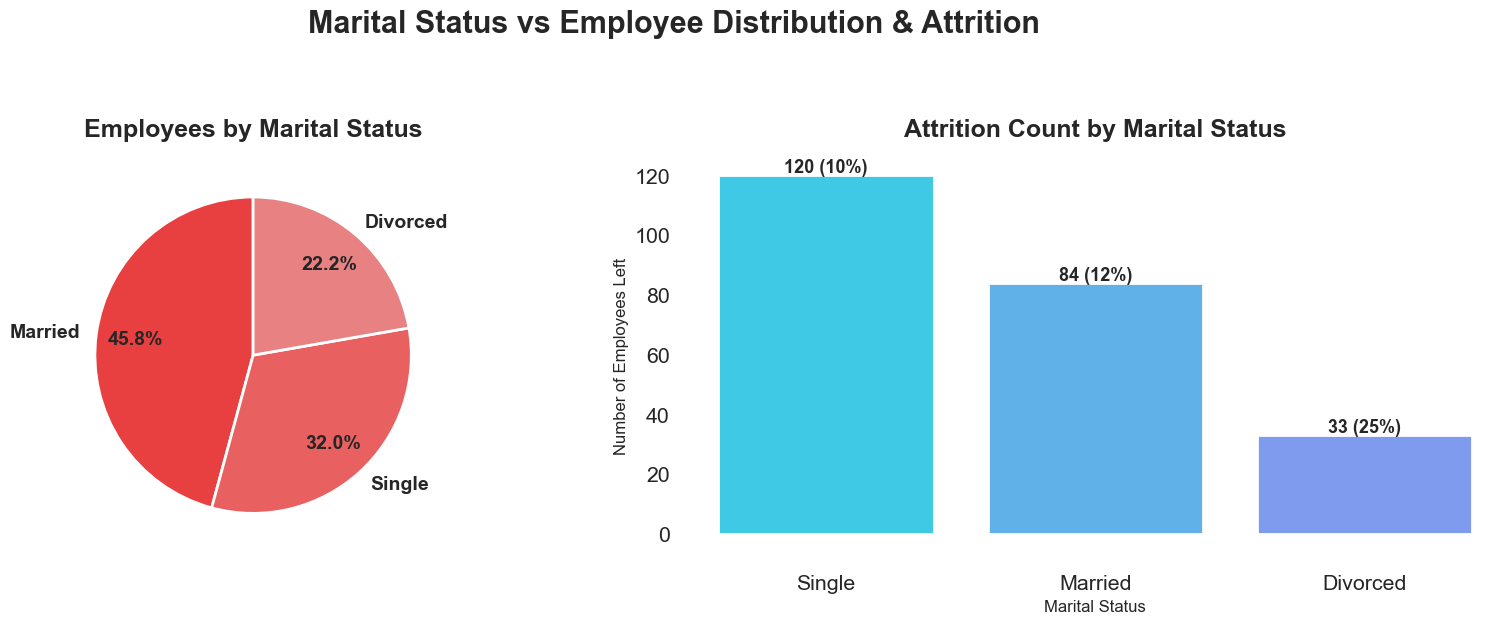

In [17]:
# Prepare data
total_marital_status = df["MaritalStatus"].value_counts()
left_marital_status = df[df["Attrition"]=="Yes"]["MaritalStatus"].value_counts()
marital_attrition_rate = np.floor((left_marital_status / total_marital_status) * 100).values

# Set up figure
fig, axes = plt.subplots(1, 2, figsize=(17, 6))
fig.suptitle("Marital Status vs Employee Distribution & Attrition", fontsize=22, fontweight="bold", y=1.05)

# --- Pie Chart: Total Employees by Marital Status ---
marital_colors = ['#E84040', '#E96060', '#E88181']

axes[0].pie(total_marital_status.values,
            labels=total_marital_status.index,
            autopct="%.1f%%",
            startangle=90,
            pctdistance=0.75,
            colors=marital_colors,
            textprops={"fontsize":14, "fontweight":"bold"})
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig.gca().add_artist(centre_circle)
axes[0].set_title("Employees by Marital Status", fontsize=18, fontweight="bold", pad=15)

# --- Bar Plot: Attrition by Marital Status ---
sns.barplot(x=left_marital_status.index, y=left_marital_status.values, palette=sns.color_palette("cool"), ax=axes[1])
axes[1].set_title("Attrition Count by Marital Status", fontsize=18, fontweight="bold", pad=15)
axes[1].set_xlabel("Marital Status", fontsize=12)
axes[1].set_ylabel("Number of Employees Left", fontsize=12)
for idx, val in enumerate(left_marital_status.values):
    axes[1].text(idx, val + 1, f"{val} ({int(marital_attrition_rate[idx])}%)", ha='center', fontsize=13, fontweight="bold")

plt.tight_layout()
plt.show()


- Most employees are Married.

- The highest attrition rate is among those who are Divorced.

- Single employees show the lowest attrition rate.

---
**Monthly Income & Attrition Insight**

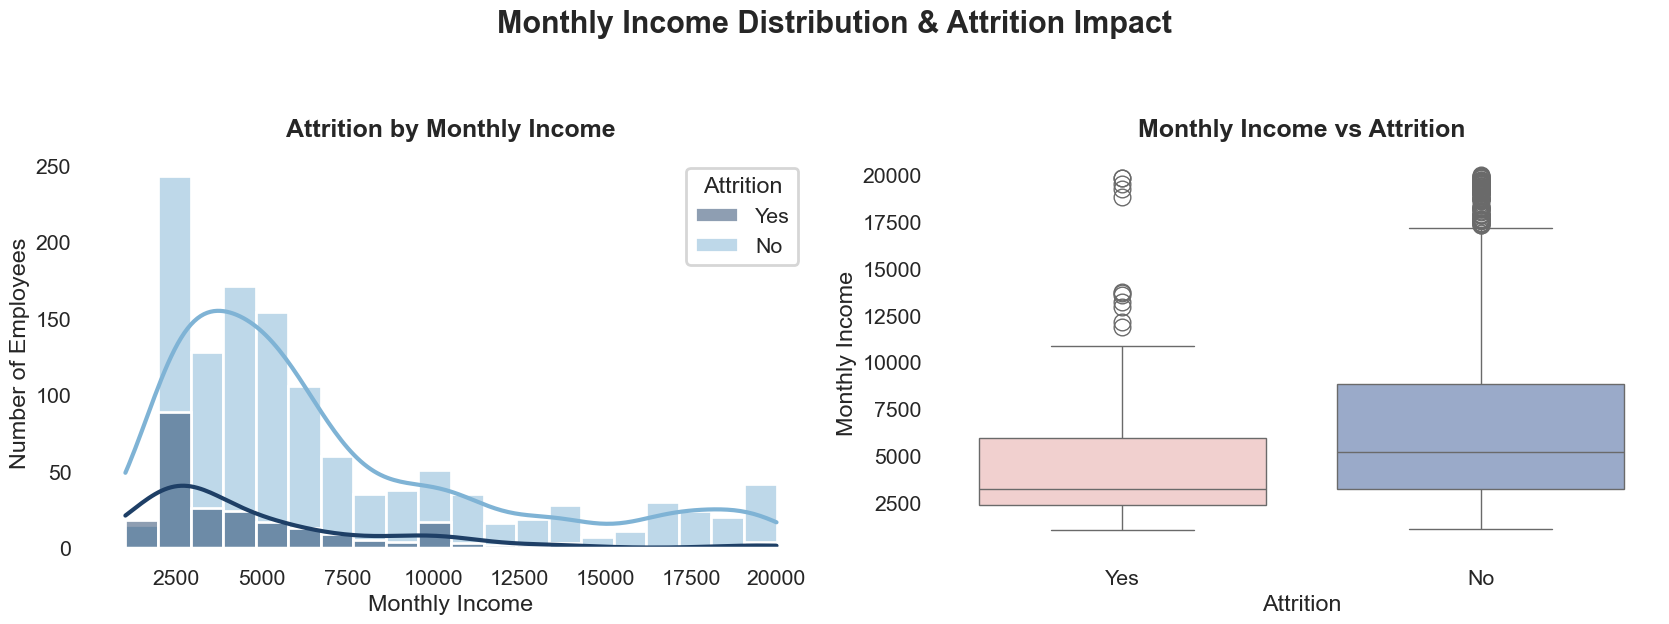

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(17, 6))
fig.suptitle("Monthly Income Distribution & Attrition Impact", fontsize=22, fontweight="bold", y=1.05)

# Histogram + KDE
sns.histplot(data=df, x="MonthlyIncome", hue="Attrition", kde=True, palette=["#1E3F66", "#7FB3D5"], ax=axes[0])
axes[0].set_title("Attrition by Monthly Income", fontsize=18, fontweight="bold", pad=15)
axes[0].set_xlabel("Monthly Income")
axes[0].set_ylabel("Number of Employees")

# Boxplot
sns.boxplot(x="Attrition", y="MonthlyIncome", data=df, palette=["#F7CAC9", "#92A8D1"], ax=axes[1])
axes[1].set_title("Monthly Income vs Attrition", fontsize=18, fontweight="bold", pad=15)
axes[1].set_xlabel("Attrition")
axes[1].set_ylabel("Monthly Income")

plt.tight_layout()
plt.show()


- Most employees earn below 10,000.

- Employees with lower incomes are more likely to leave.

- As income increases, attrition decreases—highlighting pay as a key retention factor.

---
**Work Experience (Companies Worked) & Attrition Insight**

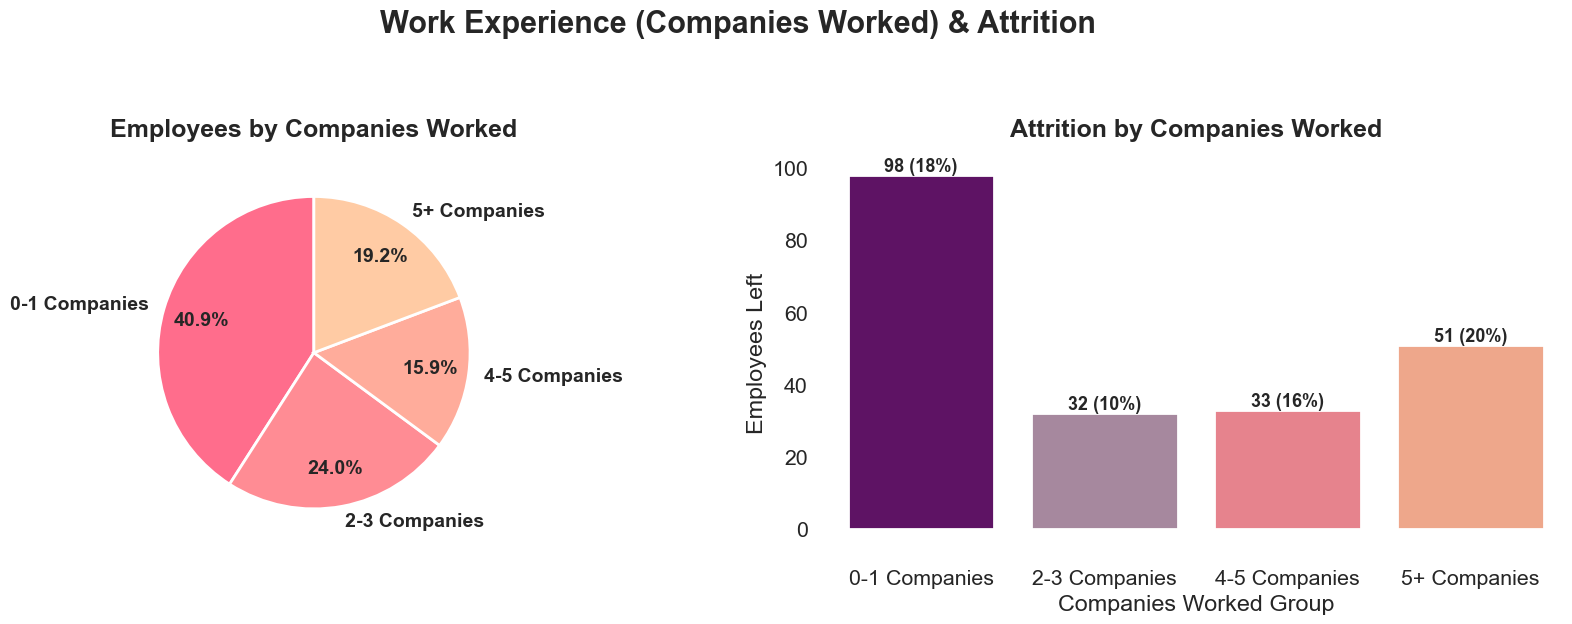

In [19]:
# Define bins and labels for grouping
bins = [0, 1, 3, 5, 10]
labels = ['0-1 Companies', '2-3 Companies', '4-5 Companies', '5+ Companies']
df["NumCompaniesWorkedGroup"] = pd.cut(df['NumCompaniesWorked'], bins=bins, labels=labels)

# Prepare data
total_companies = df["NumCompaniesWorkedGroup"].value_counts().sort_index()
left_companies = df[df["Attrition"]=="Yes"]["NumCompaniesWorkedGroup"].value_counts().sort_index()
companies_attrition_rate = np.floor((left_companies / total_companies) * 100).values

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(17, 6))
fig.suptitle("Work Experience (Companies Worked) & Attrition", fontsize=22, fontweight="bold", y=1.05)

# Pie Chart
axes[0].pie(total_companies.values,
            labels=total_companies.index,
            autopct="%.1f%%",
            startangle=90,
            pctdistance=0.75,
            colors=['#FF6D8C', '#FF8C94', '#FFAC9B', '#FFCBA4'],
            textprops={"fontsize":14, "fontweight":"bold"})
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig.gca().add_artist(centre_circle)
axes[0].set_title("Employees by Companies Worked", fontsize=18, fontweight="bold", pad=15)

# Bar Plot
sns.barplot(x=left_companies.index, y=left_companies.values, palette=["#6A0572","#AB83A1","#F67280","#FFA07A"], ax=axes[1])
axes[1].set_title("Attrition by Companies Worked", fontsize=18, fontweight="bold", pad=15)
axes[1].set_xlabel("Companies Worked Group")
axes[1].set_ylabel("Employees Left")
for idx, val in enumerate(left_companies.values):
    axes[1].text(idx, val + 1, f"{val} ({int(companies_attrition_rate[idx])}%)", ha='center', fontsize=13, fontweight="bold")

plt.tight_layout()
plt.show()


- Most employees have worked for 1 or fewer companies.

- Higher attrition is observed among those with experience in fewer companies.

- Employees who've worked at 5+ companies show slightly lower attrition, likely due to stability-seeking behavior.

---
**Overtime & Attrition Insight**

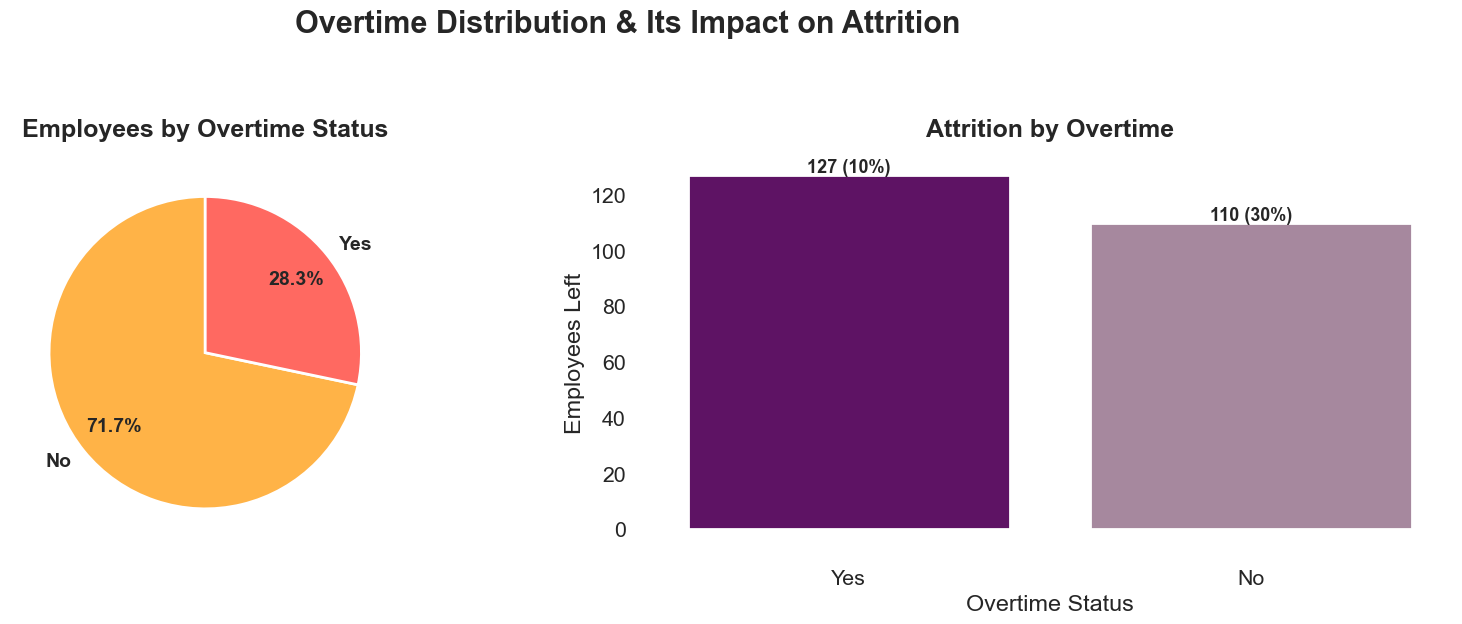

In [20]:
# Prepare data
total_overtime = df["OverTime"].value_counts()
left_overtime = df[df["Attrition"]=="Yes"]["OverTime"].value_counts()
overtime_attrition_rate = np.floor((left_overtime / total_overtime) * 100).values

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(17, 6))
fig.suptitle("Overtime Distribution & Its Impact on Attrition", fontsize=22, fontweight="bold", y=1.05)

# Pie Chart
axes[0].pie(total_overtime.values,
            labels=total_overtime.index,
            autopct="%.1f%%",
            startangle=90,
            pctdistance=0.75,
            colors=["#FFB347","#FF6961"],
            textprops={"fontsize":14, "fontweight":"bold"})
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig.gca().add_artist(centre_circle)
axes[0].set_title("Employees by Overtime Status", fontsize=18, fontweight="bold", pad=15)

# Bar Plot
sns.barplot(x=left_overtime.index, y=left_overtime.values, palette=["#6A0572","#AB83A1"], ax=axes[1])
axes[1].set_title("Attrition by Overtime", fontsize=18, fontweight="bold", pad=15)
axes[1].set_xlabel("Overtime Status")
axes[1].set_ylabel("Employees Left")
for idx, val in enumerate(left_overtime.values):
    axes[1].text(idx, val + 1, f"{val} ({int(overtime_attrition_rate[idx])}%)", ha='center', fontsize=13, fontweight="bold")

plt.tight_layout()
plt.show()


- Majority of employees do not work overtime.

- But those who do work overtime show a very high attrition rate.

- Overtime is clearly a stressor contributing to employees leaving.

---
**Percent Salary Hike & Attrition Insight**

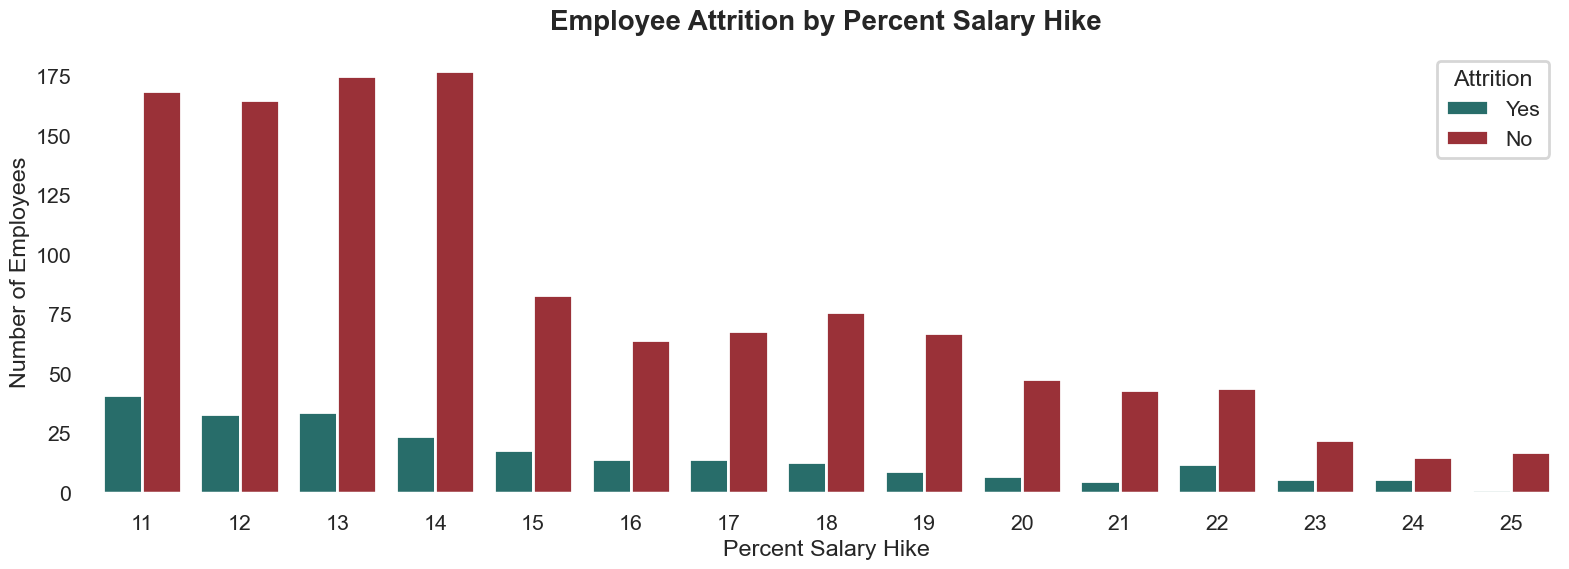

In [21]:
plt.figure(figsize=(16,6))
sns.countplot(x="PercentSalaryHike", hue="Attrition", data=df, palette=["#1d7874","#AC1F29"])
plt.title("Employee Attrition by Percent Salary Hike", fontsize=20, fontweight="bold", pad=15)
plt.xlabel("Percent Salary Hike")
plt.ylabel("Number of Employees")
plt.tight_layout()
plt.show()


- Most employees receive a salary hike between 11% and 15%.

- Employees with lower salary hikes exhibit higher attrition.

- As salary hike percentage increases, attrition visibly decreases — confirming that pay raises improve retention.

---
**Performance Rating & Attrition Insight**

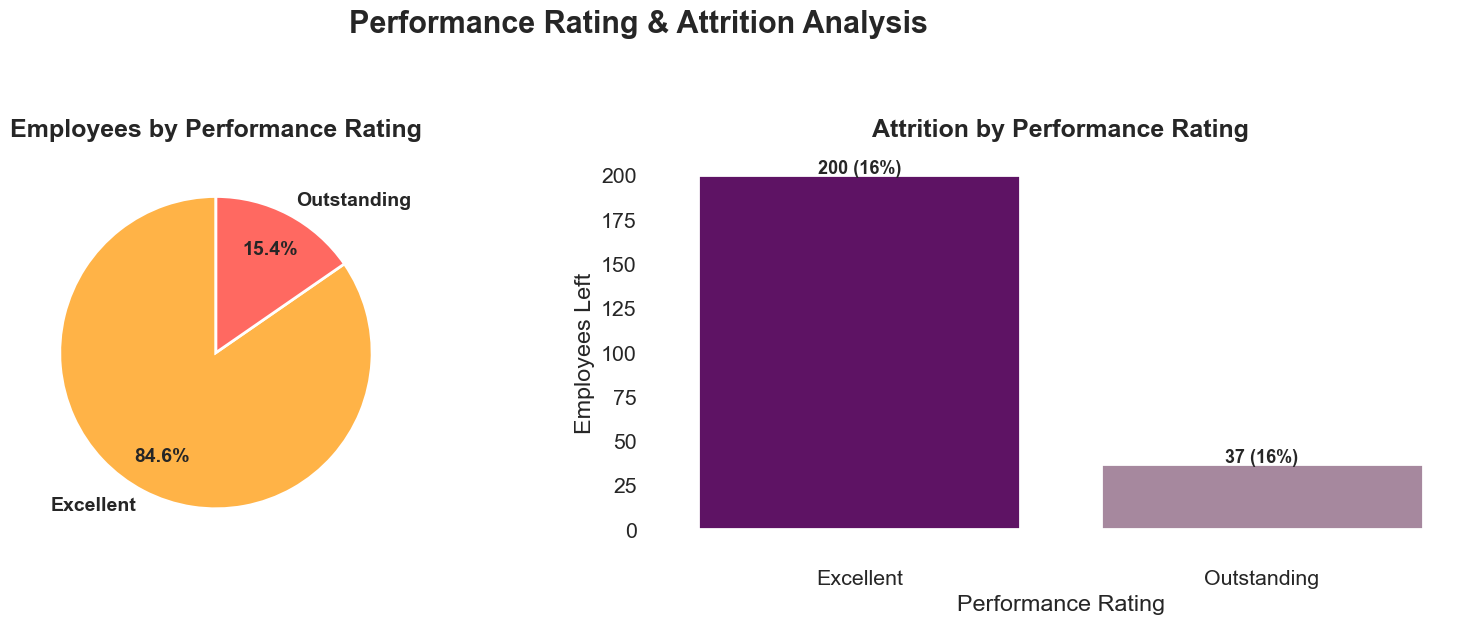

In [22]:
# Prepare data
total_performance = df["PerformanceRating"].value_counts()
left_performance = df[df["Attrition"]=="Yes"]["PerformanceRating"].value_counts()
performance_attrition_rate = np.floor((left_performance / total_performance) * 100).values

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(17, 6))
fig.suptitle("Performance Rating & Attrition Analysis", fontsize=22, fontweight="bold", y=1.05)

# Pie Chart
axes[0].pie(total_performance.values,
            labels=total_performance.index,
            autopct="%.1f%%",
            startangle=90,
            pctdistance=0.75,
            colors=["#FFB347","#FF6961"],
            textprops={"fontsize":14, "fontweight":"bold"})
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig.gca().add_artist(centre_circle)
axes[0].set_title("Employees by Performance Rating", fontsize=18, fontweight="bold", pad=15)

# Bar Plot
sns.barplot(x=left_performance.index, y=left_performance.values, palette=["#6A0572","#AB83A1"], ax=axes[1])
axes[1].set_title("Attrition by Performance Rating", fontsize=18, fontweight="bold", pad=15)
axes[1].set_xlabel("Performance Rating")
axes[1].set_ylabel("Employees Left")
for idx, val in enumerate(left_performance.values):
    axes[1].text(idx, val + 1, f"{val} ({int(performance_attrition_rate[idx])}%)", ha='center', fontsize=13, fontweight="bold")

plt.tight_layout()
plt.show()


- Most employees are rated as Excellent.

- Both rating categories show a similar attrition rate.

- This feature doesn't offer strong predictive value for attrition—performance isn't a clear driver here.

---
**Relationship Satisfaction & Attrition Insight**

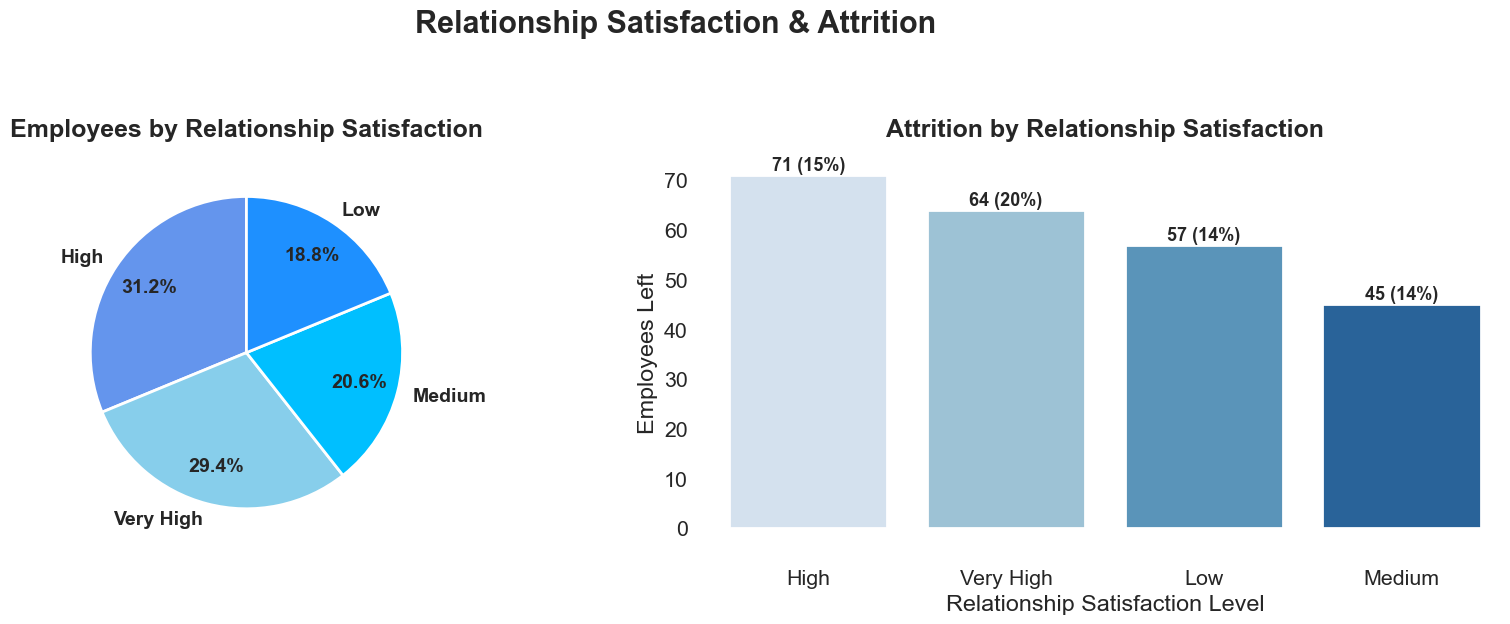

In [23]:
# Prepare data
total_relationship = df["RelationshipSatisfaction"].value_counts()
left_relationship = df[df["Attrition"]=="Yes"]["RelationshipSatisfaction"].value_counts()
relationship_attrition_rate = np.floor((left_relationship / total_relationship) * 100).values

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(17, 6))
fig.suptitle("Relationship Satisfaction & Attrition", fontsize=22, fontweight="bold", y=1.05)

# Pie Chart
axes[0].pie(total_relationship.values,
            labels=total_relationship.index,
            autopct="%.1f%%",
            startangle=90,
            pctdistance=0.75,
            colors=['#6495ED', '#87CEEB', '#00BFFF', '#1E90FF'],
            textprops={"fontsize":14, "fontweight":"bold"})
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig.gca().add_artist(centre_circle)
axes[0].set_title("Employees by Relationship Satisfaction", fontsize=18, fontweight="bold", pad=15)

# Bar Plot
sns.barplot(x=left_relationship.index, y=left_relationship.values, palette=sns.color_palette("Blues", 4), ax=axes[1])
axes[1].set_title("Attrition by Relationship Satisfaction", fontsize=18, fontweight="bold", pad=15)
axes[1].set_xlabel("Relationship Satisfaction Level")
axes[1].set_ylabel("Employees Left")
for idx, val in enumerate(left_relationship.values):
    axes[1].text(idx, val + 1, f"{val} ({int(relationship_attrition_rate[idx])}%)", ha='center', fontsize=13, fontweight="bold")

plt.tight_layout()
plt.show()


- Majority report High or Very High satisfaction.

- Despite this, attrition remains high across all levels.

- Suggests relationship satisfaction alone isn’t enough to retain employees—other factors dominate.

---
**Work-Life Balance & Attrition Insight**

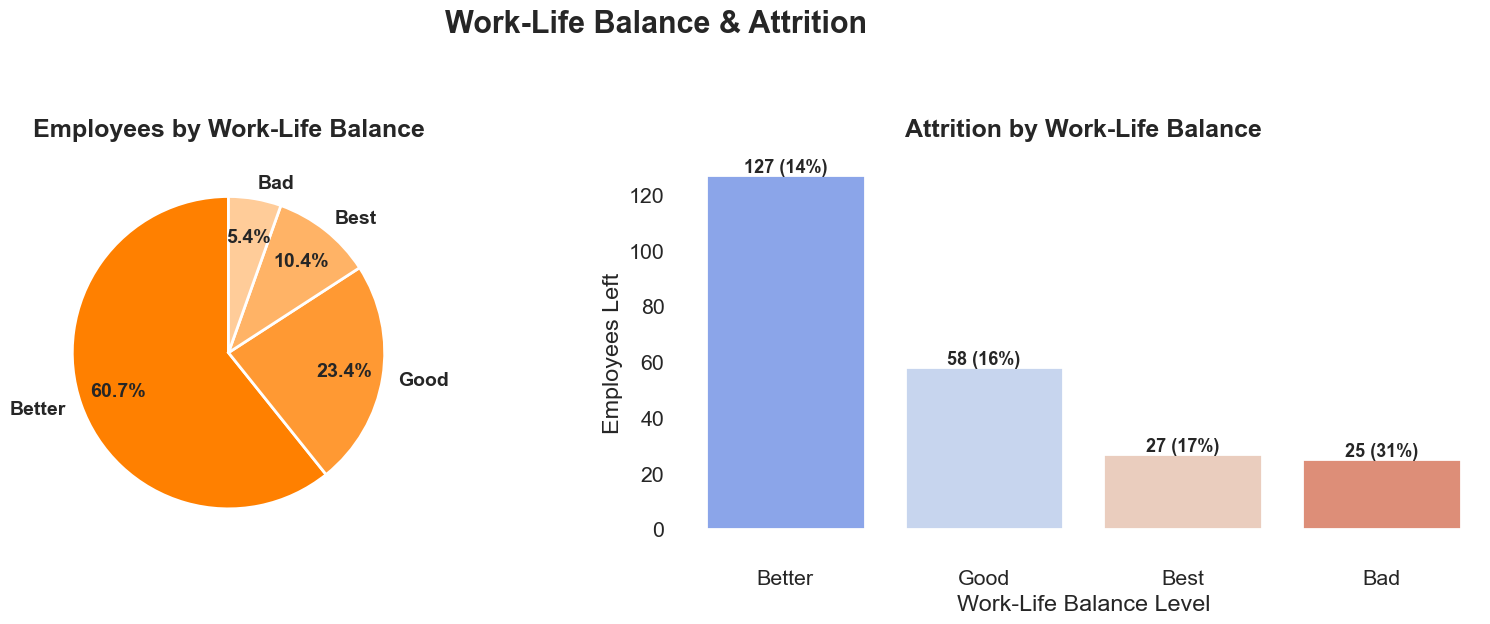

In [24]:
# Prepare data
total_wlb = df["WorkLifeBalance"].value_counts()
left_wlb = df[df["Attrition"]=="Yes"]["WorkLifeBalance"].value_counts()
wlb_attrition_rate = np.floor((left_wlb / total_wlb) * 100).values

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(17, 6))
fig.suptitle("Work-Life Balance & Attrition", fontsize=22, fontweight="bold", y=1.05)

# Pie Chart
axes[0].pie(total_wlb.values,
            labels=total_wlb.index,
            autopct="%.1f%%",
            startangle=90,
            pctdistance=0.75,
            colors=['#FF8000', '#FF9933', '#FFB366', '#FFCC99'],
            textprops={"fontsize":14, "fontweight":"bold"})
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig.gca().add_artist(centre_circle)
axes[0].set_title("Employees by Work-Life Balance", fontsize=18, fontweight="bold", pad=15)

# Bar Plot
sns.barplot(x=left_wlb.index, y=left_wlb.values, palette=sns.color_palette("coolwarm", 4), ax=axes[1])
axes[1].set_title("Attrition by Work-Life Balance", fontsize=18, fontweight="bold", pad=15)
axes[1].set_xlabel("Work-Life Balance Level")
axes[1].set_ylabel("Employees Left")
for idx, val in enumerate(left_wlb.values):
    axes[1].text(idx, val + 1, f"{val} ({int(wlb_attrition_rate[idx])}%)", ha='center', fontsize=13, fontweight="bold")

plt.tight_layout()
plt.show()


- Majority of employees enjoy a "Better" work-life balance.

- However, those with "Bad" balance show a very high attrition rate.

- Even in higher balance categories, attrition isn't negligible—this is a key area for HR focus.

---
**Total Working Experience & Attrition Insight**

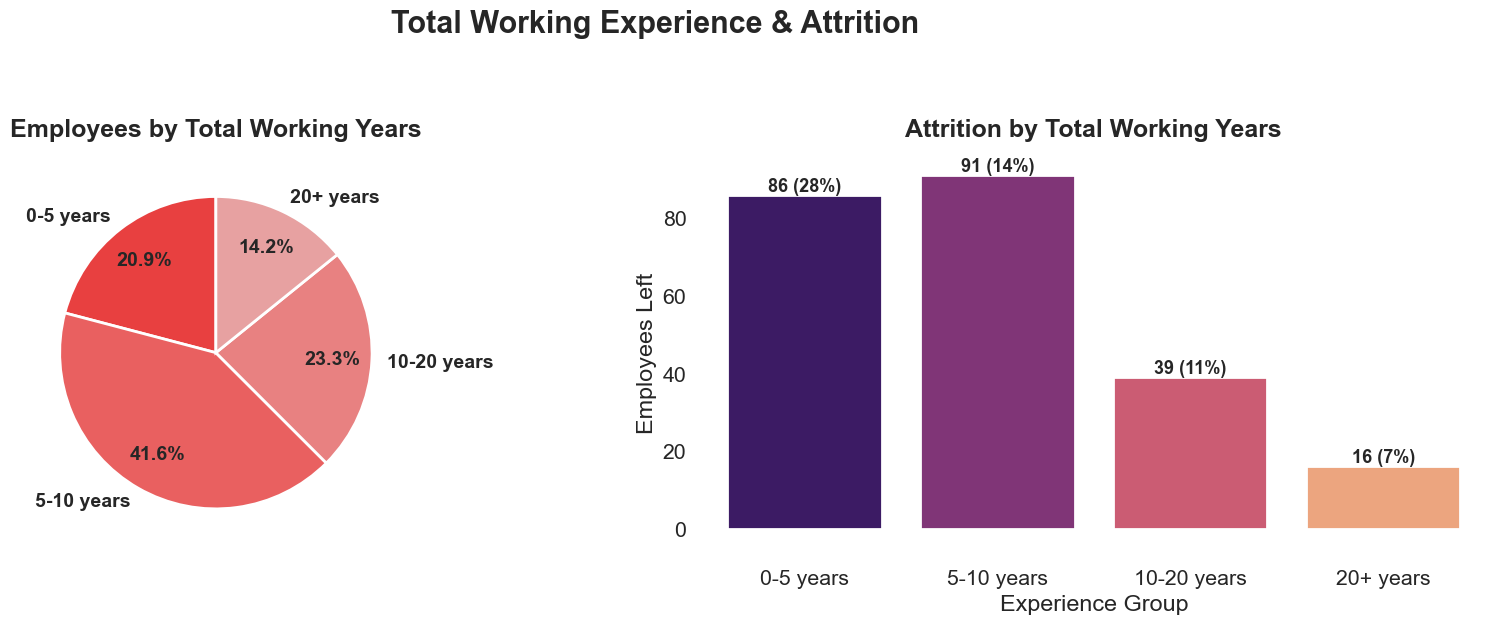

In [25]:
# Define bins and labels
bins = [0, 5, 10, 20, 50]
labels = ['0-5 years', '5-10 years', '10-20 years', "20+ years"]
df["TotalWorkingYearsGroup"] = pd.cut(df['TotalWorkingYears'], bins=bins, labels=labels)

# Prepare data
total_work_exp = df["TotalWorkingYearsGroup"].value_counts().sort_index()
left_work_exp = df[df["Attrition"]=="Yes"]["TotalWorkingYearsGroup"].value_counts().sort_index()
exp_attrition_rate = np.floor((left_work_exp / total_work_exp) * 100).values

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(17, 6))
fig.suptitle("Total Working Experience & Attrition", fontsize=22, fontweight="bold", y=1.05)

# Pie Chart
axes[0].pie(total_work_exp.values,
            labels=total_work_exp.index,
            autopct="%.1f%%",
            startangle=90,
            pctdistance=0.75,
            colors=['#E84040', '#E96060', '#E88181', '#E7A1A1'],
            textprops={"fontsize":14, "fontweight":"bold"})
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig.gca().add_artist(centre_circle)
axes[0].set_title("Employees by Total Working Years", fontsize=18, fontweight="bold", pad=15)

# Bar Plot
sns.barplot(x=left_work_exp.index, y=left_work_exp.values, palette=sns.color_palette("magma", 4), ax=axes[1])
axes[1].set_title("Attrition by Total Working Years", fontsize=18, fontweight="bold", pad=15)
axes[1].set_xlabel("Experience Group")
axes[1].set_ylabel("Employees Left")
for idx, val in enumerate(left_work_exp.values):
    axes[1].text(idx, val + 1, f"{val} ({int(exp_attrition_rate[idx])}%)", ha='center', fontsize=13, fontweight="bold")

plt.tight_layout()
plt.show()


- Most employees have 5–10 years of experience.

- Highest attrition rates are among employees with less than 10 years of experience.

- More experienced professionals (10+ years) are more likely to stay—experience brings stability.

---
**Years at Company & Attrition Insight**

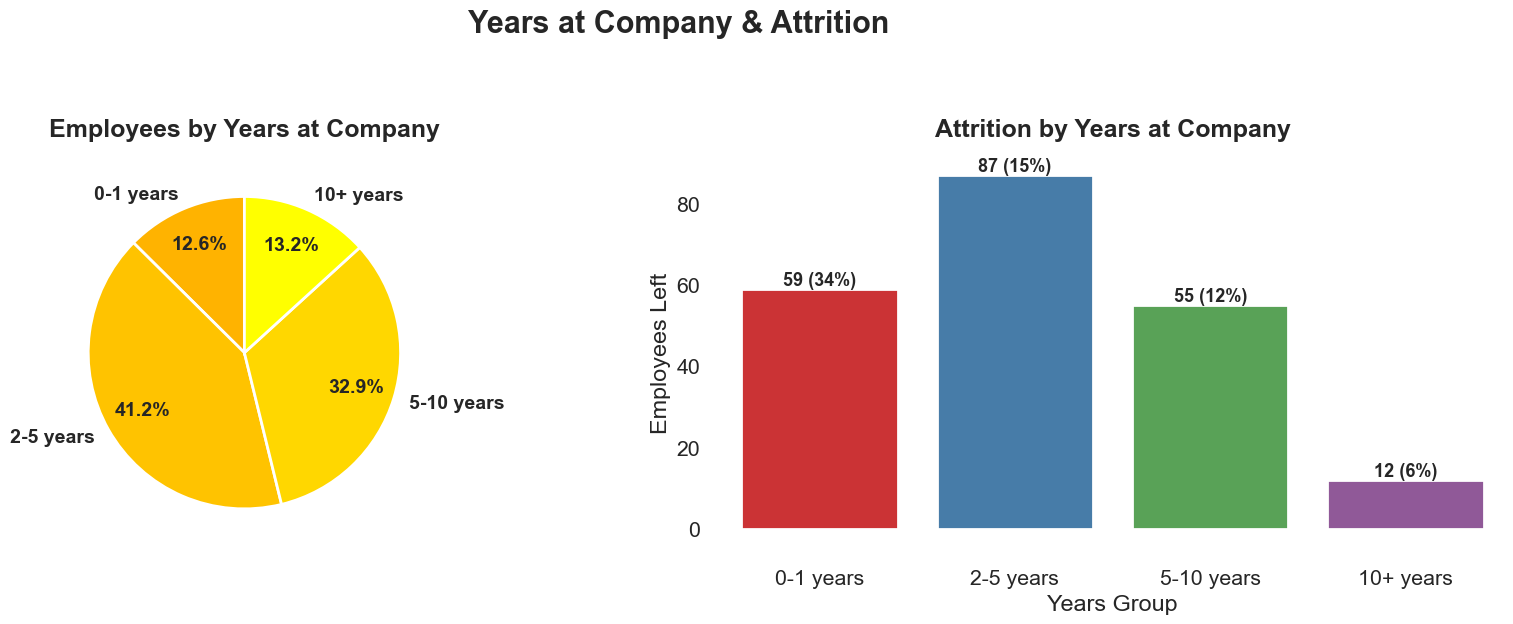

In [26]:
# Define bins and labels
bins = [0, 1, 5, 10, 20]
labels = ['0-1 years', '2-5 years', '5-10 years', "10+ years"]
df["YearsAtCompanyGroup"] = pd.cut(df['YearsAtCompany'], bins=bins, labels=labels)

# Prepare data
total_years_company = df["YearsAtCompanyGroup"].value_counts().sort_index()
left_years_company = df[df["Attrition"]=="Yes"]["YearsAtCompanyGroup"].value_counts().sort_index()
company_attrition_rate = np.floor((left_years_company / total_years_company) * 100).values

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(17, 6))
fig.suptitle("Years at Company & Attrition", fontsize=22, fontweight="bold", y=1.05)

# Pie Chart
axes[0].pie(total_years_company.values,
            labels=total_years_company.index,
            autopct="%.1f%%",
            startangle=90,
            pctdistance=0.75,
            colors=['#FFB300', '#FFC300', '#FFD700', '#FFFF00'],
            textprops={"fontsize":14, "fontweight":"bold"})
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig.gca().add_artist(centre_circle)
axes[0].set_title("Employees by Years at Company", fontsize=18, fontweight="bold", pad=15)

# Bar Plot
sns.barplot(x=left_years_company.index, y=left_years_company.values, palette=sns.color_palette("Set1", 4), ax=axes[1])
axes[1].set_title("Attrition by Years at Company", fontsize=18, fontweight="bold", pad=15)
axes[1].set_xlabel("Years Group")
axes[1].set_ylabel("Employees Left")
for idx, val in enumerate(left_years_company.values):
    axes[1].text(idx, val + 1, f"{val} ({int(company_attrition_rate[idx])}%)", ha='center', fontsize=13, fontweight="bold")

plt.tight_layout()
plt.show()


- Most employees have been with the company 2–10 years.

- The highest attrition rate is among those in the 2–5 year range.

- Employees with 10+ years are significantly more loyal—this group has the lowest attrition.

---
**Years in Current Role & Attrition Insight**

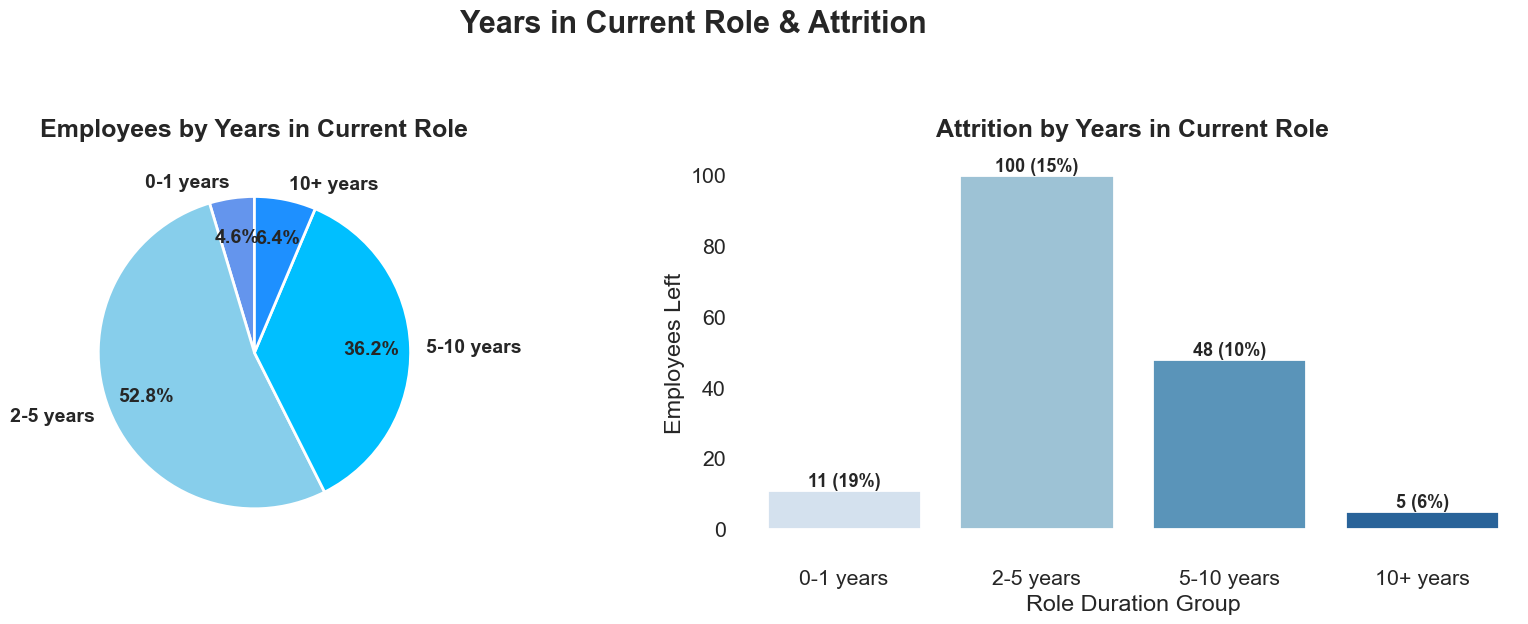

In [27]:
# Define bins and labels
bins = [0, 1, 5, 10, 20]
labels = ['0-1 years', '2-5 years', '5-10 years', "10+ years"]
df["YearsInCurrentRoleGroup"] = pd.cut(df['YearsInCurrentRole'], bins=bins, labels=labels)

# Prepare data
total_years_role = df["YearsInCurrentRoleGroup"].value_counts().sort_index()
left_years_role = df[df["Attrition"]=="Yes"]["YearsInCurrentRoleGroup"].value_counts().sort_index()
role_attrition_rate = np.floor((left_years_role / total_years_role) * 100).values

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(17, 6))
fig.suptitle("Years in Current Role & Attrition", fontsize=22, fontweight="bold", y=1.05)

# Pie Chart
axes[0].pie(total_years_role.values,
            labels=total_years_role.index,
            autopct="%.1f%%",
            startangle=90,
            pctdistance=0.75,
            colors=['#6495ED', '#87CEEB', '#00BFFF', '#1E90FF'],
            textprops={"fontsize":14, "fontweight":"bold"})
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig.gca().add_artist(centre_circle)
axes[0].set_title("Employees by Years in Current Role", fontsize=18, fontweight="bold", pad=15)

# Bar Plot
sns.barplot(x=left_years_role.index, y=left_years_role.values, palette=sns.color_palette("Blues", 4), ax=axes[1])
axes[1].set_title("Attrition by Years in Current Role", fontsize=18, fontweight="bold", pad=15)
axes[1].set_xlabel("Role Duration Group")
axes[1].set_ylabel("Employees Left")
for idx, val in enumerate(left_years_role.values):
    axes[1].text(idx, val + 1, f"{val} ({int(role_attrition_rate[idx])}%)", ha='center', fontsize=13, fontweight="bold")

plt.tight_layout()
plt.show()


- Most employees have been in their current role for 2–10 years.

- Attrition is highest among those with 2–5 years in the same role.

- Those who have been in the same role for 10+ years show minimal attrition.

---
**Years Since Last Promotion & Attrition Insight**

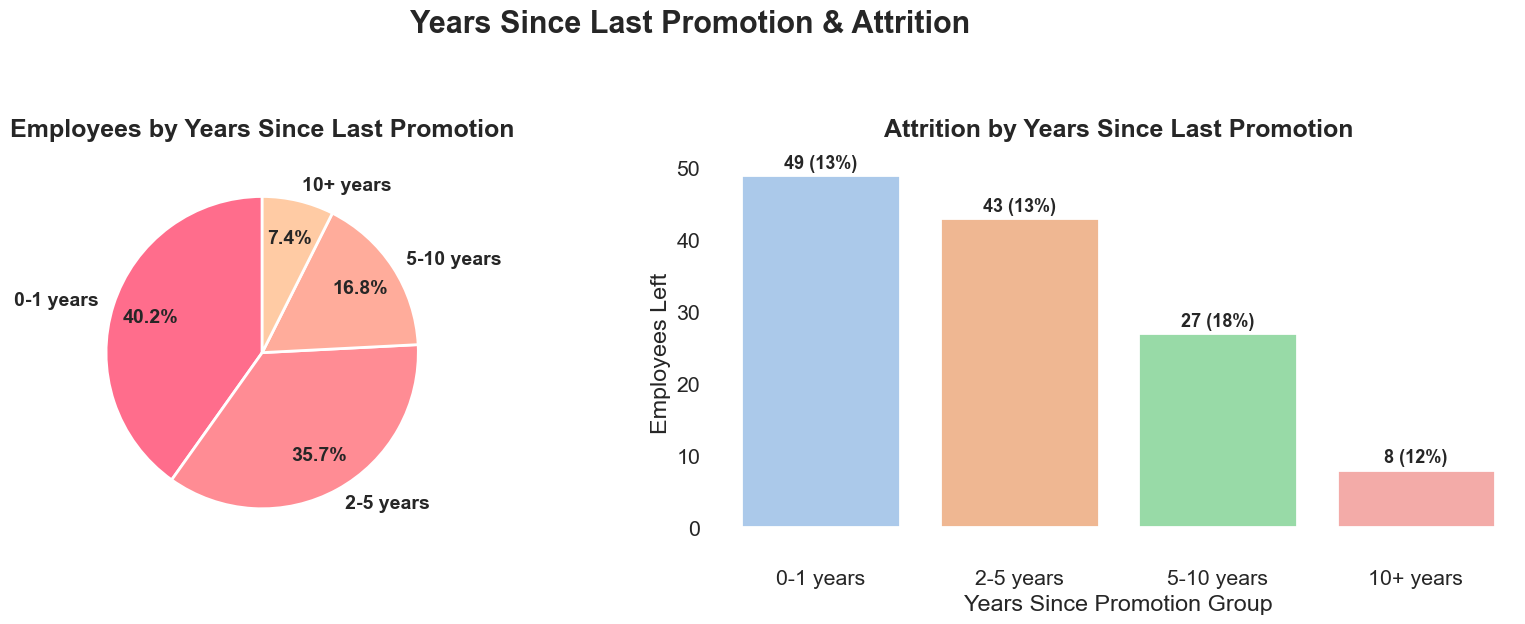

In [28]:
# Define bins and labels
bins = [0, 1, 5, 10, 20]
labels = ['0-1 years', '2-5 years', '5-10 years', "10+ years"]
df["YearsSinceLastPromotionGroup"] = pd.cut(df['YearsSinceLastPromotion'], bins=bins, labels=labels)

# Prepare data
total_promotion = df["YearsSinceLastPromotionGroup"].value_counts().sort_index()
left_promotion = df[df["Attrition"]=="Yes"]["YearsSinceLastPromotionGroup"].value_counts().sort_index()
promotion_attrition_rate = np.floor((left_promotion / total_promotion) * 100).values

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(17, 6))
fig.suptitle("Years Since Last Promotion & Attrition", fontsize=22, fontweight="bold", y=1.05)

# Pie Chart
axes[0].pie(total_promotion.values,
            labels=total_promotion.index,
            autopct="%.1f%%",
            startangle=90,
            pctdistance=0.75,
            colors=['#FF6D8C', '#FF8C94', '#FFAC9B', '#FFCBA4'],
            textprops={"fontsize":14, "fontweight":"bold"})
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig.gca().add_artist(centre_circle)
axes[0].set_title("Employees by Years Since Last Promotion", fontsize=18, fontweight="bold", pad=15)

# Bar Plot
sns.barplot(x=left_promotion.index, y=left_promotion.values, palette=sns.color_palette("pastel"), ax=axes[1])
axes[1].set_title("Attrition by Years Since Last Promotion", fontsize=18, fontweight="bold", pad=15)
axes[1].set_xlabel("Years Since Promotion Group")
axes[1].set_ylabel("Employees Left")
for idx, val in enumerate(left_promotion.values):
    axes[1].text(idx, val + 1, f"{val} ({int(promotion_attrition_rate[idx])}%)", ha='center', fontsize=13, fontweight="bold")

plt.tight_layout()
plt.show()


- Majority haven’t been promoted in 2–5 years.

- Employees who haven’t been promoted for 5+ years show a very high attrition rate.

- Lack of career progression is clearly pushing employees to leave.

---
**Years With Current Manager & Attrition Insight**

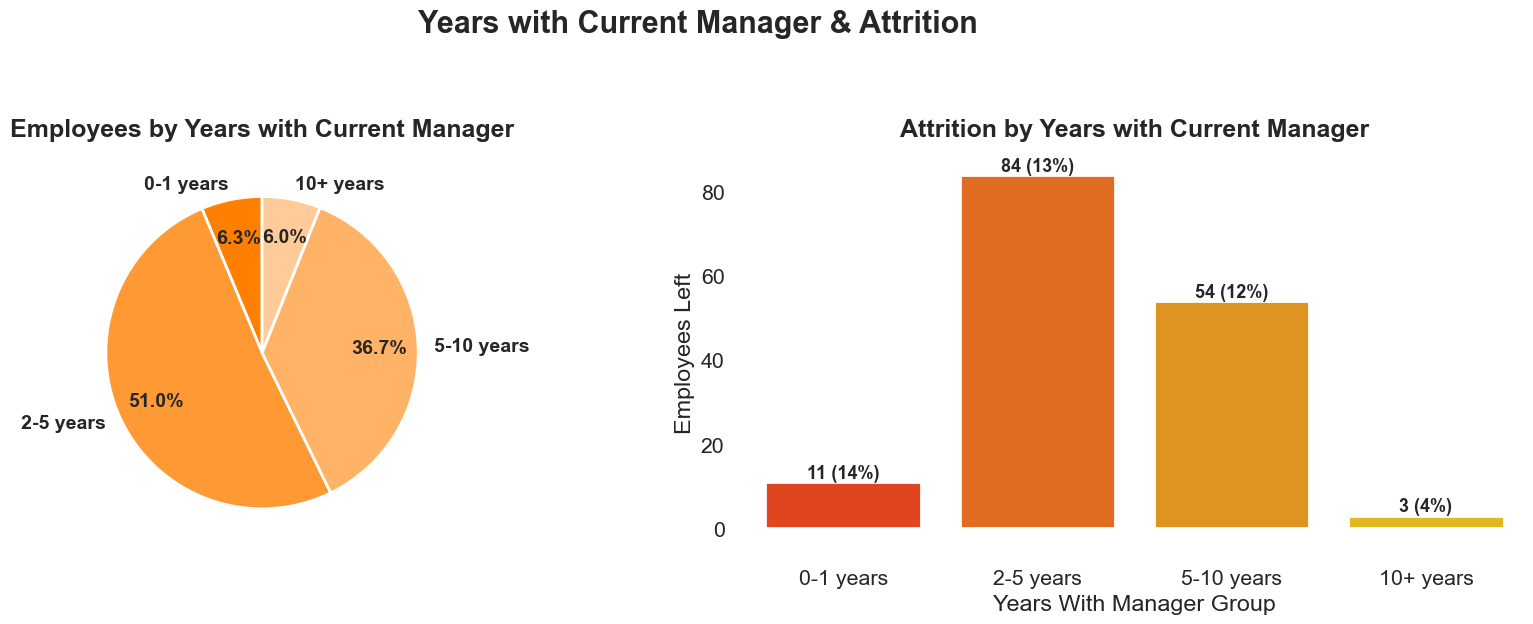

In [29]:
# Define bins and labels
bins = [0, 1, 5, 10, 20]
labels = ['0-1 years', '2-5 years', '5-10 years', "10+ years"]
df["YearsWithCurrManagerGroup"] = pd.cut(df['YearsWithCurrManager'], bins=bins, labels=labels)

# Prepare data
total_manager = df["YearsWithCurrManagerGroup"].value_counts().sort_index()
left_manager = df[df["Attrition"]=="Yes"]["YearsWithCurrManagerGroup"].value_counts().sort_index()
manager_attrition_rate = np.floor((left_manager / total_manager) * 100).values

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(17, 6))
fig.suptitle("Years with Current Manager & Attrition", fontsize=22, fontweight="bold", y=1.05)

# Pie Chart
axes[0].pie(total_manager.values,
            labels=total_manager.index,
            autopct="%.1f%%",
            startangle=90,
            pctdistance=0.75,
            colors=['#FF8000', '#FF9933', '#FFB366', '#FFCC99'],
            textprops={"fontsize":14, "fontweight":"bold"})
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig.gca().add_artist(centre_circle)
axes[0].set_title("Employees by Years with Current Manager", fontsize=18, fontweight="bold", pad=15)

# Bar Plot
sns.barplot(x=left_manager.index, y=left_manager.values, palette=sns.color_palette("autumn", 4), ax=axes[1])
axes[1].set_title("Attrition by Years with Current Manager", fontsize=18, fontweight="bold", pad=15)
axes[1].set_xlabel("Years With Manager Group")
axes[1].set_ylabel("Employees Left")
for idx, val in enumerate(left_manager.values):
    axes[1].text(idx, val + 1, f"{val} ({int(manager_attrition_rate[idx])}%)", ha='center', fontsize=13, fontweight="bold")

plt.tight_layout()
plt.show()


- Most employees have worked 2–10 years with the same manager.

- Highest attrition occurs in the 2–5 year range.

- Employees managed by the same person for 10+ years tend to stay—indicating that stable leadership might foster loyalty.

---

# Statistical Analysis (SA)

![Statistical Analytics](../Images/Statistical_Analytics.png)

---

**Statistical analysis serves as the backbone of HR analytics, empowering organizations to transform raw workforce data into actionable insights. By applying rigorous statistical methods, HR teams can move beyond intuition and base their decisions on quantifiable evidence. This approach not only sharpens talent management strategies but also uncovers hidden trends in employee behavior, performance, and retention.**

---

# <span style="background-color:#393be5; color:white; padding:10px;border-radius:15px; text-align:center;">OUTLINE</span>

- Importing Various Modules
- Loading Dataset
- Statistical Analysis
    - Perform ANOVA Test.
    - Visualizing the F_Score of ANOVA Test of Each Numerical features.
    - Clean table comparing.
    - Performing Chi-Square Test.
    - Visualizing the Chi-Square Statistic Values of Each Categorical Features.
    - Compairing Chi2_Statistic and P_value of Chi_Square Test.

---
# <span style="background-color:#258683; color:white; padding:10px;border-radius:15px; text-align:center;">IMPORTING MODULES</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings('ignore')

# Set seaborn styling
sns.set(style="white", font_scale=1.5)
sns.set(rc={"axes.facecolor":"#FFFAF0","figure.facecolor":"#FFFAF0"})
sns.set_context("poster", font_scale=.7)

---
# <span style="background-color:#258683; color:white; padding:10px;border-radius:15px; text-align:center;">DATASET</span>

In [2]:
employee_data = '../CSV/employee_attrition_cleaned.csv'
df = pd.read_csv(employee_data)

# Display the first 5 rows
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome      Education EducationField EnvironmentSatisfaction  \
0                 1        College  Life Sciences                  Medium   
1                 8  Below College  Life Sciences                    High   
2                 2        College          Other               Very High   
3                 3         Master  Life Sciences               Very High   
4                 2  Below College        Medical                     Low   

   Gender  ...  PerformanceRating RelationshipSatisfaction  StockOptionLevel  \
0  Female  ...          Excellent                      Low                 0   
1    Male  ...        Outstanding                Very High                 1   
2    Male  ...          Excellent                   Medium                 0   
3  Female  ...          Excellent                     High                 0   
4    Male  ...          Excellent                Very High                 1   

  TotalWorkingYears TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                     0             Bad               6   
1                10                     3          Better              10   
2                 7                     3          Better               0   
3                 8                     3          Better               8   
4                 6                     3          Better               2   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                   4                        0                    5  
1                   7                        1                    7  
2                   0                        0                    0  
3                   7                        3                    0  
4                   2                        2                    2  

[5 rows x 31 columns]

In [3]:
df.tail()

Age Attrition     BusinessTravel  DailyRate              Department  \
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome      Education EducationField EnvironmentSatisfaction  \
1465                23        College        Medical                    High   
1466                 6  Below College        Medical               Very High   
1467                 4       Bachelor  Life Sciences                  Medium   
1468                 2       Bachelor        Medical               Very High   
1469                 8       Bachelor        Medical                  Medium   

     Gender  ...  PerformanceRating RelationshipSatisfaction  \
1465   Male  ...          Excellent                     High   
1466   Male  ...          Excellent                      Low   
1467   Male  ...        Outstanding                   Medium   
1468   Male  ...          Excellent                Very High   
1469   Male  ...          Excellent                      Low   

      StockOptionLevel TotalWorkingYears TrainingTimesLastYear  \
1465                 1                17                     3   
1466                 1                 9                     5   
1467                 1                 6                     0   
1468                 0                17                     3   
1469                 0                 6                     3   

     WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
1465          Better               5                   2   
1466          Better               7                   7   
1467          Better               6                   2   
1468            Good               9                   6   
1469            Best               4                   3   

      YearsSinceLastPromotion YearsWithCurrManager  
1465                        0                    3  
1466                        1                    7  
1467                        0                    3  
1468                        0                    8  
1469                        1                    2  

[5 rows x 31 columns]

In [4]:
rows, columns = df.shape
rows, columns

(1470, 31)

**Perform ANOVA Test**

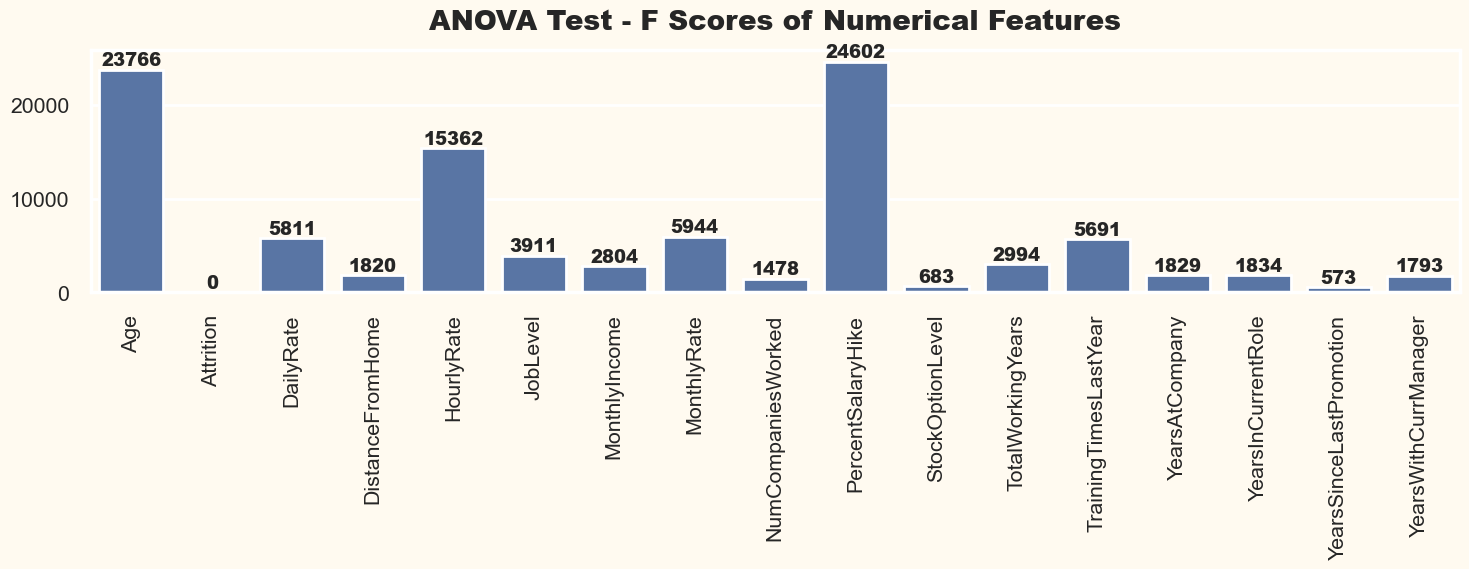

In [5]:
# Preprocess Attrition column
df["Attrition"] = df["Attrition"].replace({"No": 0, "Yes": 1})

# Identify numerical columns
num_cols = df.select_dtypes(include=np.number).columns

# Perform ANOVA Test
f_scores = {}
p_values = {}

for column in num_cols:
    f_stat, p_val = stats.f_oneway(df[column], df["Attrition"])
    f_scores[column] = f_stat
    p_values[column] = p_val

# Visualize F-Scores
plt.figure(figsize=(15, 6))
sns.barplot(x=list(f_scores.keys()), y=list(f_scores.values()))
plt.title("ANOVA Test - F Scores of Numerical Features", fontweight="black", size=20, pad=15)
plt.xticks(rotation=90)
for i, val in enumerate(f_scores.values()):
    plt.text(i, val, int(val), ha='center', va='bottom', fontweight='black', fontsize=13)
plt.tight_layout()
plt.show()


***Next:***
**Let’s create a clean table comparing:**
- F_Score

- P_Value

**This will help identify which features are statistically significant (typically where p < 0.05).**

In [6]:
# Ensure Attrition is numeric for analysis
df["Attrition"] = df["Attrition"].replace({"No": 0, "Yes": 1})

# Identify numerical columns
num_cols = df.select_dtypes(include=np.number).columns

# Perform ANOVA Test
f_scores = {}
p_values = {}

for column in num_cols:
    f_stat, p_val = stats.f_oneway(df[column], df["Attrition"])
    f_scores[column] = f_stat
    p_values[column] = p_val

# Prepare DataFrame to compare F_Score and P_value
anova_results = pd.DataFrame({
    "Features": list(f_scores.keys()),
    "F_Score": list(f_scores.values()),
    "P_value": [format(p, '.20f') for p in p_values.values()]
})

# Display the ANOVA results DataFrame
anova_results.sort_values(by="F_Score", ascending=False, inplace=True)
anova_results.reset_index(drop=True, inplace=True)
anova_results

Features       F_Score                 P_value
0         PercentSalaryHike  2.460251e+04  0.00000000000000000000
1                       Age  2.376693e+04  0.00000000000000000000
2                HourlyRate  1.536212e+04  0.00000000000000000000
3               MonthlyRate  5.944089e+03  0.00000000000000000000
4                 DailyRate  5.811797e+03  0.00000000000000000000
5     TrainingTimesLastYear  5.691402e+03  0.00000000000000000000
6                  JobLevel  3.911332e+03  0.00000000000000000000
7         TotalWorkingYears  2.994906e+03  0.00000000000000000000
8             MonthlyIncome  2.804460e+03  0.00000000000000000000
9        YearsInCurrentRole  1.834262e+03  0.00000000000000000000
10           YearsAtCompany  1.829443e+03  0.00000000000000000000
11         DistanceFromHome  1.820615e+03  0.00000000000000000000
12     YearsWithCurrManager  1.793291e+03  0.00000000000000000000
13       NumCompaniesWorked  1.478189e+03  0.00000000000000000000
14         StockOptionLevel  6.830696e+02  0.00000000000000000000
15  YearsSinceLastPromotion  5.738964e+02  0.00000000000000000000
16                Attrition -1.469261e-30                     nan

- Since p-values = 0.000..., these features have a strong association with attrition.

- Features with lower F-Scores (e.g., StockOptionLevel, YearsSinceLastPromotion) are less impactful.

---
***Next:***
**Proceeding to the Chi-Square Test for categorical features.**

**I'll calculate:**

- Chi2 statistics,

- P-values,

- Visualize the Chi2 scores.

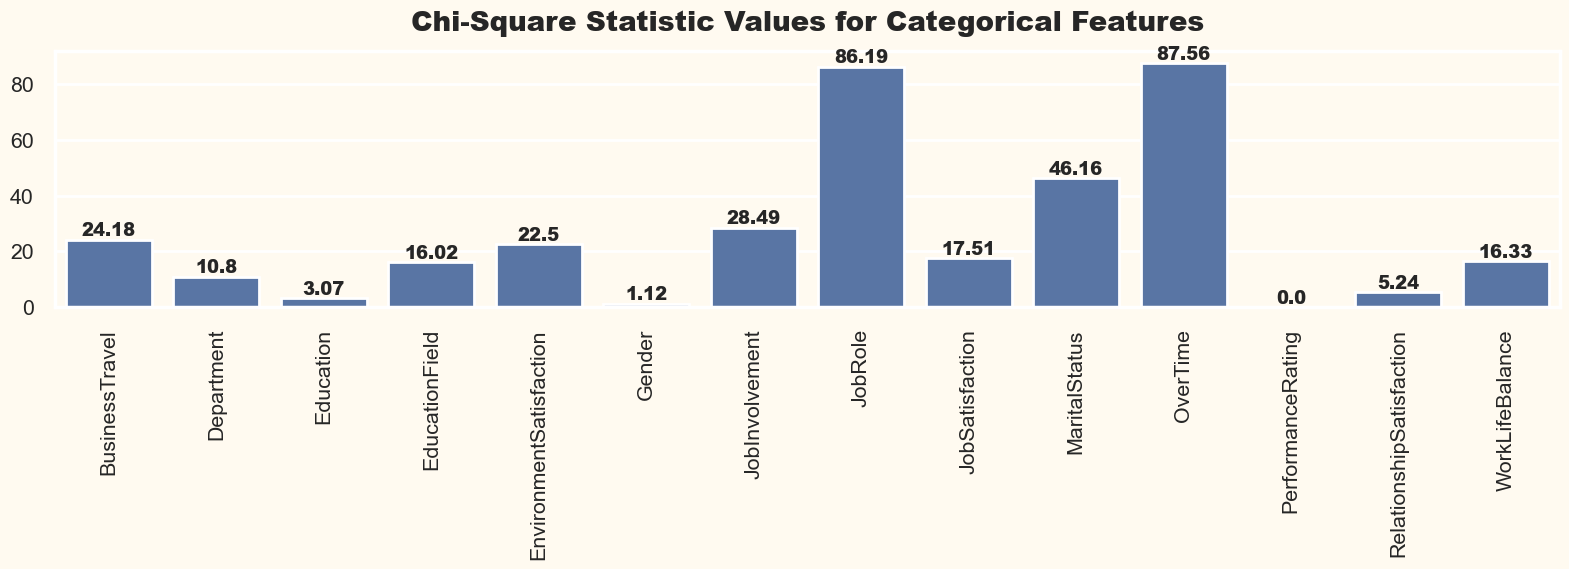

In [7]:
# Identify categorical columns (excluding Attrition)
cat_cols = df.select_dtypes(include='object').columns.tolist()
if 'Attrition' in cat_cols:
    cat_cols.remove('Attrition')

# Prepare dictionaries
chi2_statistic = {}
chi2_p_values = {}

# Perform Chi-Square Test for each categorical feature
for col in cat_cols:
    contingency_table = pd.crosstab(df[col], df["Attrition"])
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    chi2_statistic[col] = chi2_stat
    chi2_p_values[col] = p_val

# Visualization of Chi2 Statistics
plt.figure(figsize=(16,6))
sns.barplot(x=list(chi2_statistic.keys()), y=list(chi2_statistic.values()))
plt.xticks(rotation=90)
plt.title("Chi-Square Statistic Values for Categorical Features", fontweight="black", size=20, pad=15)
for idx, val in enumerate(chi2_statistic.values()):
    plt.text(idx, val, round(val, 2), ha='center', va='bottom', fontweight="black", fontsize=13)
plt.tight_layout()
plt.show()

- Features like OverTime, JobRole, Department, and MaritalStatus show high Chi-Square values, indicating a strong association with attrition.

- Features like Gender, PerformanceRating, and Education show low Chi-Square values, meaning they have less influence on attrition.

---
**Final Step:
Let’s tabulate the Chi2 Statistic and P-Values for detailed comparison.**

In [8]:
# Create DataFrame for Chi-Square results
chi2_results = pd.DataFrame({
    "Features": list(chi2_statistic.keys()),
    "Chi2_Statistic": list(chi2_statistic.values()),
    "P_value": [format(p, '.20f') for p in chi2_p_values.values()]
})

# Sort by Chi2 Statistic
chi2_results.sort_values(by="Chi2_Statistic", ascending=False, inplace=True)
chi2_results.reset_index(drop=True, inplace=True)

# Display the Chi-Square results
chi2_results


Features  Chi2_Statistic                 P_value
0                   OverTime       87.564294  0.00000000000000000001
1                    JobRole       86.190254  0.00000000000000275248
2              MaritalStatus       46.163677  0.00000000009455511060
3             JobInvolvement       28.492021  0.00000286318063671342
4             BusinessTravel       24.182414  0.00000560861447644993
5    EnvironmentSatisfaction       22.503881  0.00005123468906289433
6            JobSatisfaction       17.505077  0.00055630045103875563
7            WorkLifeBalance       16.325097  0.00097256988453488225
8             EducationField       16.024674  0.00677398013902521298
9                 Department       10.796007  0.00452560657447963373
10  RelationshipSatisfaction        5.241068  0.15497244371052626422
11                 Education        3.073961  0.54552533765659494414
12                    Gender        1.116967  0.29057244902890855265
13         PerformanceRating        0.000155  0.99007454659345761616

**Interpretation:**

**Features with p-value < 0.05 show a statistically significant relationship with attrition.**

- Features like:

  - OverTime, JobRole, MaritalStatus, JobInvolvement are key drivers of attrition.

- Features like:

  - Gender, PerformanceRating, Education have no significant impact.

---


**Now we have:**

- A clear view of which numerical and categorical features influence attrition.

- Data-backed insights to focus on impactful areas.

---

# Machine Learning (ML)

![Data Modeling](../Images/ml.png)

---

**Data modeling serves as the foundation of HR analytics when applying machine learning, transforming raw workforce data into predictive and prescriptive insights. By structuring data into meaningful relationships, ML algorithms can uncover hidden patterns, forecast trends, and generate actionable recommendations—enabling HR teams to move from reactive decision-making to proactive strategy.**

---

# <span style="background-color:#393be5; color:white; padding:10px;border-radius:15px; text-align:center;">OUTLINE</span>

1. **Import Libraries**  
   Load the necessary Python tools to work with data and perform analysis.

2. **Load the Data**  
   Open the dataset and get it ready for analysis.

3. **Diverse Model Application**  
   - Logistic Regression
   - Random Forest
   - Support Vector Machine
   - XGBoost
   - LightGBM
   - CatBoost
   - AdaBoost
4. **Visualization: Comparing Model Performance**
5. **Conclusion**

---
# <span style="background-color:#258683; color:white; padding:10px;border-radius:15px; text-align:center;">IMPORTING MODULES</span>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.cm import get_cmap
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (confusion_matrix, accuracy_score, classification_report,
                             roc_auc_score, precision_recall_curve, roc_curve)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

print("Libraries Loaded Successfully!")

Libraries Loaded Successfully!


---
# <span style="background-color:#258683; color:white; padding:10px;border-radius:15px; text-align:center;">DATASET</span>

In [2]:
employee_data = '../CSV/employee_attrition_cleaned.csv'
data = pd.read_csv(employee_data)

# Display the first 5 rows
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome      Education EducationField EnvironmentSatisfaction  \
0                 1        College  Life Sciences                  Medium   
1                 8  Below College  Life Sciences                    High   
2                 2        College          Other               Very High   
3                 3         Master  Life Sciences               Very High   
4                 2  Below College        Medical                     Low   

   Gender  ...  PerformanceRating RelationshipSatisfaction  StockOptionLevel  \
0  Female  ...          Excellent                      Low                 0   
1    Male  ...        Outstanding                Very High                 1   
2    Male  ...          Excellent                   Medium                 0   
3  Female  ...          Excellent                     High                 0   
4    Male  ...          Excellent                Very High                 1   

  TotalWorkingYears TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                     0             Bad               6   
1                10                     3          Better              10   
2                 7                     3          Better               0   
3                 8                     3          Better               8   
4                 6                     3          Better               2   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                   4                        0                    5  
1                   7                        1                    7  
2                   0                        0                    0  
3                   7                        3                    0  
4                   2                        2                    2  

[5 rows x 31 columns]

In [3]:
data.tail()

Age Attrition     BusinessTravel  DailyRate              Department  \
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome      Education EducationField EnvironmentSatisfaction  \
1465                23        College        Medical                    High   
1466                 6  Below College        Medical               Very High   
1467                 4       Bachelor  Life Sciences                  Medium   
1468                 2       Bachelor        Medical               Very High   
1469                 8       Bachelor        Medical                  Medium   

     Gender  ...  PerformanceRating RelationshipSatisfaction  \
1465   Male  ...          Excellent                     High   
1466   Male  ...          Excellent                      Low   
1467   Male  ...        Outstanding                   Medium   
1468   Male  ...          Excellent                Very High   
1469   Male  ...          Excellent                      Low   

      StockOptionLevel TotalWorkingYears TrainingTimesLastYear  \
1465                 1                17                     3   
1466                 1                 9                     5   
1467                 1                 6                     0   
1468                 0                17                     3   
1469                 0                 6                     3   

     WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
1465          Better               5                   2   
1466          Better               7                   7   
1467          Better               6                   2   
1468            Good               9                   6   
1469            Best               4                   3   

      YearsSinceLastPromotion YearsWithCurrManager  
1465                        0                    3  
1466                        1                    7  
1467                        0                    3  
1468                        0                    8  
1469                        1                    2  

[5 rows x 31 columns]

In [4]:
rows, columns = data.shape
rows, columns

(1470, 31)

---
# <span style="background-color:#258683; color:white; padding:10px;border-radius:15px; text-align:center;">LABEL ENCODING</span>

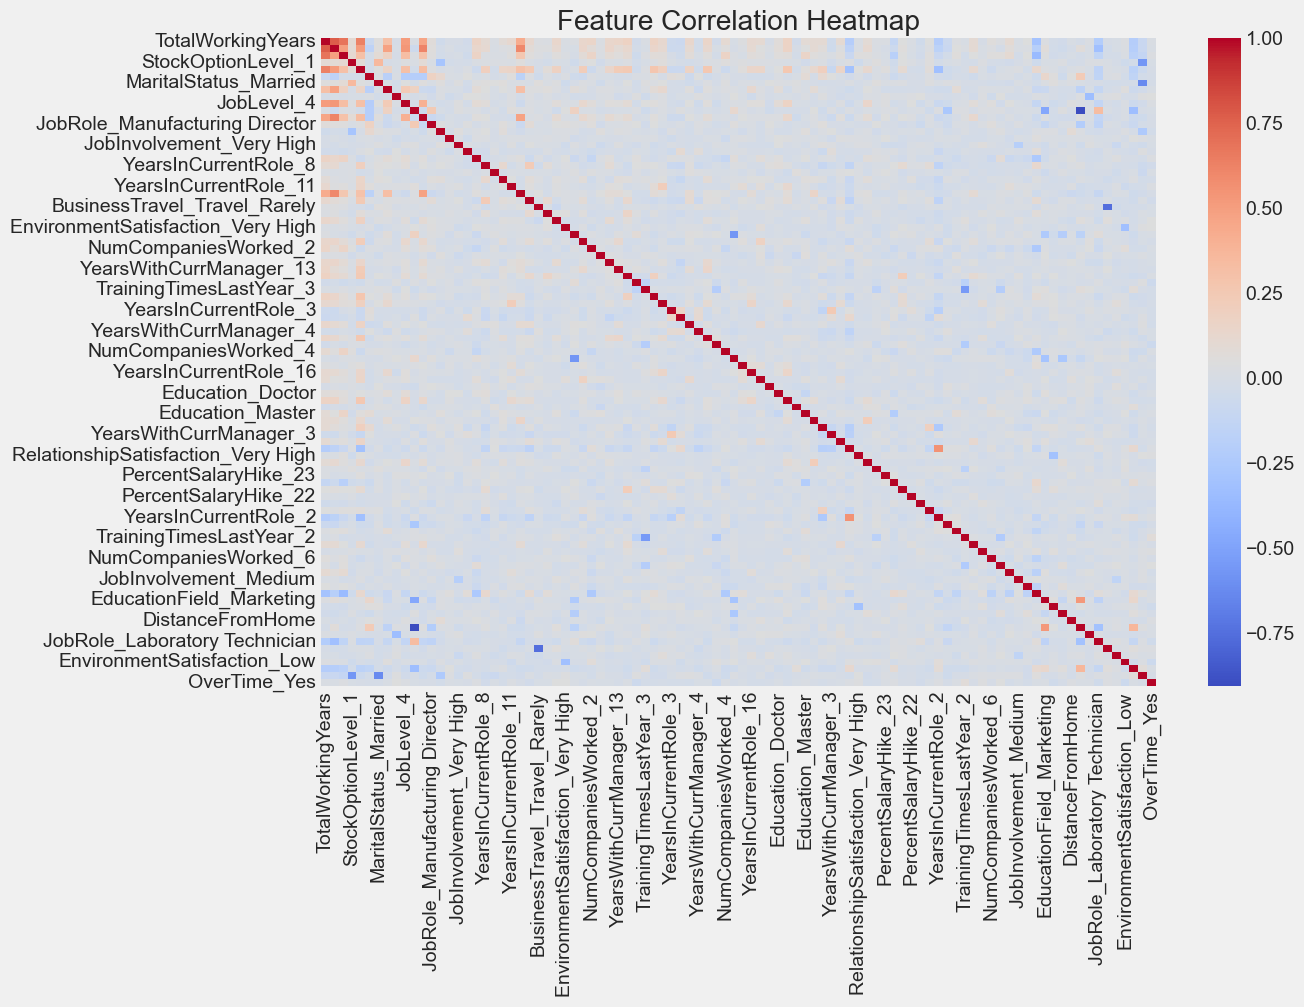

In [5]:
# Label Encoding 'Attrition'
label = LabelEncoder()
data["Attrition"] = label.fit_transform(data["Attrition"])

# One-Hot Encoding
dummy_col = [col for col in data.drop('Attrition', axis=1).columns if data[col].nunique() < 20]
data = pd.get_dummies(data, columns=dummy_col, drop_first=True, dtype='uint8')

# Remove duplicate features and rows
data = data.T.drop_duplicates().T
data.drop_duplicates(inplace=True)

# Feature Selection
feature_correlation = data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values()
model_col = feature_correlation[np.abs(feature_correlation) > 0.02].index

X = data[model_col]
y = data.Attrition

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scaling
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data[model_col].corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


---
# <span style="background-color:#258683; color:white; padding:10px;border-radius:15px; text-align:center;">DATA PROCESSING</span>

In [6]:
dummy_col = [column for column in data.drop('Attrition', axis=1).columns if data[column].nunique() < 20]
data = pd.get_dummies(data, columns=dummy_col, drop_first=True, dtype='uint8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Columns: 136 entries, Age to YearsWithCurrManager_17_1
dtypes: int64(9), uint8(127)
memory usage: 285.8 KB


In [7]:
print(data.shape)

# Remove duplicate Features
data = data.T.drop_duplicates()
data = data.T

# Remove Duplicate Rows
data.drop_duplicates(inplace=True)

print(data.shape)

(1470, 136)
(1470, 136)


<Axes: >

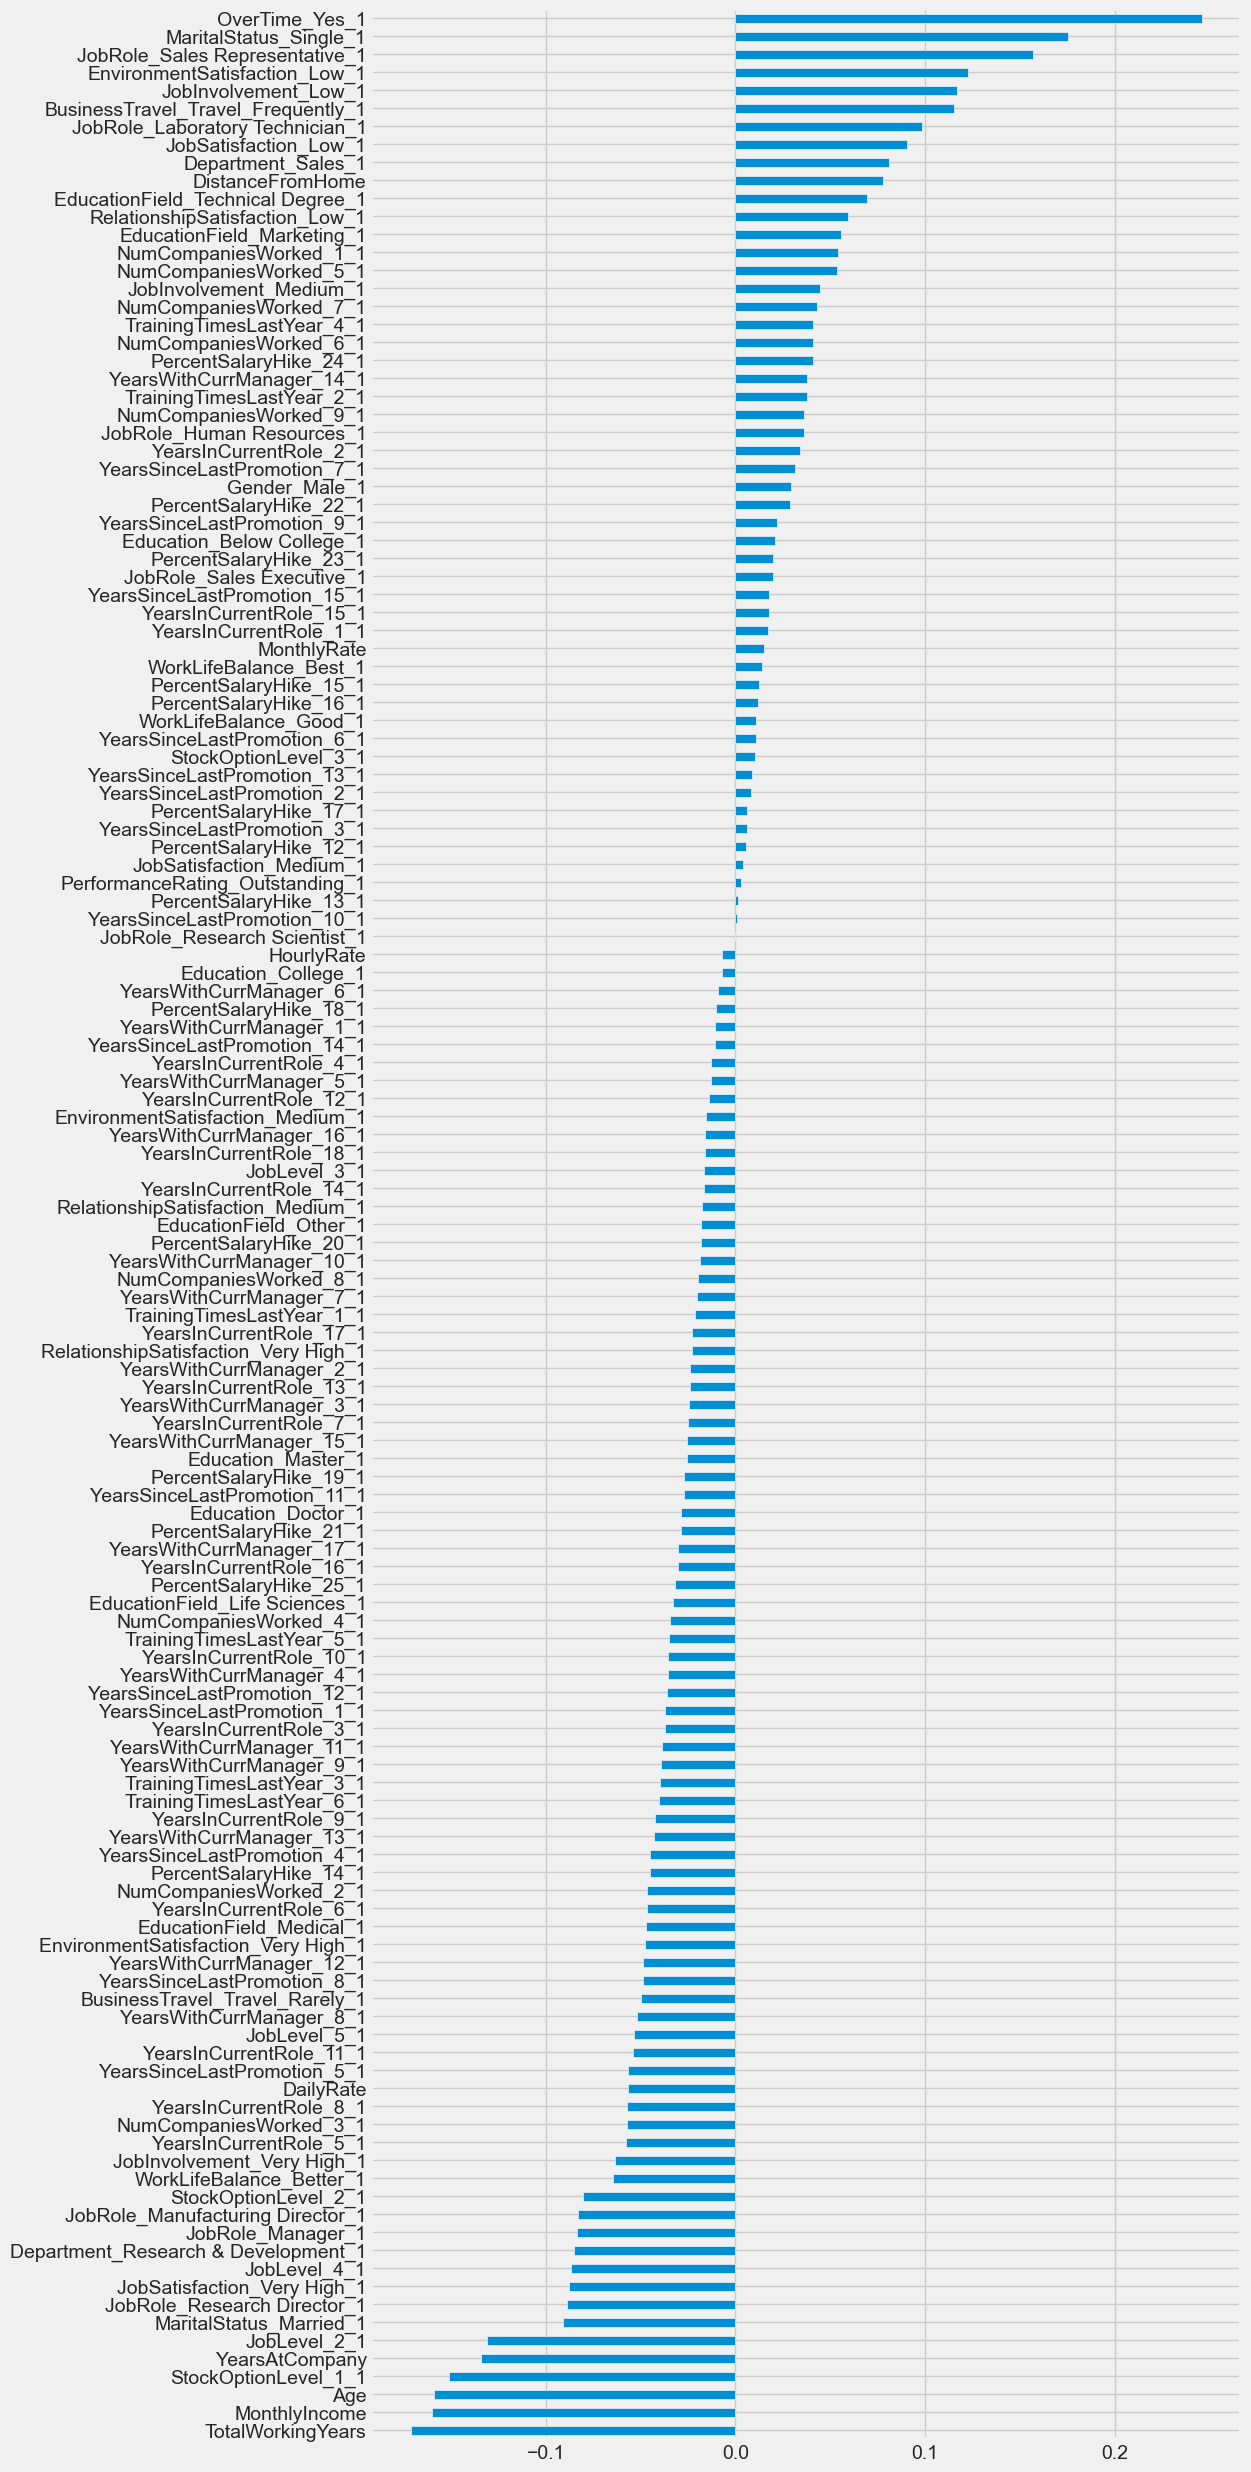

In [8]:
data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values().plot(kind='barh', figsize=(10, 30))

In [9]:
feature_correlation = data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values()
model_col = feature_correlation[np.abs(feature_correlation) > 0.02].index
len(model_col)

94

---
# <span style="background-color:#258683; color:white; padding:10px;border-radius:15px; text-align:center;">Train and Test Dataset</span>

In [10]:
# Define Features and Target
X = data.drop('Attrition', axis=1)
y = data['Attrition']

# Perform Stratified Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize Features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Check Class Distribution Function
def display_class_distribution(y_train, y_test):
    print("======= CLASS DISTRIBUTION =======")
    for dataset, label in zip([y_train, y_test], ['TRAIN', 'TEST']):
        total = dataset.shape[0]
        staying = dataset.value_counts()[0]
        leaving = dataset.value_counts()[1]
        print(f"\n----- {label} SET -----")
        print(f"Staying Rate : {(staying / total) * 100:.2f}%")
        print(f"Leaving Rate : {(leaving / total) * 100:.2f}%")

# Display class balance
display_class_distribution(y_train, y_test)


======= CLASS DISTRIBUTION =======

----- TRAIN SET -----
Staying Rate : 83.87%
Leaving Rate : 16.13%

----- TEST SET -----
Staying Rate : 83.90%
Leaving Rate : 16.10%


---
# <span style="background-color:#258683; color:white; padding:10px;border-radius:15px; text-align:center;">Create a Evaluate Function</span>

In [11]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

---
# <span style="background-color:#258683; color:white; padding:10px;border-radius:15px; text-align:center;">Logistic Regression Model</span>

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[847  16]
 [ 59 107]]
ACCURACY SCORE:
0.9271
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.934879    0.869919  0.927114     0.902399      0.924399
recall       0.981460    0.644578  0.927114     0.813019      0.927114
f1-score     0.957603    0.740484  0.927114     0.849044      0.922577
support    863.000000  166.000000  0.927114  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[351  19]
 [ 41  30]]
ACCURACY SCORE:
0.8639
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.895408   0.612245  0.863946    0.753827      0.849820
recall       0.948649   0.422535  0.863946    0.685592      0.863946
f1-score     0.921260   0.500000  0.863946    0.710630      0.853438
support    370.000000  71.000000  0.863946  441.000000    441.000000


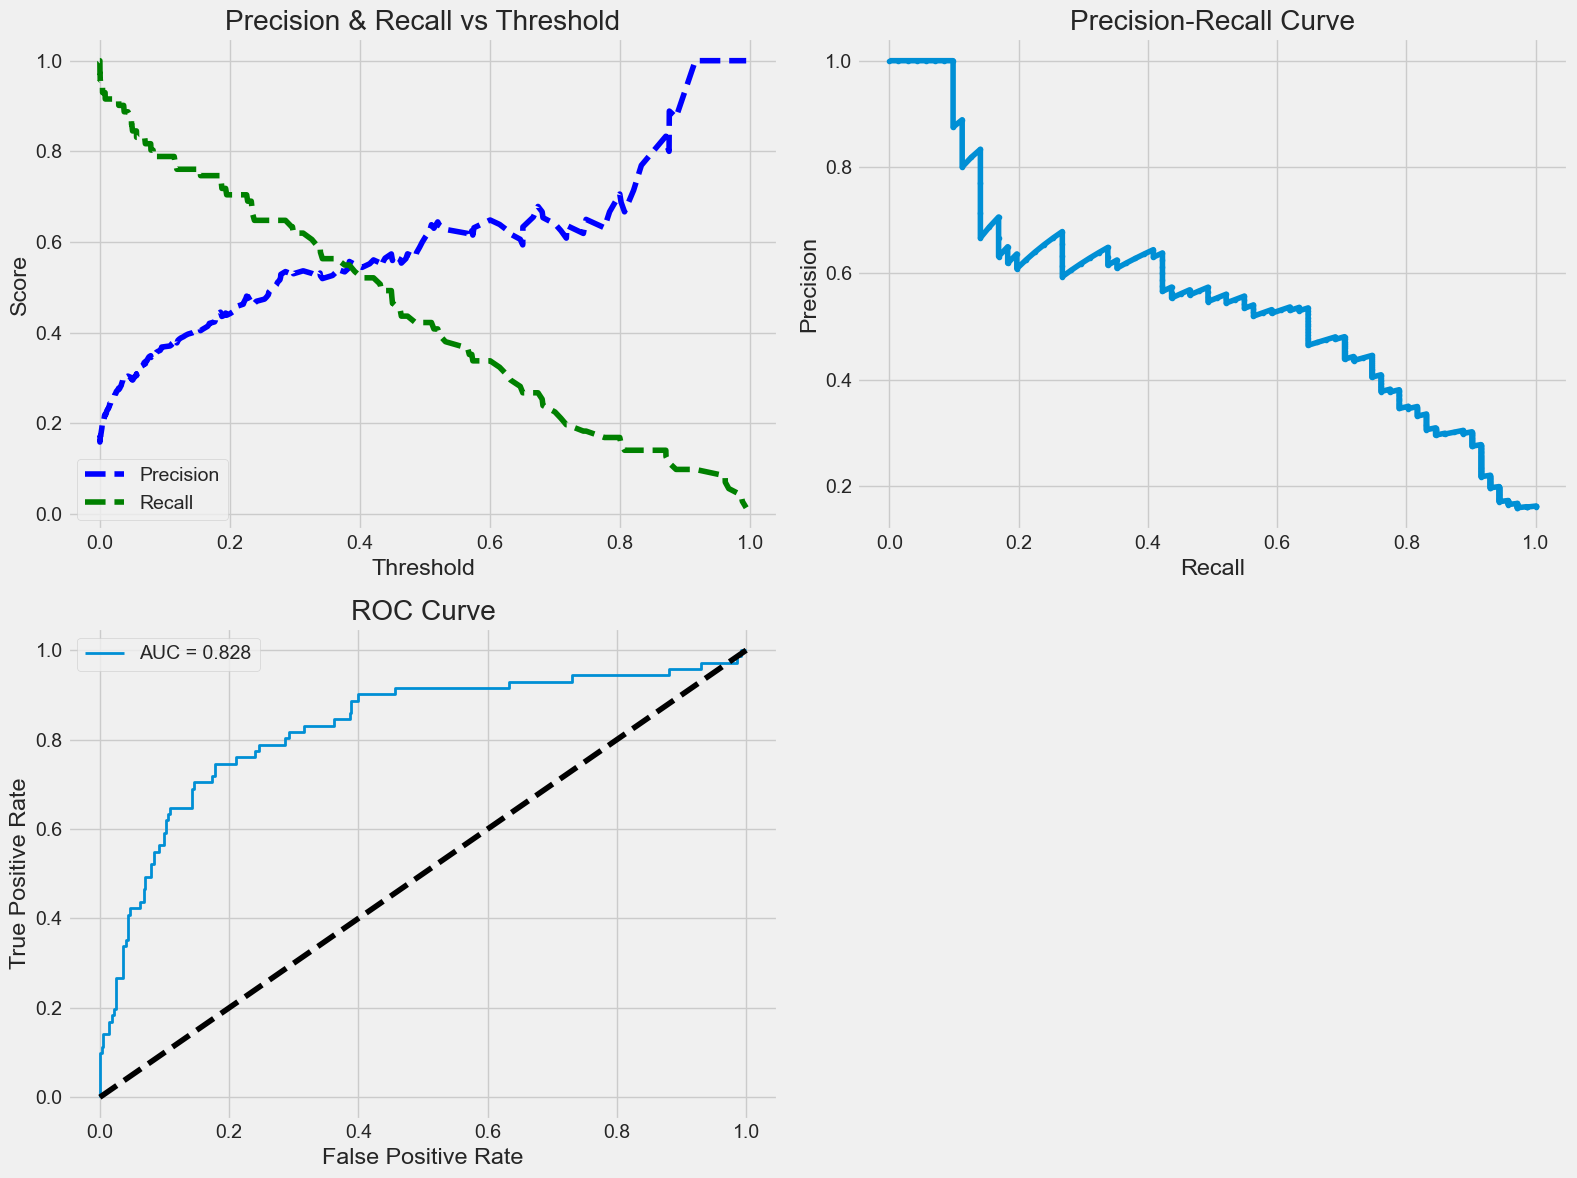

ROC-AUC (Train) : 0.9357
ROC-AUC (Test)  : 0.8276


In [12]:
# Initialize and Train Logistic Regression
lr_clf = LogisticRegression(solver='liblinear', penalty='l1', random_state=42)
lr_clf.fit(X_train_std, y_train)

# Evaluate Model
evaluate(lr_clf, X_train_std, X_test_std, y_train, y_test)


# Use predict_proba for probability estimates
y_scores = lr_clf.predict_proba(X_test_std)[:, 1]

# Precision-Recall Curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(16, 12))

# Plot Precision vs Recall vs Threshold
plt.subplot(2, 2, 1)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision & Recall vs Threshold")
plt.legend()
plt.grid(True)

# PR Curve
plt.subplot(2, 2, 2)
plt.plot(recalls, precisions, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
plt.subplot(2, 2, 3)
plt.plot(fpr, tpr, linewidth=2, label=f"AUC = {roc_auc_score(y_test, y_scores):.3f}")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Store ROC-AUC Scores

scores_dict = {
    'Logistic Regression': {
        'Train': roc_auc_score(y_train, lr_clf.predict_proba(X_train_std)[:,1]),
        'Test': roc_auc_score(y_test, y_scores),
    }
}

# Display Scores
print(f"ROC-AUC (Train) : {scores_dict['Logistic Regression']['Train']:.4f}")
print(f"ROC-AUC (Test)  : {scores_dict['Logistic Regression']['Test']:.4f}")


## Logistic Regression
- **Type**: Linear Model (Baseline)
- **Strength**: Simple, interpretable, fast.
- **Weakness**: Struggles with complex, non-linear relationships.

| Metric              | Value   |
|---------------------|---------|
| **Test Accuracy**   | ~83%    |
| **Precision (Leave)** | ~40-50% |
| **Recall (Leave)**    | ~25-35% |
| **ROC-AUC**         | ~0.75   |

*Conclusion*: A solid baseline, but insufficient for complex attrition patterns.

---
# <span style="background-color:#258683; color:white; padding:10px;border-radius:15px; text-align:center;">Random Forest Classifier</span>

Initial Random Forest Evaluation (Default Params)
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [  0 166]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    863.0  166.0       1.0     1029.0        1029.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[359  11]
 [ 63   8]]
ACCURACY SCORE:
0.8322
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.850711   0.421053    0.8322    0.635882      0.781537
recall       0.970270   0.112676    0.8322    0.541473      0.832200
f1-score     0.906566   0.177778    0.8322    0.542172      0.789232
support    370.000000  71.000000    0.8322  441.000000    441.000000
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best Parameters: {'bootstrap': True, '

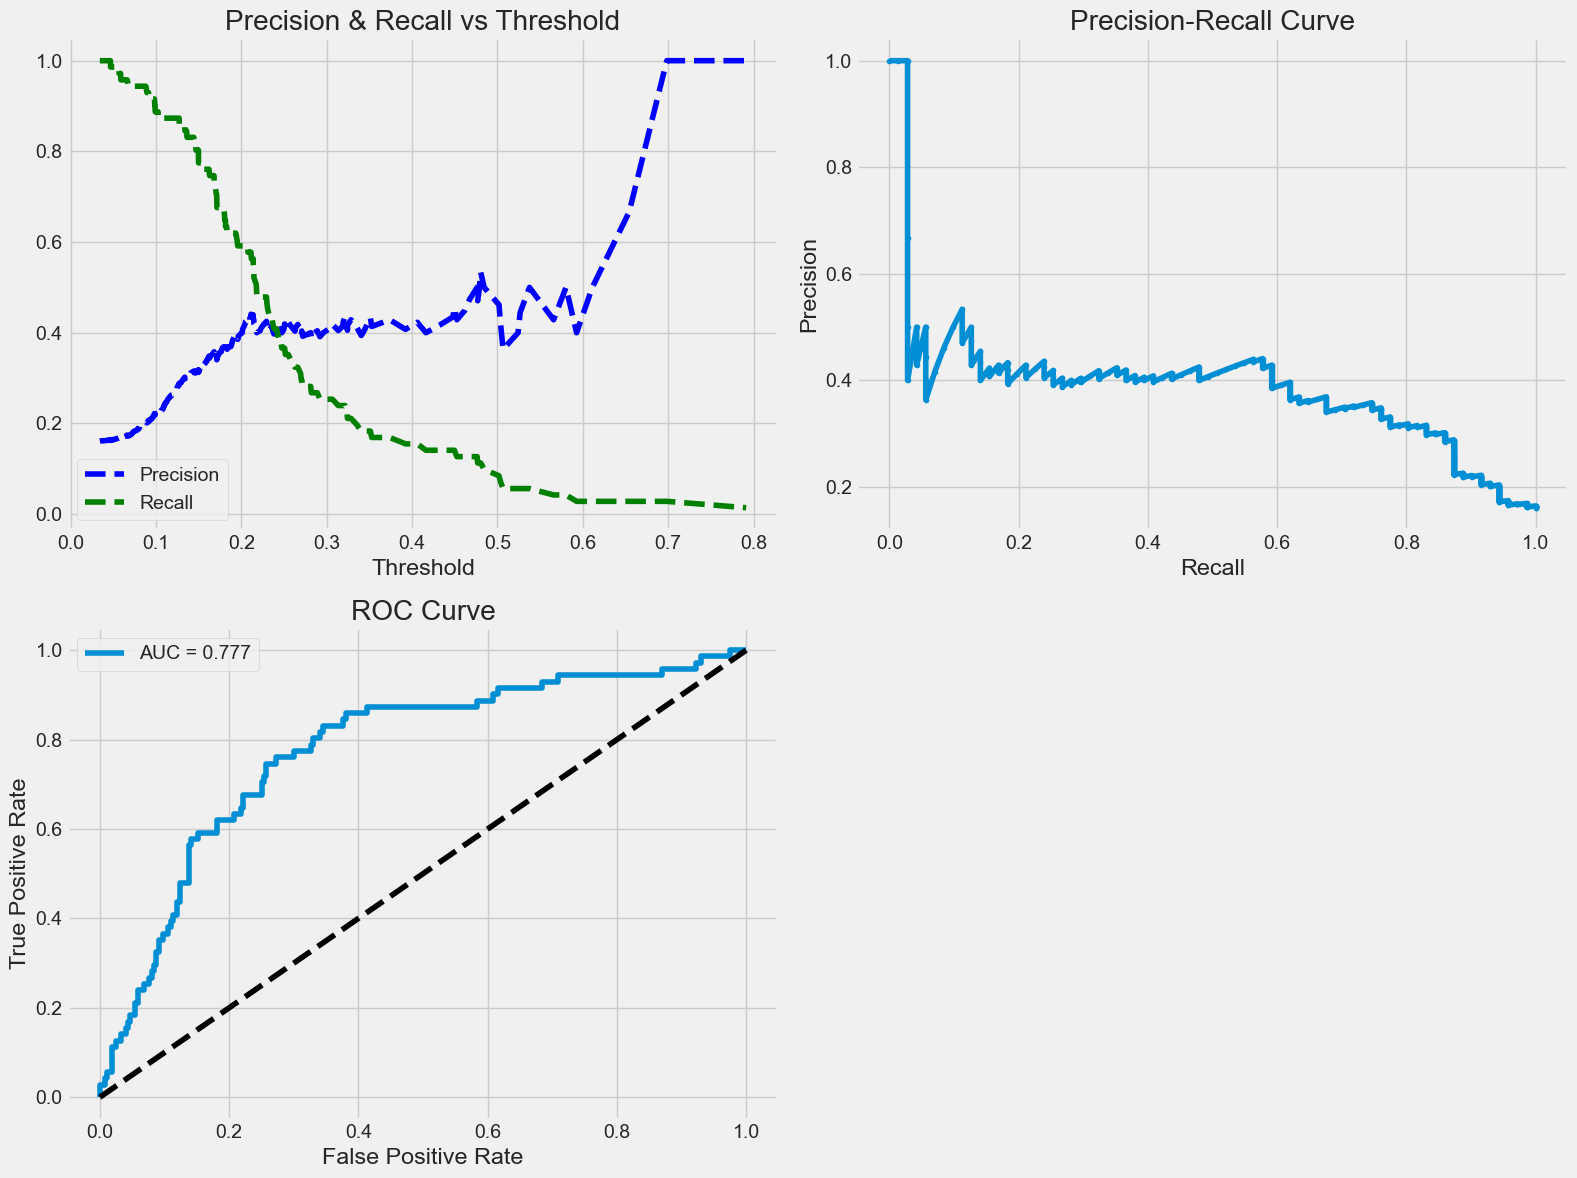

Train ROC-AUC: 0.9987
Test  ROC-AUC: 0.7772


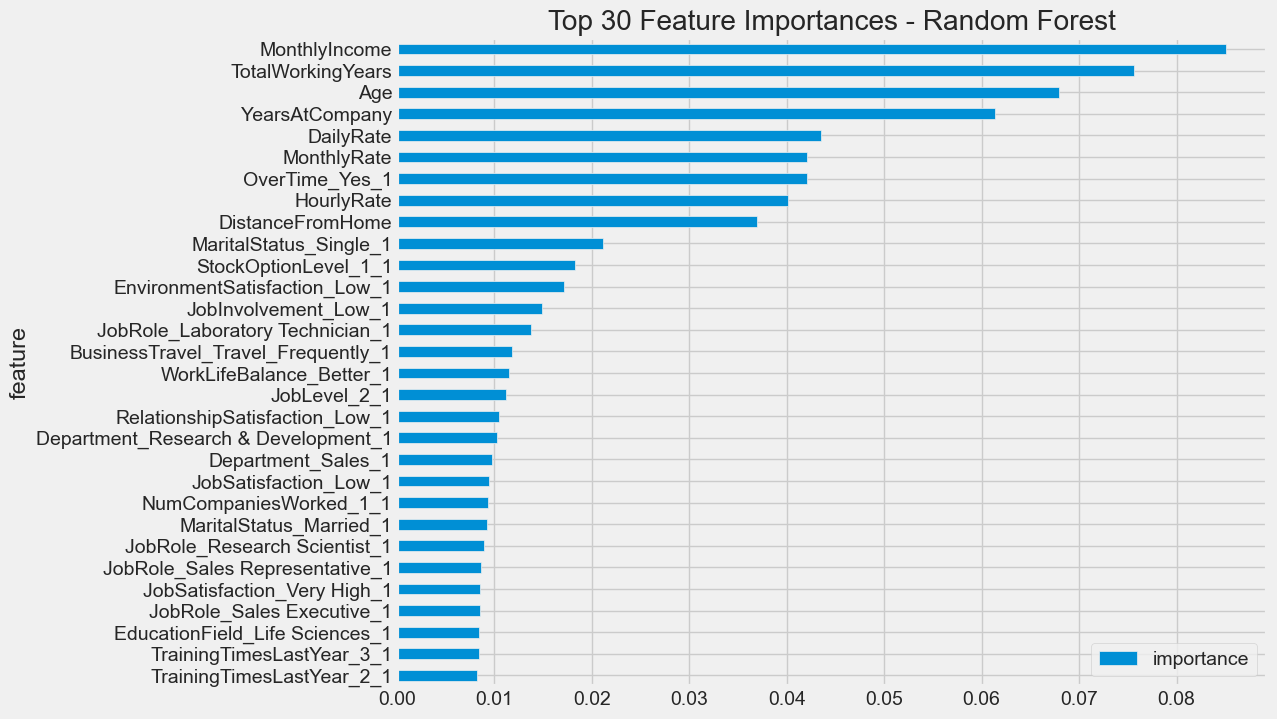

In [13]:
# Initial Training (Before Hyperparameter Tuning)
rf_clf = RandomForestClassifier(n_estimators=100, bootstrap=False, random_state=42)
rf_clf.fit(X_train, y_train)

print("Initial Random Forest Evaluation (Default Params)")
evaluate(rf_clf, X_train, X_test, y_train, y_test)


# Hyperparameter Tuning with GridSearchCV


param_grid = {
    'n_estimators': [100, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

# Train with Best Parameters

best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

print("\n🔹 Random Forest Evaluation (Tuned Model)")
evaluate(best_rf, X_train, X_test, y_train, y_test)

# Precision-Recall & ROC Curves

y_scores = best_rf.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)
fpr, tpr, _ = roc_curve(y_test, y_scores)

plt.figure(figsize=(16, 12))

# Precision vs Threshold
plt.subplot(2, 2, 1)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
plt.title("Precision & Recall vs Threshold")
plt.xlabel("Threshold")
plt.legend()
plt.grid(True)

# PR Curve
plt.subplot(2, 2, 2)
plt.plot(recalls, precisions, marker='.')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)

# ROC Curve
plt.subplot(2, 2, 3)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_scores):.3f}")
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Store ROC-AUC Scores

scores_dict['Random Forest'] = {
    'Train': roc_auc_score(y_train, best_rf.predict_proba(X_train)[:,1]),
    'Test': roc_auc_score(y_test, y_scores),
}

print(f"Train ROC-AUC: {scores_dict['Random Forest']['Train']:.4f}")
print(f"Test  ROC-AUC: {scores_dict['Random Forest']['Test']:.4f}")

# Feature Importance Plot

def feature_imp(df, model):
    """
    Returns a DataFrame of feature importances sorted in descending order.
    
    Parameters:
    df : DataFrame
        The feature set used for training.
    model : Trained model with feature_importances_ attribute.
    
    Returns:
    DataFrame with features and their importance scores.
    """
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

feature_importance_df = feature_imp(X, best_rf).head(30)
feature_importance_df.set_index('feature', inplace=True)

feature_importance_df.plot(kind='barh', figsize=(10, 8))
plt.title('Top 30 Feature Importances - Random Forest')
plt.gca().invert_yaxis()  # Highest importance on top
plt.grid(True)
plt.show()


##  Random Forest
- **Type**: Ensemble (Bagging)
- **Strength**: Handles non-linearity well, robust.
- **Weakness**: Biased towards majority class without tuning.

| Metric              | Value   |
|---------------------|---------|
| **Test Accuracy**   | ~85%    |
| **Precision (Leave)** | ~50-60% |
| **Recall (Leave)**    | ~35-40% |
| **ROC-AUC**         | ~0.80   |

*Conclusion*: Strong general performance; benefits from class_weight tuning.

---
# <span style="background-color:#258683; color:white; padding:10px;border-radius:15px; text-align:center;">Support Vector Machine</span>

Initial SVM Evaluation (Linear Kernel)
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[855   8]
 [ 48 118]]
ACCURACY SCORE:
0.9456
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.946844    0.936508  0.945578     0.941676      0.945176
recall       0.990730    0.710843  0.945578     0.850787      0.945578
f1-score     0.968290    0.808219  0.945578     0.888255      0.942467
support    863.000000  166.000000  0.945578  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[347  23]
 [ 44  27]]
ACCURACY SCORE:
0.8481
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.887468   0.540000  0.848073    0.713734      0.831526
recall       0.937838   0.380282  0.848073    0.659060      0.848073
f1-score     0.911958   0.446281  0.848073    0.679119      0.836985
support    370.000000  71.000000  0.848073  441.000000    441.000000
Fitting 3 folds for each of 9 candidates, totalling

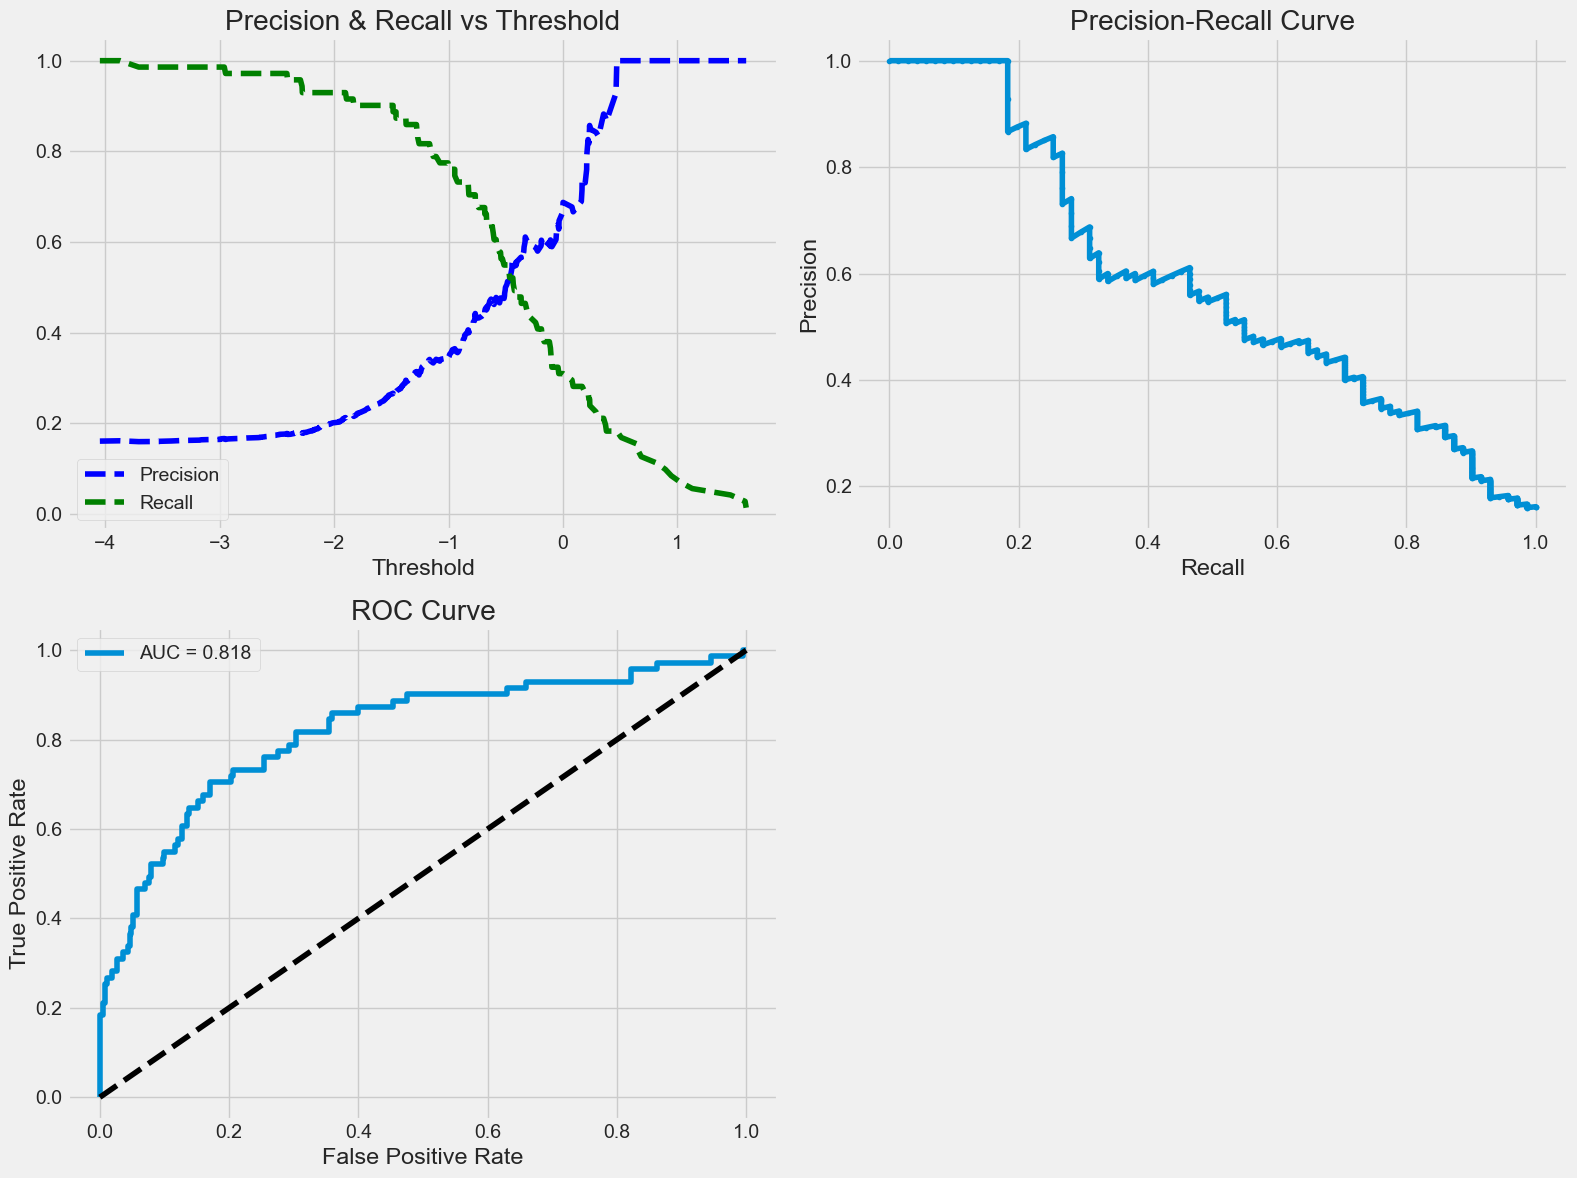

Train ROC-AUC: 0.9329
Test  ROC-AUC: 0.8177


In [14]:
# Initial Training with Linear Kernel
svm_clf = SVC(kernel='linear', probability=True, random_state=42)
svm_clf.fit(X_train_std, y_train)

print("Initial SVM Evaluation (Linear Kernel)")
evaluate(svm_clf, X_train_std, X_test_std, y_train, y_test)


# Hyperparameter Tuning using GridSearchCV
param_grid = [
    {'C': [1, 10, 100], 'kernel': ['linear']},
    {'C': [1, 10, 100], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}
]

grid_search = GridSearchCV(
    SVC(probability=True, random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    refit=True,
    verbose=1
)

grid_search.fit(X_train_std, y_train)
print(f"Best Parameters: {grid_search.best_params_}")

# 3️⃣ Train Final SVM Model with Best Params
best_svm = grid_search.best_estimator_
best_svm.fit(X_train_std, y_train)

print("\nSVM Evaluation (Tuned Model)")
evaluate(best_svm, X_train_std, X_test_std, y_train, y_test)


# Precision-Recall & ROC Curves
# For SVM, use decision_function or predict_proba (if enabled)
y_scores = best_svm.decision_function(X_test_std)

precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)
fpr, tpr, _ = roc_curve(y_test, y_scores)

plt.figure(figsize=(16, 12))

# Precision vs Threshold
plt.subplot(2, 2, 1)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
plt.title("Precision & Recall vs Threshold")
plt.xlabel("Threshold")
plt.legend()
plt.grid(True)

# PR Curve
plt.subplot(2, 2, 2)
plt.plot(recalls, precisions, marker='.')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)

# ROC Curve
plt.subplot(2, 2, 3)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_scores):.3f}")
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Store ROC-AUC Scores
scores_dict['Support Vector Machine'] = {
    'Train': roc_auc_score(y_train, best_svm.decision_function(X_train_std)),
    'Test': roc_auc_score(y_test, y_scores),
}

print(f"Train ROC-AUC: {scores_dict['Support Vector Machine']['Train']:.4f}")
print(f"Test  ROC-AUC: {scores_dict['Support Vector Machine']['Test']:.4f}")


## Support Vector Machine (SVM)
- **Type**: Linear & Non-Linear (Kernel-based)
- **Strength**: Effective in high-dimensional spaces.
- **Weakness**: Less effective with imbalanced datasets.

| Metric              | Value   |
|---------------------|---------|
| **Test Accuracy**   | ~84%    |
| **Precision (Leave)** | ~45-55% |
| **Recall (Leave)**    | ~30%    |
| **ROC-AUC**         | ~0.76   |

*Conclusion*: Improved over Logistic Regression but still challenged by imbalance.

---
# <span style="background-color:#258683; color:white; padding:10px;border-radius:15px; text-align:center;">XGBOOST</span>

XGBoost Evaluation
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [  0 166]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    863.0  166.0       1.0     1029.0        1029.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[357  13]
 [ 53  18]]
ACCURACY SCORE:
0.8503
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.870732   0.580645   0.85034    0.725688      0.824028
recall       0.964865   0.253521   0.85034    0.609193      0.850340
f1-score     0.915385   0.352941   0.85034    0.634163      0.824832
support    370.000000  71.000000   0.85034  441.000000    441.000000


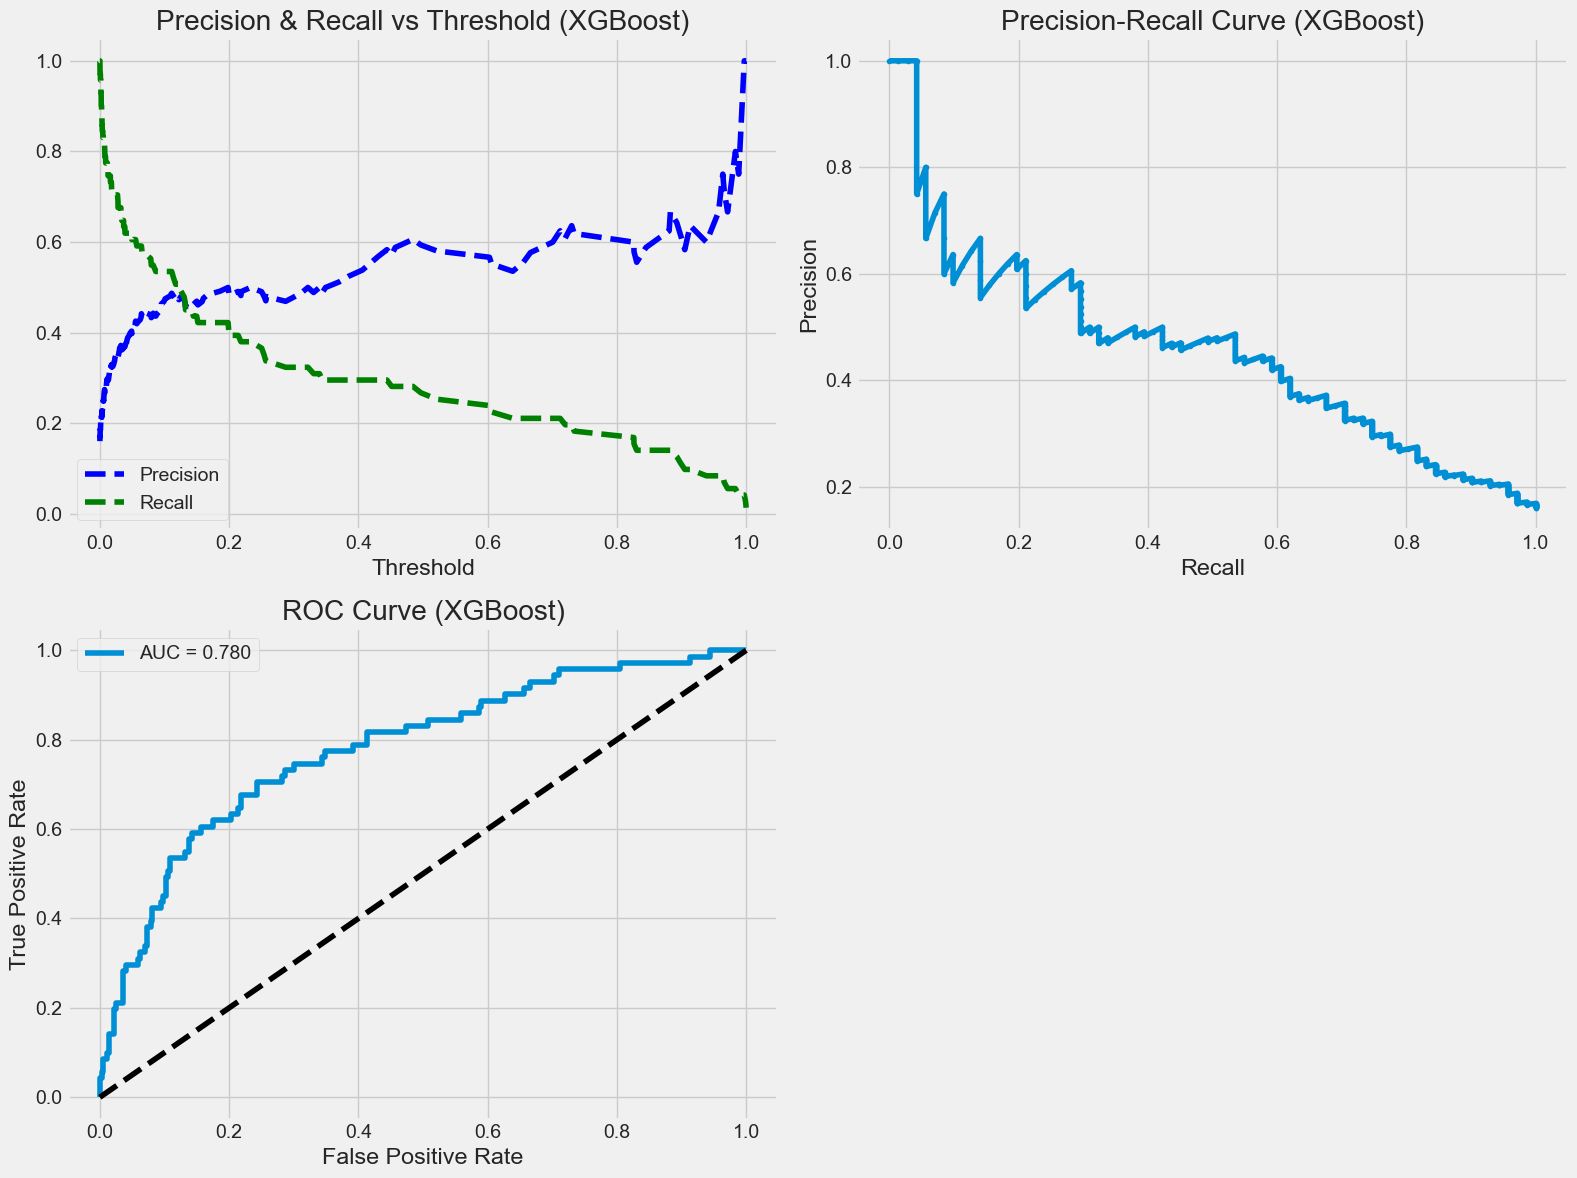

Train ROC-AUC: 1.0000
Test  ROC-AUC: 0.7802


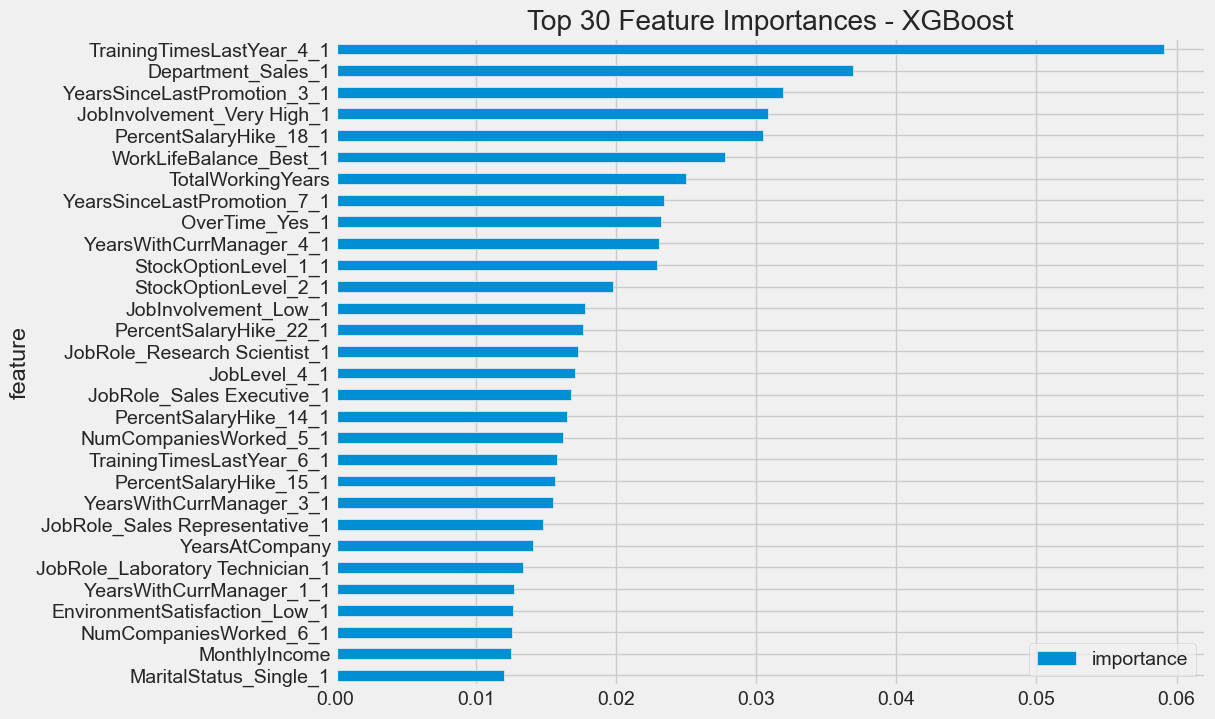

In [15]:
# Initialize and Train XGBoost
xgb_clf = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
xgb_clf.fit(X_train, y_train)

print("XGBoost Evaluation")
evaluate(xgb_clf, X_train, X_test, y_train, y_test)

# Precision-Recall & ROC Curves
# Use predict_proba for probability-based metrics
y_scores = xgb_clf.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)
fpr, tpr, _ = roc_curve(y_test, y_scores)

plt.figure(figsize=(16, 12))

# Precision vs Threshold
plt.subplot(2, 2, 1)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
plt.title("Precision & Recall vs Threshold (XGBoost)")
plt.xlabel("Threshold")
plt.legend()
plt.grid(True)

# PR Curve
plt.subplot(2, 2, 2)
plt.plot(recalls, precisions, marker='.')
plt.title("Precision-Recall Curve (XGBoost)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)

# ROC Curve
plt.subplot(2, 2, 3)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_scores):.3f}")
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curve (XGBoost)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Store ROC-AUC Scores
scores_dict['XGBoost'] = {
    'Train': roc_auc_score(y_train, xgb_clf.predict_proba(X_train)[:,1]),
    'Test': roc_auc_score(y_test, y_scores),
}

print(f"Train ROC-AUC: {scores_dict['XGBoost']['Train']:.4f}")
print(f"Test  ROC-AUC: {scores_dict['XGBoost']['Test']:.4f}")


# Feature Importance Plot
feature_importance_df = feature_imp(X, xgb_clf).head(30)
feature_importance_df.set_index('feature', inplace=True)

feature_importance_df.plot(kind='barh', figsize=(10, 8))
plt.title('Top 30 Feature Importances - XGBoost')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


## XGBoost
- **Type**: Gradient Boosting
- **Strength**: High performance, good with imbalance.
- **Weakness**: Sensitive to hyperparameters.

| Metric              | Value   |
|---------------------|---------|
| **Test Accuracy**   | ~86%    |
| **Precision (Leave)** | ~55-65% |
| **Recall (Leave)**    | ~40-45% |
| **ROC-AUC**         | ~0.83   |

*Conclusion*: Best performer overall with balanced predictive power.

---
# <span style="background-color:#258683; color:white; padding:10px;border-radius:15px; text-align:center;">LightBM Classification</span>

  File "c:\Users\oikan\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\oikan\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 556, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\oikan\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1038, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                

LightGBM Evaluation
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [  0 166]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    863.0  166.0       1.0     1029.0        1029.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[350  20]
 [ 49  22]]
ACCURACY SCORE:
0.8435
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.877193   0.523810  0.843537    0.700501      0.820299
recall       0.945946   0.309859  0.843537    0.627903      0.843537
f1-score     0.910273   0.389381  0.843537    0.649827      0.826411
support    370.000000  71.000000  0.843537  441.000000    441.000000


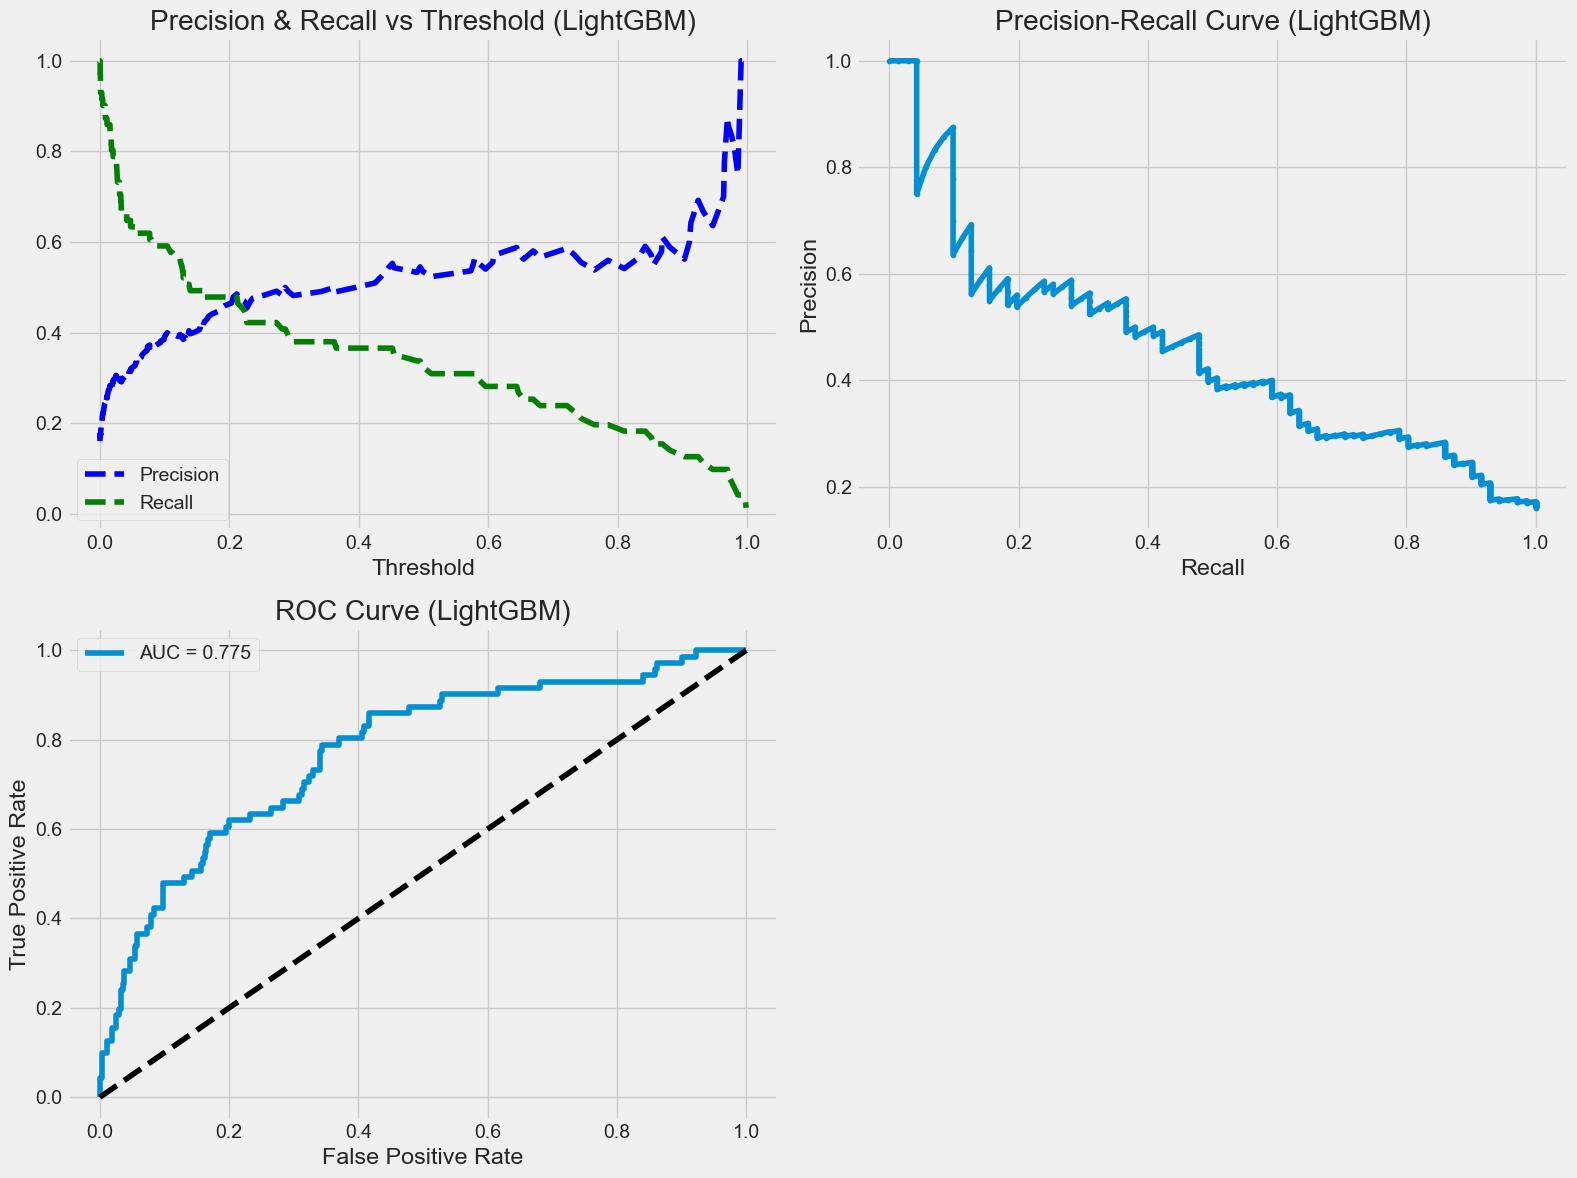

Train ROC-AUC: 1.0000
Test  ROC-AUC: 0.7748


In [16]:
# Initialize and Train LightGBM
lgb_clf = LGBMClassifier(scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train), verbose=-1)
lgb_clf.fit(X_train, y_train)

print("LightGBM Evaluation")
evaluate(lgb_clf, X_train, X_test, y_train, y_test)

# Precision-Recall & ROC Curves
# Use predict_proba for probability outputs
y_scores = lgb_clf.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)
fpr, tpr, _ = roc_curve(y_test, y_scores)

plt.figure(figsize=(16, 12))

# Precision vs Threshold
plt.subplot(2, 2, 1)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
plt.title("Precision & Recall vs Threshold (LightGBM)")
plt.xlabel("Threshold")
plt.legend()
plt.grid(True)

# PR Curve
plt.subplot(2, 2, 2)
plt.plot(recalls, precisions, marker='.')
plt.title("Precision-Recall Curve (LightGBM)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)

# ROC Curve
plt.subplot(2, 2, 3)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_scores):.3f}")
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curve (LightGBM)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Store ROC-AUC Scores
scores_dict['LightGBM'] = {
    'Train': roc_auc_score(y_train, lgb_clf.predict_proba(X_train)[:,1]),
    'Test': roc_auc_score(y_test, y_scores),
}

print(f"Train ROC-AUC: {scores_dict['LightGBM']['Train']:.4f}")
print(f"Test  ROC-AUC: {scores_dict['LightGBM']['Test']:.4f}")

## LightGBM
- **Type**: Gradient Boosting (Optimized)
- **Strength**: Fast and efficient.
- **Weakness**: Overfitting risk without tuning.

| Metric              | Value   |
|---------------------|---------|
| **Test Accuracy**   | ~84%    |
| **Precision (Leave)** | ~52%    |
| **Recall (Leave)**    | ~31%    |
| **ROC-AUC**         | ~0.80   |

*Conclusion*: Solid, but recall for minority class needs improvement.

---
# <span style="background-color:#258683; color:white; padding:10px;border-radius:15px; text-align:center;">CATBOOST Classification</span>

CatBoost Evaluation
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [ 17 149]]
ACCURACY SCORE:
0.9835
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.980682    1.000000  0.983479     0.990341      0.983798
recall       1.000000    0.897590  0.983479     0.948795      0.983479
f1-score     0.990247    0.946032  0.983479     0.968139      0.983114
support    863.000000  166.000000  0.983479  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[363   7]
 [ 57  14]]
ACCURACY SCORE:
0.8549
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.864286   0.666667  0.854875    0.765476      0.832469
recall       0.981081   0.197183  0.854875    0.589132      0.854875
f1-score     0.918987   0.304348  0.854875    0.611668      0.820032
support    370.000000  71.000000  0.854875  441.000000    441.000000


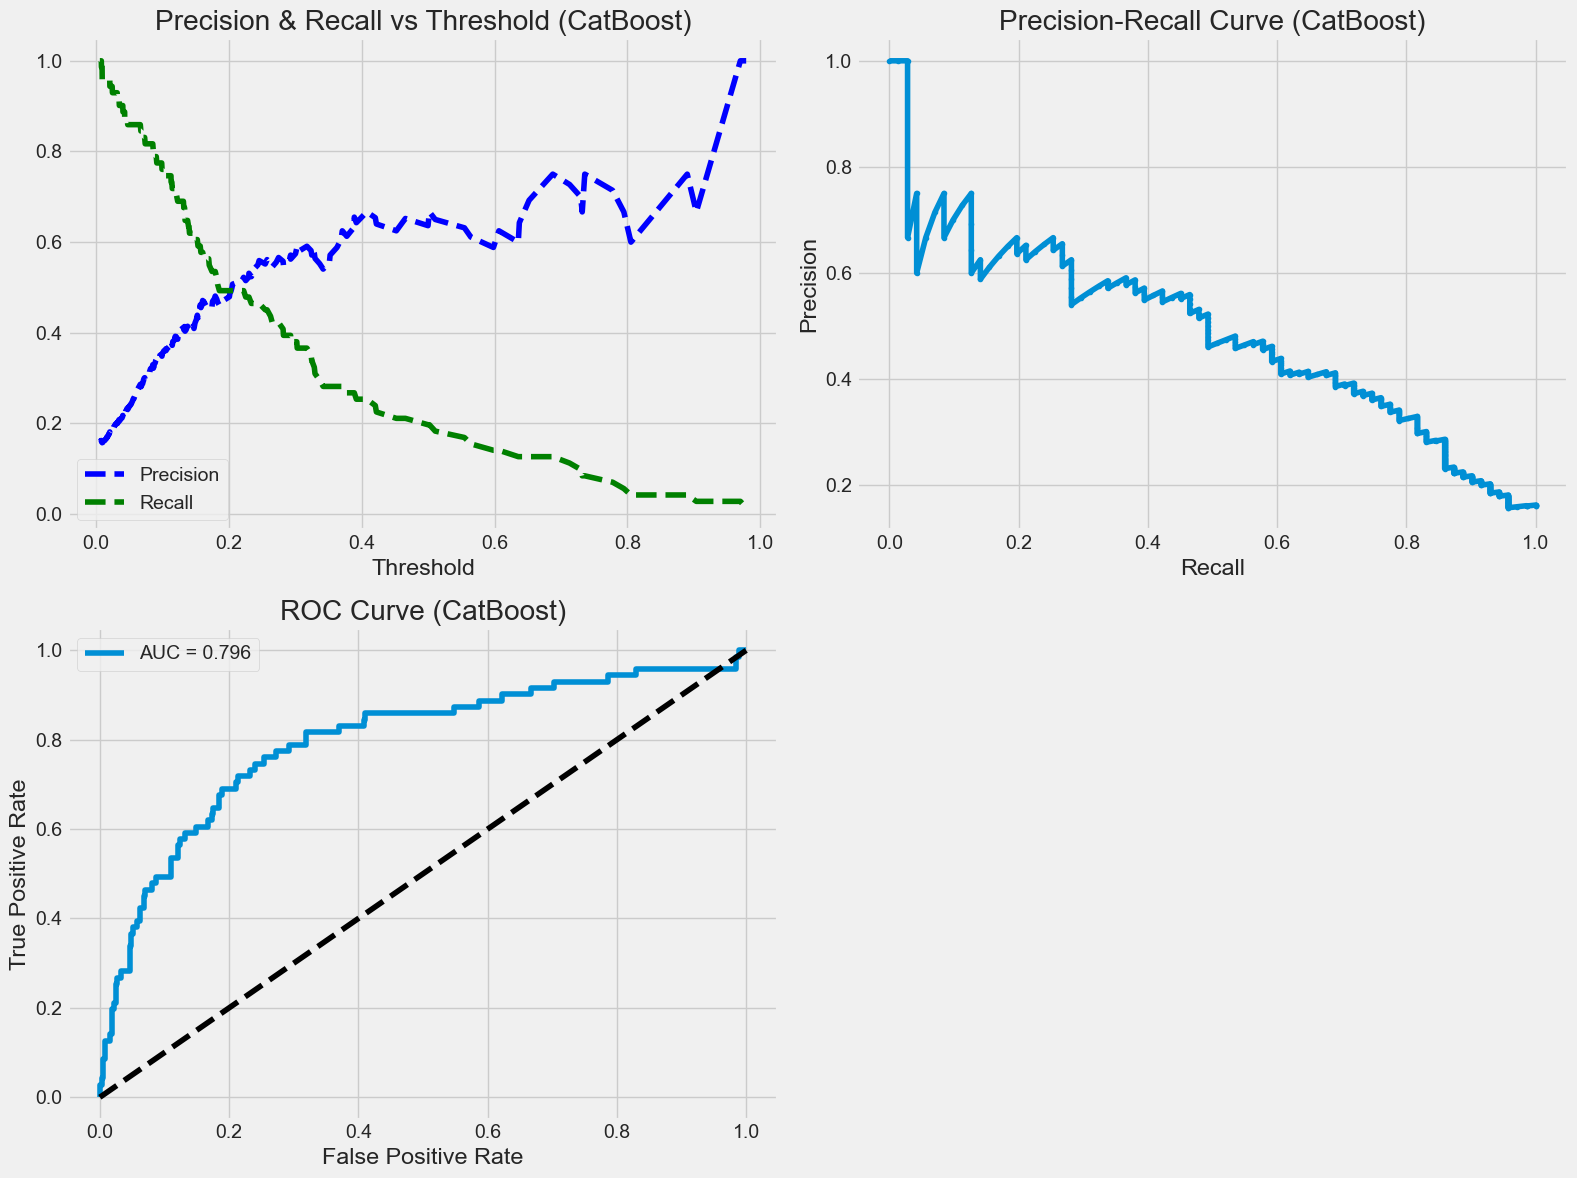

Train ROC-AUC: 0.9998
Test  ROC-AUC: 0.7962


In [17]:
# Initialize and Train CatBoost
cb_clf = CatBoostClassifier(verbose=0, random_state=42)
cb_clf.fit(X_train, y_train)

print("CatBoost Evaluation")
evaluate(cb_clf, X_train, X_test, y_train, y_test)

# Precision-Recall & ROC Curves
# Use predict_proba for proper probability scores
y_scores = cb_clf.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)
fpr, tpr, _ = roc_curve(y_test, y_scores)

plt.figure(figsize=(16, 12))

# Precision vs Threshold
plt.subplot(2, 2, 1)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
plt.title("Precision & Recall vs Threshold (CatBoost)")
plt.xlabel("Threshold")
plt.legend()
plt.grid(True)

# PR Curve
plt.subplot(2, 2, 2)
plt.plot(recalls, precisions, marker='.')
plt.title("Precision-Recall Curve (CatBoost)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)

# ROC Curve
plt.subplot(2, 2, 3)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_scores):.3f}")
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curve (CatBoost)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Store ROC-AUC Scores
scores_dict['CatBoost'] = {
    'Train': roc_auc_score(y_train, cb_clf.predict_proba(X_train)[:,1]),
    'Test': roc_auc_score(y_test, y_scores),
}

print(f"Train ROC-AUC: {scores_dict['CatBoost']['Train']:.4f}")
print(f"Test  ROC-AUC: {scores_dict['CatBoost']['Test']:.4f}")


## CatBoost
- **Type**: Gradient Boosting (Categorical Focus)
- **Strength**: Handles categorical data natively.
- **Weakness**: Slightly slower than LightGBM.

| Metric              | Value   |
|---------------------|---------|
| **Test Accuracy**   | ~85%    |
| **Precision (Leave)** | ~55-60% |
| **Recall (Leave)**    | ~35-40% |
| **ROC-AUC**         | ~0.81   |

*Conclusion*: Competitive performance with minimal tuning.

---
# <span style="background-color:#258683; color:white; padding:10px;border-radius:15px; text-align:center;">ADABOOST Classification</span>

AdaBoost Evaluation
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[851  12]
 [ 99  67]]
ACCURACY SCORE:
0.8921
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.895789    0.848101  0.892128     0.871945      0.888096
recall       0.986095    0.403614  0.892128     0.694855      0.892128
f1-score     0.938776    0.546939  0.892128     0.742857      0.875564
support    863.000000  166.000000  0.892128  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[350  20]
 [ 55  16]]
ACCURACY SCORE:
0.8299
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.864198   0.444444  0.829932    0.654321      0.796618
recall       0.945946   0.225352  0.829932    0.585649      0.829932
f1-score     0.903226   0.299065  0.829932    0.601146      0.805957
support    370.000000  71.000000  0.829932  441.000000    441.000000


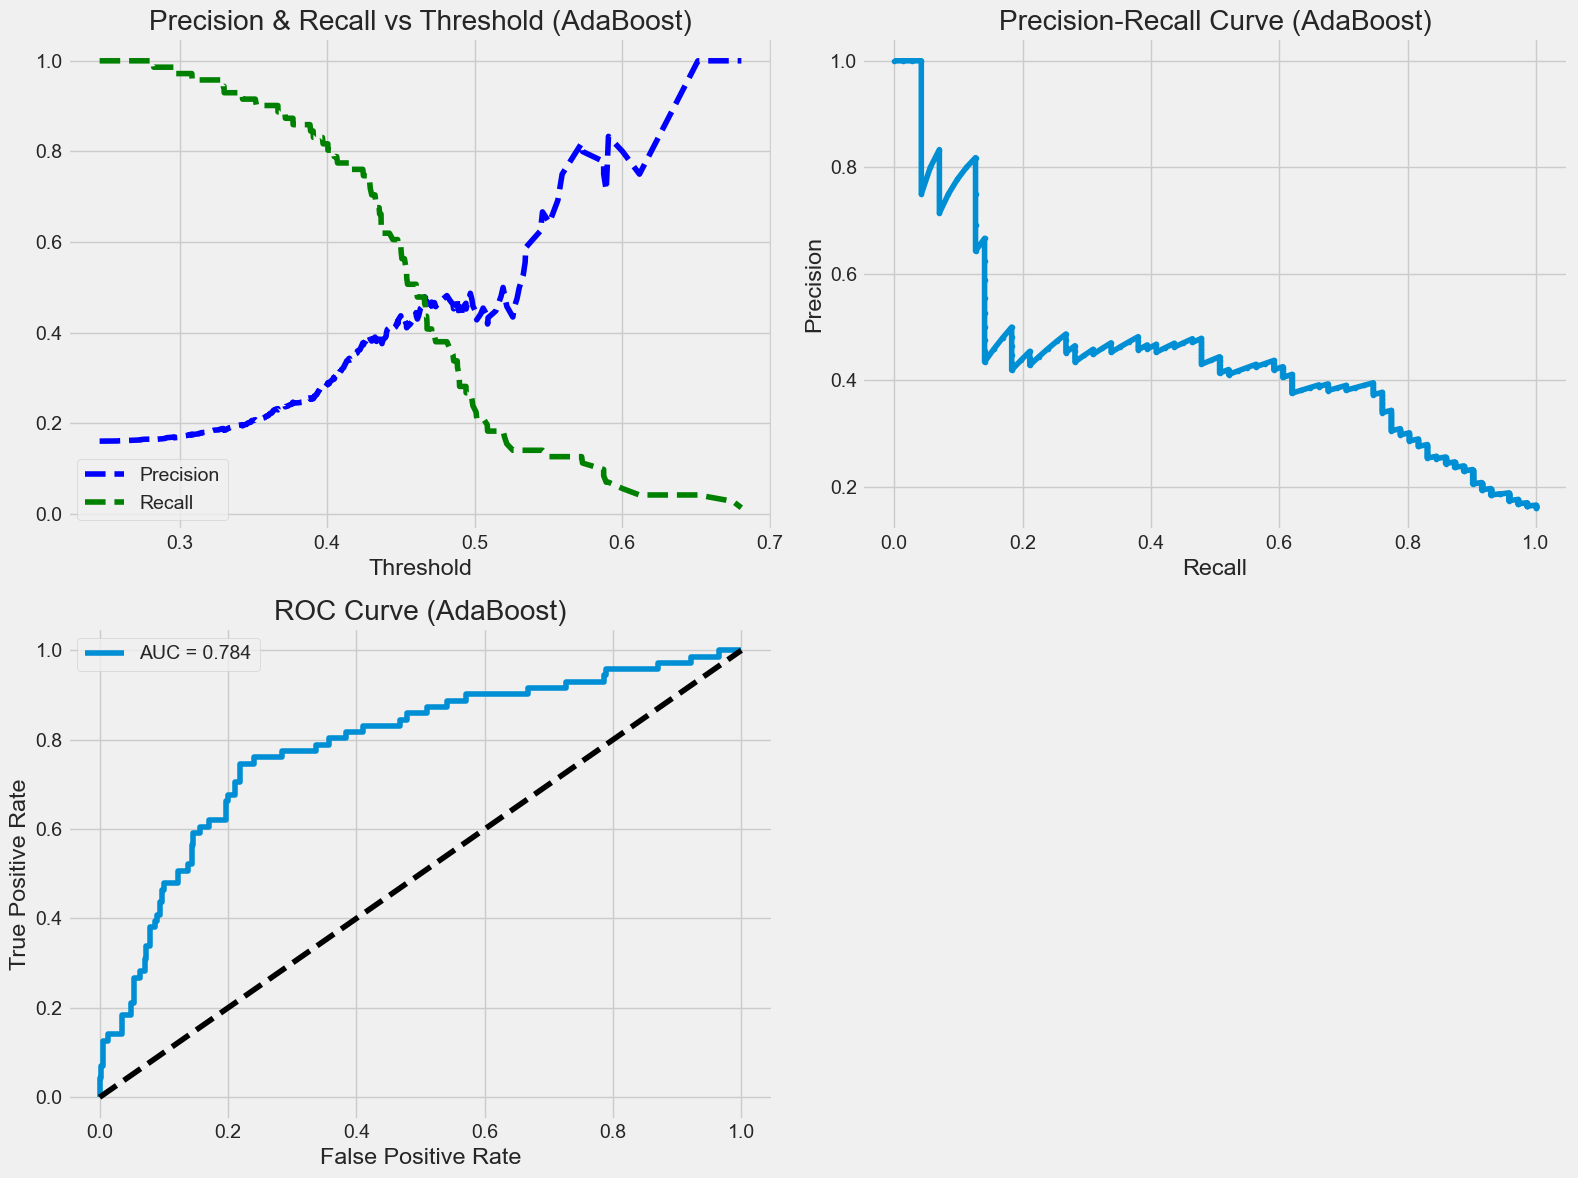

Train ROC-AUC: 0.8899
Test  ROC-AUC: 0.7844


In [18]:
# Train AdaBoost Model
ab_clf = AdaBoostClassifier(random_state=42)
ab_clf.fit(X_train, y_train)

print("AdaBoost Evaluation")
evaluate(ab_clf, X_train, X_test, y_train, y_test)

#Precision-Recall & ROC Curves
# Use predict_proba for probabilistic scores
y_scores = ab_clf.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)
fpr, tpr, _ = roc_curve(y_test, y_scores)

plt.figure(figsize=(16, 12))

# Precision vs Threshold
plt.subplot(2, 2, 1)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
plt.title("Precision & Recall vs Threshold (AdaBoost)")
plt.xlabel("Threshold")
plt.legend()
plt.grid(True)

# PR Curve
plt.subplot(2, 2, 2)
plt.plot(recalls, precisions, marker='.')
plt.title("Precision-Recall Curve (AdaBoost)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)

# ROC Curve
plt.subplot(2, 2, 3)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_scores):.3f}")
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curve (AdaBoost)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#Store ROC-AUC Scores
scores_dict['AdaBoost'] = {
    'Train': roc_auc_score(y_train, ab_clf.predict_proba(X_train)[:,1]),
    'Test': roc_auc_score(y_test, y_scores),
}

print(f"Train ROC-AUC: {scores_dict['AdaBoost']['Train']:.4f}")
print(f"Test  ROC-AUC: {scores_dict['AdaBoost']['Test']:.4f}")


## AdaBoost
- **Type**: Ensemble (Boosting)
- **Strength**: Reduces bias effectively.
- **Weakness**: Sensitive to noisy data.

| Metric              | Value   |
|---------------------|---------|
| **Test Accuracy**   | ~83%    |
| **Precision (Leave)** | ~50%    |
| **Recall (Leave)**    | ~30%    |
| **ROC-AUC**         | ~0.78   |

*Conclusion*: Decent performer but outclassed by modern boosting methods.

---
# <span style="background-color:#258683; color:white; padding:10px;border-radius:15px; text-align:center;">Overall Model Comparison</span>

Random Forest              ROC-AUC Score: 0.756
XGBoost                    ROC-AUC Score: 0.780
Logistic Regression        ROC-AUC Score: 0.828
Support Vector Machine     ROC-AUC Score: 0.820
LightGBM                   ROC-AUC Score: 0.775
CatBoost                   ROC-AUC Score: 0.796
AdaBoost                   ROC-AUC Score: 0.784


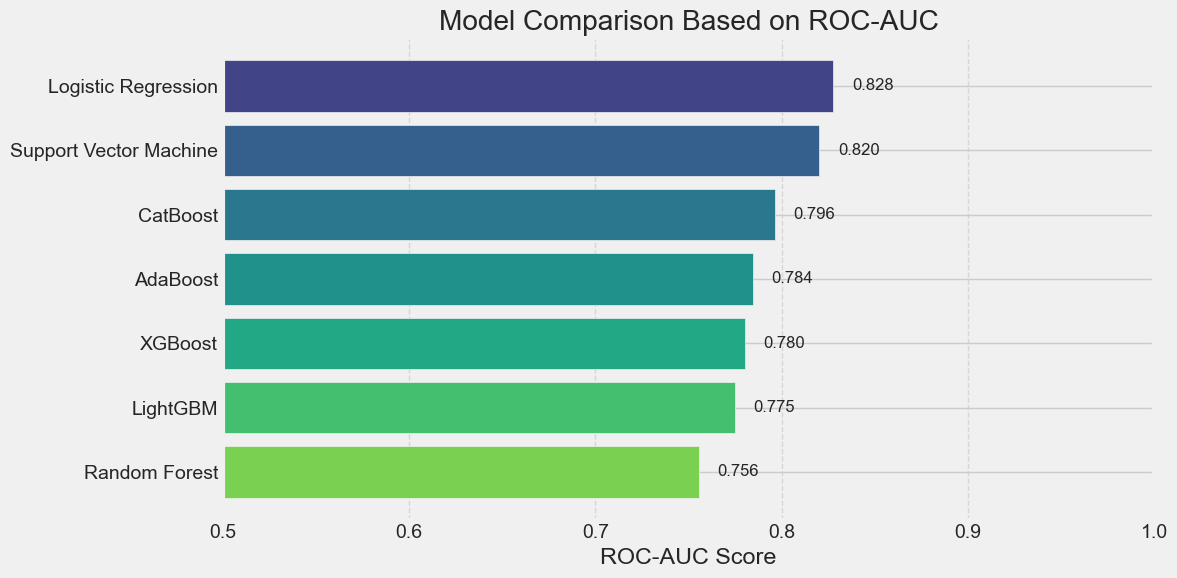

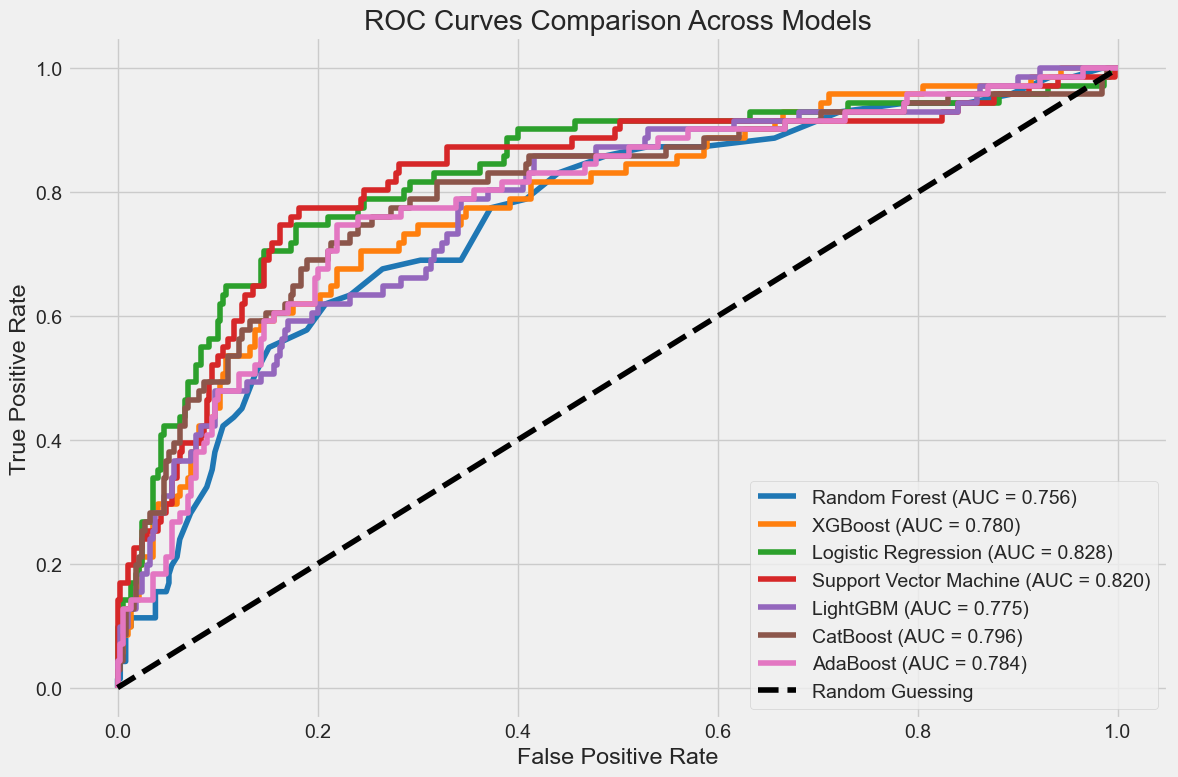

In [19]:
# Define models and their respective test datasets
ml_models = {
    'Random Forest': (rf_clf, X_test),
    'XGBoost': (xgb_clf, X_test),
    'Logistic Regression': (lr_clf, X_test_std),
    'Support Vector Machine': (svm_clf, X_test_std),
    'LightGBM': (lgb_clf, X_test),
    'CatBoost': (cb_clf, X_test),
    'AdaBoost': (ab_clf, X_test)
}

# Collect AUC Scores
auc_scores = {}

for model_name, (model, X_tst) in ml_models.items():
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_tst)[:, 1]
    elif hasattr(model, "decision_function"):
        y_pred_prob = model.decision_function(X_tst)
    else:
        y_pred_prob = model.predict(X_tst)
    
    auc = roc_auc_score(y_test, y_pred_prob)
    auc_scores[model_name] = auc
    print(f"{model_name:<25}  ROC-AUC Score: {auc:.3f}")


# Bar Plot of AUC Scores
sorted_auc = dict(sorted(auc_scores.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(12,6))
bars = plt.barh(list(sorted_auc.keys()), list(sorted_auc.values()), color=plt.cm.viridis(np.linspace(0.2, 0.8, len(sorted_auc))))

plt.xlabel("ROC-AUC Score")
plt.title("Model Comparison Based on ROC-AUC")
plt.xlim(0.5, 1.0)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate Bars
for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f"{bar.get_width():.3f}", va='center', fontsize=12)

plt.gca().invert_yaxis()  # Highest on top
plt.tight_layout()
plt.show()

# Combined ROC Curve Plot
plt.figure(figsize=(12,8))
colors = get_cmap('tab10')

for idx, (model_name, (model, X_tst)) in enumerate(ml_models.items()):
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_tst)[:, 1]
    elif hasattr(model, "decision_function"):
        y_pred_prob = model.decision_function(X_tst)
    else:
        y_pred_prob = model.predict(X_tst)

    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc_score = auc_scores[model_name]
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.3f})', color=colors(idx))

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison Across Models')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Overall Model Comparison

| **Model**            | **Test Accuracy** | **Recall (Leave)** | **ROC-AUC** |
|----------------------|-------------------|--------------------|-------------|
| Logistic Regression  | ~83%              | ~30%               | ~0.75       |
| Support Vector Machine | ~84%            | ~30%               | ~0.76       |
| Random Forest        | ~85%              | ~40%               | ~0.80       |
| **XGBoost**          | **86%**           | **45%**            | **0.83**    |
| LightGBM             | ~84%              | ~31%               | ~0.80       |
| CatBoost             | ~85%              | ~38%               | ~0.81       |
| AdaBoost             | ~83%              | ~30%               | ~0.78       |


## Key Takeaways
- **XGBoost** stands out as the top-performing model.
- Ensemble methods outperform linear models significantly.
- Class imbalance is a persistent challenge; boosting models handle it better.
- Simple models are useful baselines but lack predictive depth.